## Capstone Project :- Stock Analysis and Portfolio Management


### 1. Data Preprocessing

In [1]:
## Importing all necessary libraries
import os
from datetime import datetime
import datetime
datetime.datetime.strptime
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.dates as mdates
import glob
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Changing the working directory
os.chdir(r'C:\Users\91901\OneDrive\Desktop\Finance & Risk Capstone')

In [3]:
## Merging multiple csv file into one single spreadsheet
path = './'
all_files = glob.glob(os.path.join(path, "*.csv"))

writer = pd.ExcelWriter('Merged_Data.xlsx', engine='xlsxwriter')

for f in all_files:
    df = pd.read_csv(f)
    df.to_excel(writer, sheet_name=os.path.splitext(os.path.basename(f))[0], index=False)

writer.save()

#### All 25 csv's will be merged into single spreadsheet as a data compilation process & thus, will be used to read the data from single spreadsheet which is part of data automation.

In [4]:
## read all tab together from single spreadsheet
all_sheet_df = pd.read_excel('Merged_Data.xlsx', na_values = "Missing", sheet_name= None)
print(all_sheet_df)

{'AAL':             Date   Open   High    Low  Close  Adj Close    Volume
0     01-10-2010   9.29   9.39   9.21   9.29   8.758067   3603800
1     04-10-2010   9.24   9.48   9.05   9.12   8.597802   3856800
2     05-10-2010   9.27   9.35   9.15   9.23   8.701504   3896600
3     06-10-2010   9.27   9.40   9.15   9.23   8.701504   3230200
4     07-10-2010   9.30   9.31   9.07   9.24   8.710930   3877700
...          ...    ...    ...    ...    ...        ...       ...
2512  24-09-2020  11.74  12.00  11.22  11.77  11.770000  49163200
2513  25-09-2020  11.76  12.31  11.71  12.29  12.290000  43764000
2514  28-09-2020  12.74  13.15  12.49  12.76  12.760000  63558200
2515  29-09-2020  12.59  12.66  12.11  12.25  12.250000  46994300
2516  30-09-2020  12.32  12.92  12.22  12.29  12.290000  65055100

[2517 rows x 7 columns], 'AAPL':             Date        Open        High         Low       Close   Adj Close  \
0     01-10-2010   10.219643   10.235000   10.048214   10.090000    8.719163   
1     

In [5]:
#Reading & Creating the INDIVIDUAL stocks dataframe from sheetname 'Merged_Data.xlsx' as preliminary step
#for data preprocessing

xlsx = pd.ExcelFile(r'C:\Users\91901\OneDrive\Desktop\Finance & Risk Capstone\Merged_Data.xlsx')
df_AAL = pd.read_excel(xlsx,'AAL',parse_dates=["Date"])
df_AAPL = pd.read_excel(xlsx, 'AAPL',parse_dates=["Date"])
df_ALGT = pd.read_excel(xlsx, 'ALGT',parse_dates=["Date"])
df_ALK = pd.read_excel(xlsx, 'ALK',parse_dates=["Date"]) 
df_AMZN = pd.read_excel(xlsx, 'AMZN',parse_dates=["Date"])
df_BCS = pd.read_excel(xlsx, 'BCS',parse_dates=["Date"])
df_BHC = pd.read_excel(xlsx, 'BHC',parse_dates=["Date"])
df_CS = pd.read_excel(xlsx, 'CS',parse_dates=["Date"])
df_DAL = pd.read_excel(xlsx, 'DAL',parse_dates=["Date"])
df_DB = pd.read_excel(xlsx, 'DB',parse_dates=["Date"])
df_FB = pd.read_excel(xlsx, 'FB',parse_dates=["Date"])
df_GOOG = pd.read_excel(xlsx, 'GOOG',parse_dates=["Date"])
df_GS = pd.read_excel(xlsx, 'GS',parse_dates=["Date"])
df_HA = pd.read_excel(xlsx, 'HA',parse_dates=["Date"])
df_IBM = pd.read_excel(xlsx, 'IBM',parse_dates=["Date"])
df_JNJ = pd.read_excel(xlsx, 'JNJ',parse_dates=["Date"])
df_LUV = pd.read_excel(xlsx, 'LUV',parse_dates=["Date"])
df_MRK = pd.read_excel(xlsx, 'MRK',parse_dates=["Date"])
df_MS = pd.read_excel(xlsx, 'MS',parse_dates=["Date"])
df_MSFT = pd.read_excel(xlsx, 'MSFT',parse_dates=["Date"])
df_PFE = pd.read_excel(xlsx, 'PFE',parse_dates=["Date"])
df_RHHBY = pd.read_excel(xlsx, 'RHHBY',parse_dates=["Date"])
df_SP500 = pd.read_excel(xlsx, 'S&P500',parse_dates=["Date"])
df_UNH = pd.read_excel(xlsx, 'UNH',parse_dates=["Date"])
df_WFC = pd.read_excel(xlsx, 'WFC',parse_dates=["Date"])

In [6]:
#Changing the format of "date" column in all dataframes

df_AAL['Date']=pd.to_datetime(df_AAL['Date'],format = "%d/%m/%Y")
df_AAPL['Date']=pd.to_datetime(df_AAPL['Date'],format = "%d/%m/%Y")
df_ALGT['Date']=pd.to_datetime(df_ALGT['Date'],format="%d/%m/%Y")
df_ALK['Date']=pd.to_datetime(df_ALK['Date'],format="%d/%m/%Y")
df_AMZN['Date']=pd.to_datetime(df_AMZN['Date'],format="%d/%m/%Y")
df_BCS['Date']=pd.to_datetime(df_BCS['Date'],format="%d/%m/%Y")
df_BHC['Date']=pd.to_datetime(df_BHC['Date'],format="%d/%m/%Y")
df_CS['Date']=pd.to_datetime(df_CS['Date'],format="%d/%m/%Y")
df_DAL['Date']=pd.to_datetime(df_DAL['Date'],format="%d/%m/%Y")
df_DB['Date']=pd.to_datetime(df_DB['Date'],format="%d/%m/%Y")
df_FB['Date']=pd.to_datetime(df_FB['Date'],format="%d/%m/%Y")
df_GOOG['Date']=pd.to_datetime(df_GOOG['Date'],format="%d/%m/%Y")
df_GS['Date']=pd.to_datetime(df_GS['Date'],format="%d/%m/%Y")
df_HA['Date']=pd.to_datetime(df_HA['Date'],format="%d/%m/%Y")
df_IBM['Date']=pd.to_datetime(df_IBM['Date'],format="%d/%m/%Y")
df_JNJ['Date']=pd.to_datetime(df_JNJ['Date'],format="%d/%m/%Y")
df_LUV['Date']=pd.to_datetime(df_LUV['Date'],format="%d/%m/%Y")
df_MRK['Date']=pd.to_datetime(df_MRK['Date'],format="%d/%m/%Y")
df_MS['Date']=pd.to_datetime(df_MS['Date'],format="%d/%m/%Y")
df_MSFT['Date']=pd.to_datetime(df_MSFT['Date'],format="%d/%m/%Y")
df_PFE['Date']=pd.to_datetime(df_PFE['Date'],format="%d/%m/%Y")
df_RHHBY['Date']=pd.to_datetime(df_RHHBY['Date'],format="%d/%m/%Y")
df_SP500['Date']=pd.to_datetime(df_SP500['Date'],format="%d/%m/%Y")
df_UNH['Date']=pd.to_datetime(df_UNH['Date'],format="%d/%m/%Y")
df_WFC['Date']=pd.to_datetime(df_WFC['Date'],format="%d/%m/%Y")

In [7]:
## Checking Null values in all dataframes

df_list = [df_AAL, df_AAPL, df_ALGT,df_ALK,df_AMZN,df_BCS,df_BHC,df_CS,df_DAL,df_DB,df_FB,df_GOOG,df_GS,df_HA,
          df_IBM,df_JNJ,df_LUV,df_MRK,df_MS,df_MSFT,df_PFE,df_RHHBY,df_SP500,df_UNH,df_WFC]

df_list_names = ["df_AAL", "df_AAPL", "df_ALGT","df_ALK","df_AMZN","df_BCS","df_BHC","df_CS","df_DAL","df_DB","df_FB","df_GOOG",
                 "df_GS","df_HA","df_IBM","df_JNJ","df_LUV","df_MRK","df_MS","df_MSFT","df_PFE","df_RHHBY","df_SP500","df_UNH","df_WFC"]

for i, n in zip(df_list, df_list_names):
    null_status = i.isnull().values.any()
    if null_status:
        print(n + " has null values")
    else:
        print(n + " doesn't have null values")

df_AAL doesn't have null values
df_AAPL doesn't have null values
df_ALGT doesn't have null values
df_ALK doesn't have null values
df_AMZN doesn't have null values
df_BCS doesn't have null values
df_BHC doesn't have null values
df_CS doesn't have null values
df_DAL doesn't have null values
df_DB doesn't have null values
df_FB doesn't have null values
df_GOOG doesn't have null values
df_GS doesn't have null values
df_HA doesn't have null values
df_IBM doesn't have null values
df_JNJ doesn't have null values
df_LUV doesn't have null values
df_MRK doesn't have null values
df_MS doesn't have null values
df_MSFT doesn't have null values
df_PFE doesn't have null values
df_RHHBY doesn't have null values
df_SP500 doesn't have null values
df_UNH doesn't have null values
df_WFC doesn't have null values


#### On checking above multiple dataframe on null values parameters, It is safe to say & confirm that above dataframes doesn't have any Null values present in them. Hence, it doesn't require any null value treatment. 

In [8]:
## Checking the datatypes of random dataframe-1
df_ALK.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
## Checking the datatypes of random dataframe-2
df_MSFT.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Based on above validation on random dataframe to check accuracy of data types, it confirms that all given variable is assigned to appropriate datatypes and thus, we can embark on journey of further analysis 

#### Storting the dataframe by variable 'Date'

In [10]:
## Sorting the values by date
df_AAL =df_AAL.sort_values(by=['Date'])
df_AAPL =df_AAPL.sort_values(by=['Date'])
df_ALGT =df_ALGT.sort_values(by=['Date'])
df_ALK =df_ALK.sort_values(by=['Date'])
df_AMZN =df_AMZN.sort_values(by=['Date'])
df_BCS =df_BCS.sort_values(by=['Date'])
df_BHC =df_BHC.sort_values(by=['Date'])
df_CS =df_CS.sort_values(by=['Date'])
df_DAL =df_DAL.sort_values(by=['Date'])
df_DB =df_DB.sort_values(by=['Date'])
df_FB =df_FB.sort_values(by=['Date'])
df_GOOG =df_GOOG.sort_values(by=['Date'])
df_GS =df_GS.sort_values(by=['Date'])
df_HA =df_HA.sort_values(by=['Date'])
df_IBM =df_IBM.sort_values(by=['Date'])
df_JNJ =df_JNJ.sort_values(by=['Date'])
df_LUV =df_LUV.sort_values(by=['Date'])
df_MRK =df_MRK.sort_values(by=['Date'])
df_MS =df_MS.sort_values(by=['Date'])
df_MSFT =df_MSFT.sort_values(by=['Date'])
df_PFE =df_PFE.sort_values(by=['Date'])
df_RHHBY =df_RHHBY.sort_values(by=['Date'])
df_SP500 =df_SP500.sort_values(by=['Date'])
df_UNH =df_UNH.sort_values(by=['Date'])
df_WFC =df_WFC.sort_values(by=['Date'])

### Date Filter

In [11]:
## Applying filter in date columns in all dataframe

df_AAL = df_AAL[(df_AAL["Date"] >= '2015-10-01') & (df_AAL["Date"] <= '2020-09-30')]
df_AAPL = df_AAPL[(df_AAPL["Date"] >= '2015-10-01') & (df_AAPL["Date"] <= '2020-09-30')]
df_ALGT = df_ALGT[(df_ALGT["Date"] >= '2015-10-01') & (df_ALGT["Date"] <= '2020-09-30')]
df_ALK = df_ALK[(df_ALK["Date"] >= '2015-10-01') & (df_ALK["Date"] <= '2020-09-30')]
df_AMZN = df_AMZN[(df_AMZN["Date"] >= '2015-10-01') & (df_AMZN["Date"] <= '2020-09-30')]
df_BCS = df_BCS[(df_BCS["Date"] >= '2015-10-01') & (df_BCS["Date"] <= '2020-09-30')]
df_BHC = df_BHC[(df_BHC["Date"] >= '2015-10-01') & (df_BHC["Date"] <= '2020-09-30')]
df_CS = df_CS[(df_CS["Date"] >= '2015-10-01') & (df_CS["Date"] <= '2020-09-30')]
df_DAL = df_DAL[(df_DAL["Date"] >= '2015-10-01') & (df_DAL["Date"] <= '2020-09-30')]
df_DB = df_DB[(df_DB["Date"] >= '2015-10-01') & (df_DB["Date"] <= '2020-09-30')]
df_FB = df_FB[(df_FB["Date"] >= '2015-10-01') & (df_FB["Date"] <= '2020-09-30')]
df_GOOG = df_GOOG[(df_GOOG["Date"] >= '2015-10-01') & (df_GOOG["Date"] <= '2020-09-30')]
df_GS = df_GS[(df_GS["Date"] >= '2015-10-01') & (df_GS["Date"] <= '2020-09-30')]
df_HA = df_HA[(df_HA["Date"] >= '2015-10-01') & (df_HA["Date"] <= '2020-09-30')]
df_IBM = df_IBM[(df_IBM["Date"] >= '2015-10-01') & (df_IBM["Date"] <= '2020-09-30')]
df_JNJ = df_JNJ[(df_JNJ["Date"] >= '2015-10-01') & (df_JNJ["Date"] <= '2020-09-30')]
df_LUV = df_LUV[(df_LUV["Date"] >= '2015-10-01') & (df_LUV["Date"] <= '2020-09-30')]
df_MRK = df_MRK[(df_MRK["Date"] >= '2015-10-01') & (df_MRK["Date"] <= '2020-09-30')]
df_MS = df_MS[(df_MS["Date"] >= '2015-10-01') & (df_MS["Date"] <= '2020-09-30')]
df_MSFT = df_MSFT[(df_MSFT["Date"] >= '2015-10-01') & (df_MSFT["Date"] <= '2020-09-30')]
df_PFE = df_PFE[(df_PFE["Date"] >= '2015-10-01') & (df_PFE["Date"] <= '2020-09-30')]
df_RHHBY = df_RHHBY[(df_RHHBY["Date"] >= '2015-10-01') & (df_RHHBY["Date"] <= '2020-09-30')]
df_SP500 = df_SP500[(df_SP500["Date"] >= '2015-10-01') & (df_SP500["Date"] <= '2020-09-30')]
df_UNH = df_UNH[(df_UNH["Date"] >= '2015-10-01') & (df_UNH["Date"] <= '2020-09-30')]
df_WFC = df_WFC[(df_WFC["Date"] >= '2015-10-01') & (df_WFC["Date"] <= '2020-09-30')]


### Date filter selection
Historic stock data contains data from 1st Oct,2010 till 30th sept, 2020. As we're expected to conduct technical analysis and active investment strategy. This strategy predict risk & return based on past performance & derive results based on past performance, further to that time-horizon choosen for investment is 5 Years. Therefore, choosing the last 5 years of data will faciliate to active investment strategy.

In [12]:
## Dataframe info
df_AAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 1096 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1240 non-null   datetime64[ns]
 1   Open       1240 non-null   float64       
 2   High       1240 non-null   float64       
 3   Low        1240 non-null   float64       
 4   Close      1240 non-null   float64       
 5   Adj Close  1240 non-null   float64       
 6   Volume     1240 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 77.5 KB


In [13]:
## Basic statistics
df_PFE.describe()

Open         High          Low        Close    Adj Close  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean     36.305766    36.600984    36.005024    36.310677    33.222466   
std       3.821224     3.851287     3.786894     3.821736     4.688200   
min      28.469999    28.980000    27.879999    28.490000    24.165831   
25%      33.480000    33.730000    33.257499    33.497501    29.393414   
50%      35.744999    36.055000    35.490002    35.759998    32.851469   
75%      38.360001    38.619999    38.062501    38.335001    37.323966   
max      46.369999    46.470001    45.759998    46.230000    43.265999   

             Volume  
count  1.240000e+03  
mean   2.522596e+07  
std    1.479088e+07  
min    0.000000e+00  
25%    1.715705e+07  
50%    2.182595e+07  
75%    2.876022e+07  
max    2.844681e+08

#### Setting 'Date' as index in all dataframes

In [14]:
# Setting 'date' variable as index in all dataframe
df_AAL.set_index('Date', inplace=True)
df_AAPL.set_index('Date', inplace=True)
df_ALGT.set_index('Date', inplace=True)
df_ALK.set_index('Date', inplace=True)
df_AMZN.set_index('Date', inplace=True)
df_BCS.set_index('Date', inplace=True)
df_BHC.set_index('Date', inplace=True)
df_CS.set_index('Date', inplace=True)
df_DAL.set_index('Date', inplace=True)
df_DB.set_index('Date', inplace=True)
df_FB.set_index('Date', inplace=True)
df_GOOG.set_index('Date', inplace=True)
df_GS.set_index('Date', inplace=True)
df_HA.set_index('Date', inplace=True)
df_IBM.set_index('Date', inplace=True)
df_JNJ.set_index('Date', inplace=True)
df_LUV.set_index('Date', inplace=True)
df_MRK.set_index('Date', inplace=True)
df_MS.set_index('Date', inplace=True)
df_MSFT.set_index('Date', inplace=True)
df_PFE.set_index('Date', inplace=True)
df_RHHBY.set_index('Date', inplace=True)
df_SP500.set_index('Date', inplace=True)
df_UNH.set_index('Date', inplace=True)
df_WFC.set_index('Date', inplace=True)

#### Dropping redundant columns

In [15]:
## Drop the columns

df_AAL = df_AAL.drop(df_AAL.columns[[0,1,2,4]], axis=1)
df_AAPL = df_AAPL.drop(df_AAPL.columns[[0,1,2,4]], axis=1)
df_ALGT = df_ALGT.drop(df_ALGT.columns[[0,1,2,4]], axis=1)
df_ALK = df_ALK.drop(df_ALK.columns[[0,1,2,4]], axis=1)
df_AMZN = df_AMZN.drop(df_AMZN.columns[[0,1,2,4]], axis=1)
df_BCS = df_BCS.drop(df_BCS.columns[[0,1,2,4]], axis=1)
df_BHC = df_BHC.drop(df_BHC.columns[[0,1,2,4]], axis=1)
df_CS = df_CS.drop(df_CS.columns[[0,1,2,4]], axis=1)
df_DAL = df_DAL.drop(df_DAL.columns[[0,1,2,4]], axis=1)
df_DB = df_DB.drop(df_DB.columns[[0,1,2,4]], axis=1)
df_FB = df_FB.drop(df_FB.columns[[0,1,2,4]], axis=1)
df_GOOG = df_GOOG.drop(df_GOOG.columns[[0,1,2,4]], axis=1)
df_GS = df_GS.drop(df_GS.columns[[0,1,2,4]], axis=1)
df_HA = df_HA.drop(df_HA.columns[[0,1,2,4]], axis=1)
df_IBM = df_IBM.drop(df_IBM.columns[[0,1,2,4]], axis=1)
df_JNJ = df_JNJ.drop(df_JNJ.columns[[0,1,2,4]], axis=1)
df_LUV = df_LUV.drop(df_LUV.columns[[0,1,2,4]], axis=1)
df_MRK = df_MRK.drop(df_MRK.columns[[0,1,2,4]], axis=1)
df_MS = df_MS.drop(df_MS.columns[[0,1,2,4]], axis=1)
df_MSFT = df_MSFT.drop(df_MSFT.columns[[0,1,2,4]], axis=1)
df_PFE = df_PFE.drop(df_PFE.columns[[0,1,2,4]], axis=1)
df_RHHBY = df_RHHBY.drop(df_RHHBY.columns[[0,1,2,4]], axis=1)
df_SP500 = df_SP500.drop(df_SP500.columns[[0,1,2,4]], axis=1)
df_UNH = df_UNH.drop(df_UNH.columns[[0,1,2,4]], axis=1)
df_WFC = df_WFC.drop(df_WFC.columns[[0,1,2,4]], axis=1)

##### Redundant column {'Open','High','Low','Adj Close'} has been removed & necessary column which will be used for analysis, has been renamed to appropriate stock_name. 

In [16]:
# rename the columns
df_AAL.rename({'Close':'df_AAL_Close','Volume' :'df_AAL_Volume'},axis=1,inplace=True)
df_AAPL.rename({'Close':'df_AAPL_Close','Volume' :'df_AAPL_Volume'},axis=1,inplace=True)
df_ALGT.rename({'Close':'df_ALGT_Close','Volume' :'df_ALGT_Volume'},axis=1,inplace=True)
df_ALK.rename({'Close':'df_ALK_Close','Volume' :'df_ALK_Volume'},axis=1,inplace=True)
df_AMZN.rename({'Close':'df_AMZN_Close','Volume' :'df_AMZN_Volume'},axis=1,inplace=True)
df_BCS.rename({'Close':'df_BCS_Close','Volume' :'df_BCS_Volume'},axis=1,inplace=True)
df_BHC.rename({'Close':'df_BHC_Close','Volume' :'df_BHC_Volume'},axis=1,inplace=True)
df_CS.rename({'Close':'df_CS_Close','Volume' :'ddf_CS_Volume'},axis=1,inplace=True)
df_DAL.rename({'Close':'df_DAL_Close','Volume' :'df_DAL_Volume'},axis=1,inplace=True)
df_DB.rename({'Close':'df_DB_Close','Volume' :'df_DB_Volume'},axis=1,inplace=True)
df_FB.rename({'Close':'df_FB_Close','Volume' :'df_FB_Volume'},axis=1,inplace=True)
df_GOOG.rename({'Close':'df_GOOG_Close','Volume' :'df_GOOG_Volume'},axis=1,inplace=True)
df_GS.rename({'Close':'df_GS_Close','Volume' :'df_GS_Volume'},axis=1,inplace=True)
df_HA.rename({'Close':'df_HA_Close','Volume' :'df_HA_Volume'},axis=1,inplace=True)
df_IBM.rename({'Close':'df_IBM_Close','Volume' :'ddf_IBM_Volume'},axis=1,inplace=True)
df_JNJ.rename({'Close':'df_JNJ_Close','Volume' :'df_JNJ_Volume'},axis=1,inplace=True)
df_LUV.rename({'Close':'df_LUV_Close','Volume' :'df_LUV_Volume'},axis=1,inplace=True)
df_MRK.rename({'Close':'df_MRK_Close','Volume' :'df_MRK_Volume'},axis=1,inplace=True)
df_MS.rename({'Close':'df_MS_Close','Volume' :'df_MS_Volume'},axis=1,inplace=True)
df_MSFT.rename({'Close':'df_MSFT_Close','Volume' :'df_MSFT_Volume'},axis=1,inplace=True)
df_PFE.rename({'Close':'df_PFE_Close','Volume' :'df_PFE_Volume'},axis=1,inplace=True)
df_RHHBY.rename({'Close':'df_RHHBY_Close','Volume' :'df_RHHBY_Volume'},axis=1,inplace=True)
df_SP500.rename({'Close':'df_SP500_Close','Volume' :'df_SP500_Volume'},axis=1,inplace=True)
df_UNH.rename({'Close':'df_UNH_Close','Volume' :'df_UNH_Volume'},axis=1,inplace=True)
df_WFC.rename({'Close':'df_WFC_Close','Volume' :'df_WFC_Volume'},axis=1,inplace=True)

In [17]:
## Cross-verifying the dataframe post column drop and rename columns execution
df_DB.head()

df_DB_Close  df_DB_Volume
Date                                 
2015-10-02    30.410000       1679100
2015-10-03    31.160000       1730900
2015-10-04    35.160000       1318500
2015-10-06    32.169998       1838900
2015-10-07    31.910000       3117500

#### Merging Multiple Dataframes into Single Dataframe

In [18]:
## Merge multiple dataframe into single dataframe 

df_stockmkt = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_AAL,df_AAPL,df_ALGT,df_ALK,df_AMZN,df_BCS,df_BHC,df_CS,df_DAL,df_DB,df_FB,df_GOOG,df_GS,df_HA,
                    df_IBM,df_JNJ,df_LUV,df_MRK,df_MS,df_MSFT,df_PFE,df_RHHBY,df_SP500,df_UNH,df_WFC])
print(df_stockmkt.head(2))

            df_AAL_Close  df_AAL_Volume  df_AAPL_Close  df_AAPL_Volume  \
Date                                                                     
2015-10-02     48.049999        9085300      30.504999       248034000   
2015-10-03     46.740002        9337100      31.127501       275426400   

            df_ALGT_Close  df_ALGT_Volume  df_ALK_Close  df_ALK_Volume  \
Date                                                                     
2015-10-02     179.050003          117500     65.370003        1965200   
2015-10-03     191.759995          133900     64.169998        1226000   

            df_AMZN_Close  df_AMZN_Volume  ...  df_PFE_Close  df_PFE_Volume  \
Date                                       ...                                
2015-10-02      373.00000         2287200  ...     34.150002       59424400   
2015-10-03      369.51001         3121000  ...     33.779999       38277700   

            df_RHHBY_Close  df_RHHBY_Volume  df_SP500_Close  df_SP500_Volume  \
Date     

### Data Normalization

In [25]:
# copy the data
df_stockmkt_Norm = df_stockmkt.copy()
  
# apply normalization techniques
for column in df_stockmkt_Norm.columns:
    df_stockmkt_Norm[column] = (df_stockmkt_Norm[column] - df_stockmkt_Norm[column].min()) / (df_stockmkt_Norm[column].max() - df_stockmkt_Norm[column].min())    
  
# view normalized data
print(df_stockmkt_Norm.head(2))

            df_AAL_Close  df_AAL_Volume  df_AAPL_Close  df_AAPL_Volume  \
Date                                                                     
2015-10-02      0.789197       0.018099       0.070971        0.430260   
2015-10-03      0.762695       0.018688       0.076549        0.484934   

            df_ALGT_Close  df_ALGT_Volume  df_ALK_Close  df_ALK_Volume  \
Date                                                                     
2015-10-02       0.698014        0.072142      0.545253       0.062586   
2015-10-03       0.776650        0.087024      0.529604       0.035285   

            df_AMZN_Close  df_AMZN_Volume  ...  df_PFE_Close  df_PFE_Volume  \
Date                                       ...                                
2015-10-02       0.025182        0.089641  ...      0.319053       0.208897   
2015-10-03       0.024105        0.142804  ...      0.298196       0.134559   

            df_RHHBY_Close  df_RHHBY_Volume  df_SP500_Close  df_SP500_Volume  \
Date     

## 2. Exploratory Data analysis


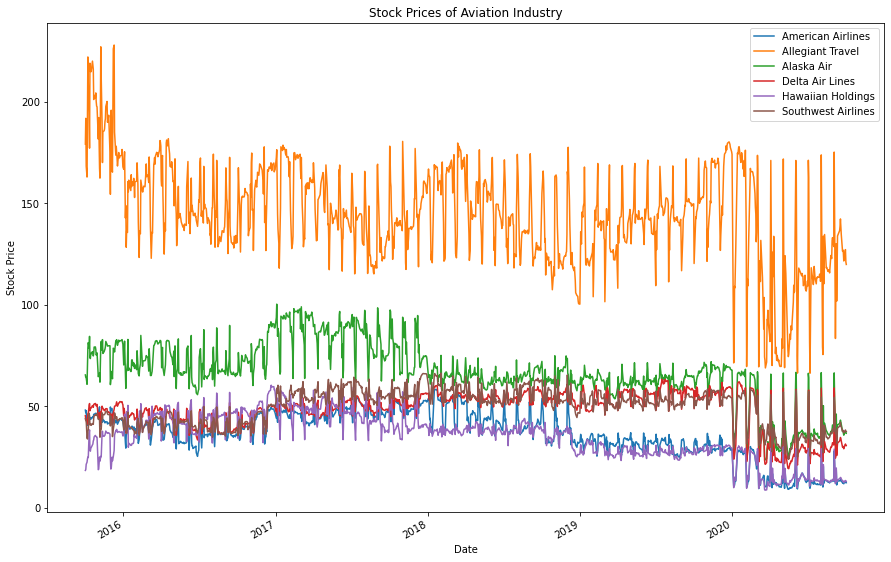

In [26]:
#2.0 Visual Plot for Aviation Industry stocks
df_stockmkt['df_AAL_Close'].plot(label= "American Airlines", figsize=(15,10))
df_stockmkt['df_ALGT_Close'].plot(label= "Allegiant Travel")
df_stockmkt['df_ALK_Close'].plot(label= "Alaska Air")
df_stockmkt['df_DAL_Close'].plot(label= "Delta Air Lines")
df_stockmkt['df_HA_Close'].plot(label= "Hawaiian Holdings")
df_stockmkt['df_LUV_Close'].plot(label= "Southwest Airlines")
plt.ylabel('Stock Price')
plt.title('Stock Prices of Aviation Industry - Non Normalized')
plt.legend()
#Normalize Data Param
#vmin=1
#vmax=0.1
plt.Normalize(vmin=0.0,vmax=1.0,clip=True)

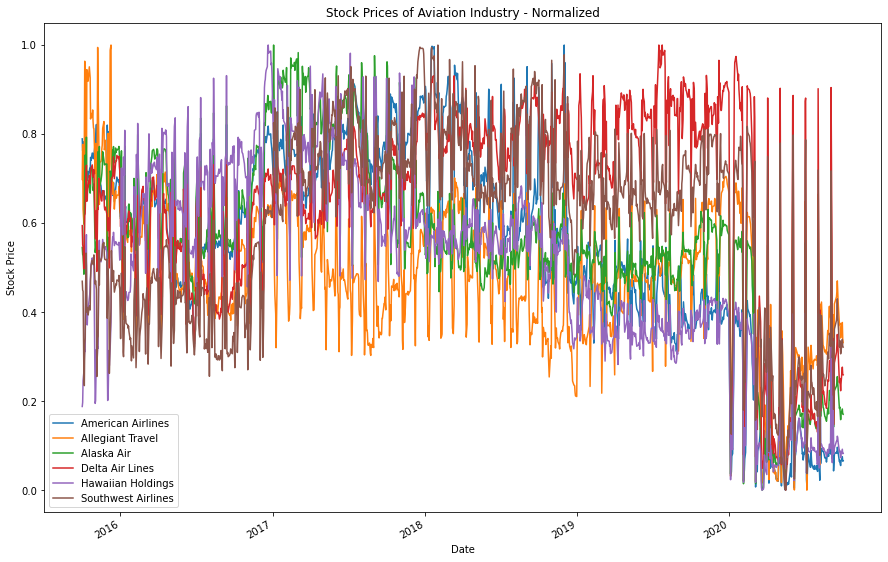

In [30]:
#2.0 Visual Plot for Aviation Industry stocks [Normalized]
df_stockmkt_Norm['df_AAL_Close'].plot(label= "American Airlines", figsize=(15,10))
df_stockmkt_Norm['df_ALGT_Close'].plot(label= "Allegiant Travel")
df_stockmkt_Norm['df_ALK_Close'].plot(label= "Alaska Air")
df_stockmkt_Norm['df_DAL_Close'].plot(label= "Delta Air Lines")
df_stockmkt_Norm['df_HA_Close'].plot(label= "Hawaiian Holdings")
df_stockmkt_Norm['df_LUV_Close'].plot(label= "Southwest Airlines")
plt.ylabel('Stock Price')
plt.title('Stock Prices of Aviation Industry - Normalized')
plt.legend(loc='best')
#Normalize Data Param
#vmin=1
#vmax=0.1
plt.Normalize(vmin=0.0,vmax=1.0,clip=True)

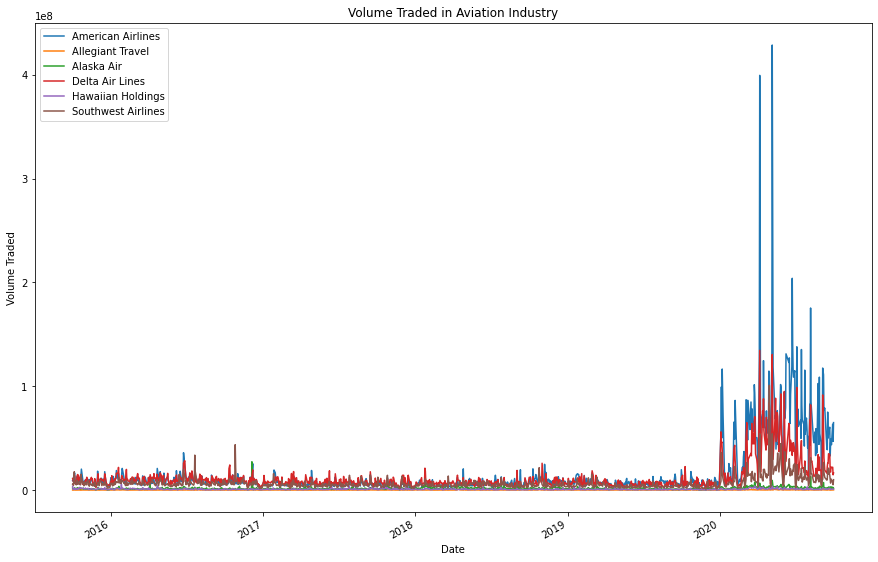

In [27]:
##2.1 Visual Plot for Aviation Industry volume Traded
df_stockmkt['df_AAL_Volume'].plot(label= "American Airlines", figsize=(15,10))
df_stockmkt['df_ALGT_Volume'].plot(label= "Allegiant Travel")
df_stockmkt['df_ALK_Volume'].plot(label= "Alaska Air")
df_stockmkt['df_DAL_Volume'].plot(label= "Delta Air Lines")
df_stockmkt['df_HA_Volume'].plot(label= "Hawaiian Holdings")
df_stockmkt['df_LUV_Volume'].plot(label= "Southwest Airlines")
plt.ylabel('Volume Traded')
plt.title('Volume Traded in Aviation Industry')
plt.legend()
# Normalize Data Param
#vmin=1
#vmax=0.1
plt.Normalize(vmin=0.0,vmax=1.0,clip=True)

### Volume Traded Interpretation

1. Above plot, we see sudden spike in volume of traded stocks in American Airlines, Delta Air lines etc in time-interval of 4th Qtr of 2019 & 1st Qtr of 2020. 
2. During this period, in response of global Corona pandemic American Airlines, Delta Air Lines etc joins the global community to distribute the Covid-19 Vaccines globally as relief efforts. 
3. Links : https://news.aa.com/coronavirus/ ; https://news.delta.com/delta-cargo-successfully-transports-4-million-covid-19-vaccines-colombia-0

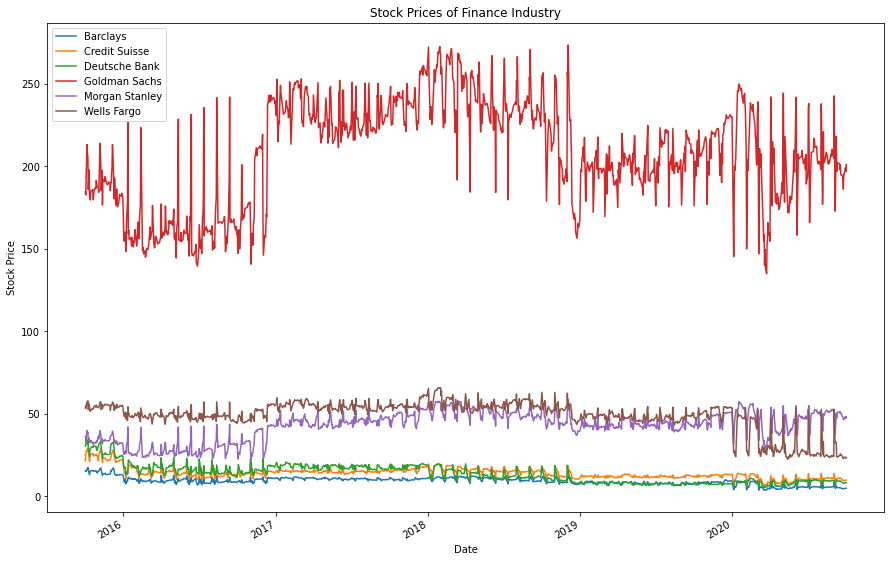

In [38]:
#2.2 Visual Plot for Finance Industry stocks

df_stockmkt['df_BCS_Close'].plot(label= "Barclays", figsize=(15,10))
df_stockmkt['df_CS_Close'].plot(label= "Credit Suisse")
df_stockmkt['df_DB_Close'].plot(label= 'Deutsche Bank')
df_stockmkt['df_GS_Close'].plot(label= 'Goldman Sachs')
df_stockmkt['df_MS_Close'].plot(label= 'Morgan Stanley')
df_stockmkt['df_WFC_Close'].plot(label= 'Wells Fargo ')
plt.ylabel('Stock Price')
plt.title('Stock Prices of Finance Industry')
plt.legend()
# Normalize Data Param
#vmin=1
#vmax=0.1
plt.Normalize(vmin=0.0,vmax=1.0,clip=True)

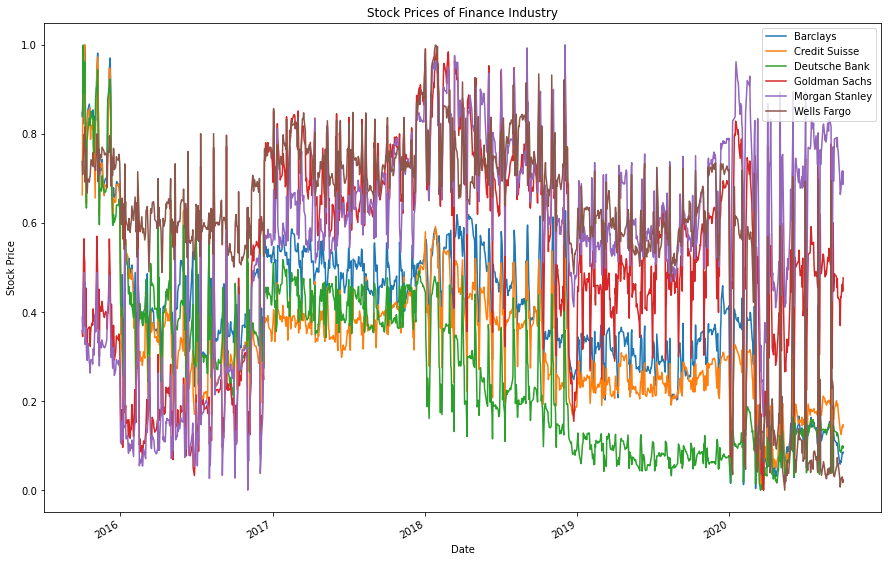

In [39]:
#2.2 Visual Plot for Finance Industry stocks [Normalized]

df_stockmkt_Norm['df_BCS_Close'].plot(label= "Barclays", figsize=(15,10))
df_stockmkt_Norm['df_CS_Close'].plot(label= "Credit Suisse")
df_stockmkt_Norm['df_DB_Close'].plot(label= 'Deutsche Bank')
df_stockmkt_Norm['df_GS_Close'].plot(label= 'Goldman Sachs')
df_stockmkt_Norm['df_MS_Close'].plot(label= 'Morgan Stanley')
df_stockmkt_Norm['df_WFC_Close'].plot(label= 'Wells Fargo ')
plt.ylabel('Stock Price')
plt.title('Stock Prices of Finance Industry')
plt.legend()
# Normalize Data Param
#vmin=1
#vmax=0.1
plt.Normalize(vmin=0.0,vmax=1.0,clip=True)

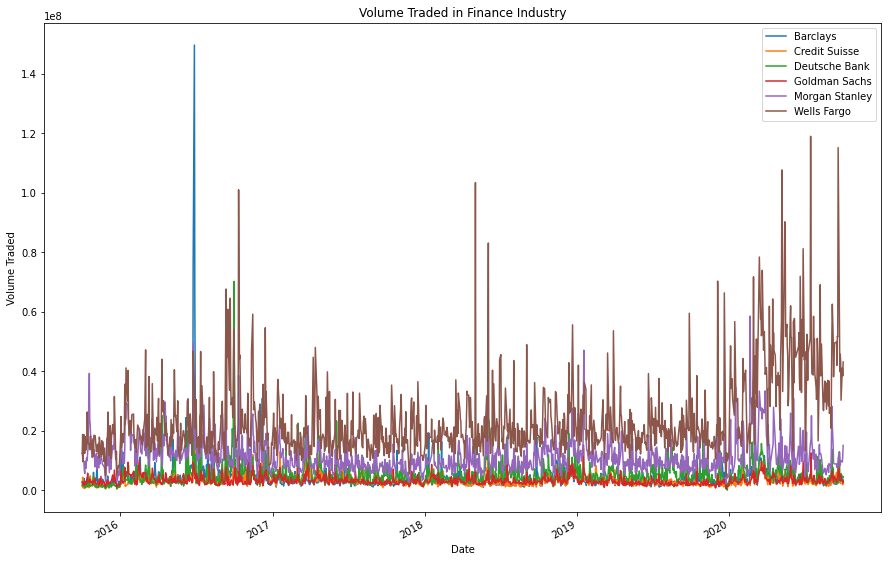

In [40]:
#2.3 Visual Plot for Finance Industry volume Traded

df_stockmkt['df_BCS_Volume'].plot(label= "Barclays", figsize=(15,10))
df_stockmkt['ddf_CS_Volume'].plot(label= "Credit Suisse")
df_stockmkt['df_DB_Volume'].plot(label= 'Deutsche Bank')
df_stockmkt['df_GS_Volume'].plot(label= 'Goldman Sachs')
df_stockmkt['df_MS_Volume'].plot(label= 'Morgan Stanley')
df_stockmkt['df_WFC_Volume'].plot(label= 'Wells Fargo ')
plt.ylabel('Volume Traded')
plt.title('Volume Traded in Finance Industry')
plt.legend()
# Normalize Data Param
#vmin=1
#vmax=0.1
plt.Normalize(vmin=0.0,vmax=1.0,clip=True)

### Volume Traded Interpretation

1. Above plot, we see sudden spike in volume of traded stocks in Barclays etc in 3rd Qtr of 2016. 
2. During this period, Barclays has announced Sale of African business unit and selling off "Non-Core" Assets and Barclays had      benefitted from the sharp depreciation of the pound against the dollar following the Brexit vote, and that its investment        bank revenues had also helped its performance
3. Links :https://www.bbc.com/news/business-39041799

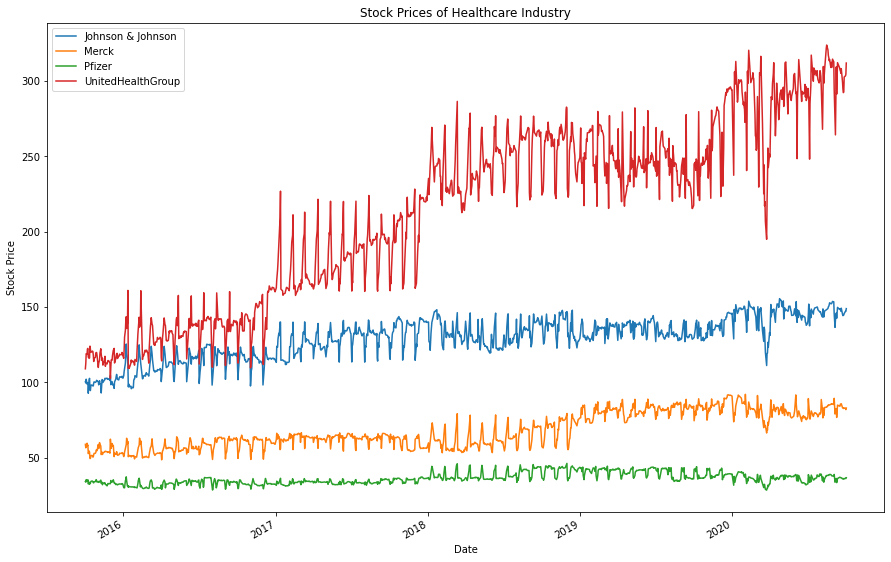

In [41]:
#2.4 Visual Plot for Healthcare Industry stocks

df_stockmkt['df_JNJ_Close'].plot(label= "Johnson & Johnson", figsize=(15,10))
df_stockmkt['df_MRK_Close'].plot(label= "Merck")
df_stockmkt['df_PFE_Close'].plot(label= 'Pfizer')
df_stockmkt['df_UNH_Close'].plot(label= 'UnitedHealthGroup')
plt.ylabel('Stock Price')
plt.title('Stock Prices of Healthcare Industry')
plt.legend()

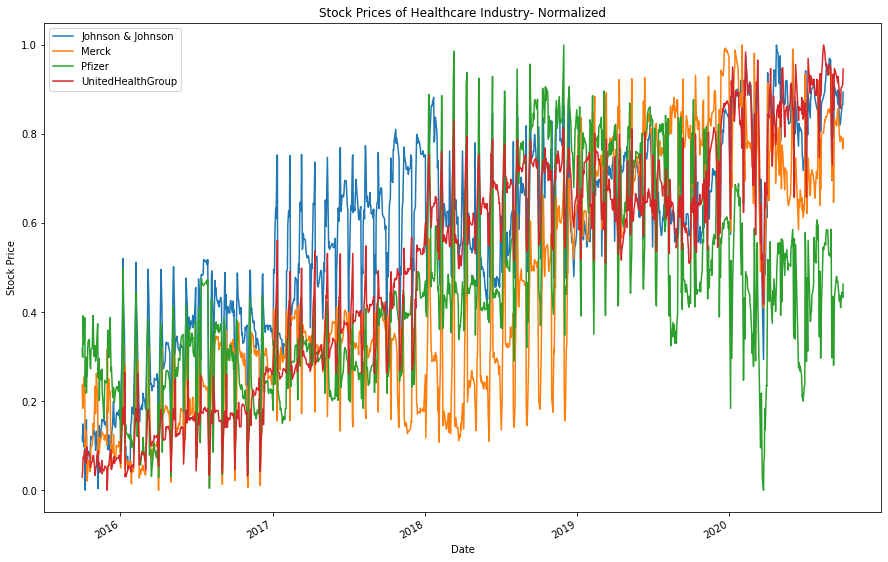

In [42]:
#2.4 Visual Plot for Healthcare Industry stocks [Normalized]

df_stockmkt_Norm['df_JNJ_Close'].plot(label= "Johnson & Johnson", figsize=(15,10))
df_stockmkt_Norm['df_MRK_Close'].plot(label= "Merck")
df_stockmkt_Norm['df_PFE_Close'].plot(label= 'Pfizer')
df_stockmkt_Norm['df_UNH_Close'].plot(label= 'UnitedHealthGroup')
plt.ylabel('Stock Price')
plt.title('Stock Prices of Healthcare Industry- Normalized')
plt.legend()

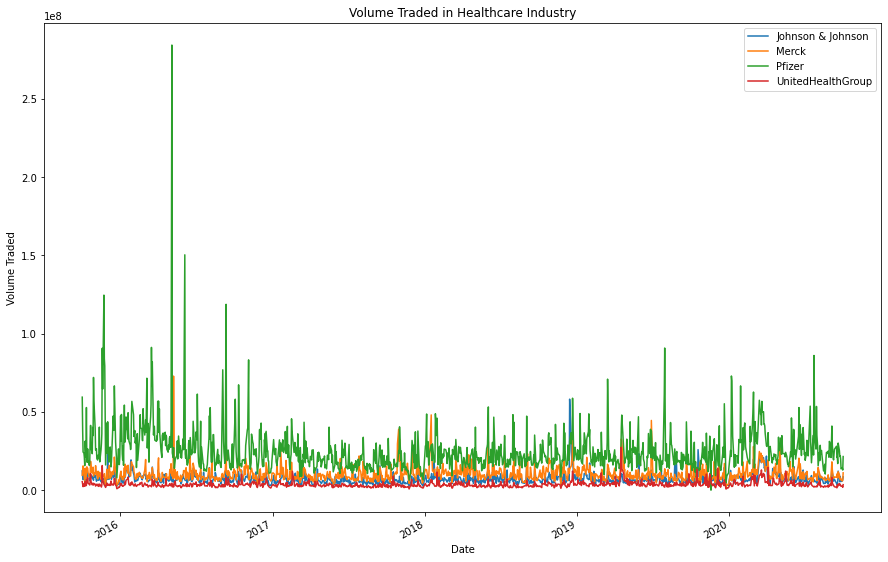

In [43]:
#2.5 Visual Plot for Healthcare Industry volume Traded

df_stockmkt['df_JNJ_Volume'].plot(label= "Johnson & Johnson", figsize=(15,10))
df_stockmkt['df_MRK_Volume'].plot(label= "Merck")
df_stockmkt['df_PFE_Volume'].plot(label= 'Pfizer')
df_stockmkt['df_UNH_Volume'].plot(label= 'UnitedHealthGroup')
plt.ylabel('Volume Traded')
plt.title('Volume Traded in Healthcare Industry')
plt.legend()

### Volume Traded Interpretation

1. Above plot, we see sudden spike in volume of traded stocks of Pfizer 
2. Pfizer bought  Medivation Inc (a U.S. cancer drug company) in 2016 for $14 Billion in cash 
3. Links :https://www.reuters.com/article/us-medivation-m-a-pfizer-idUSKCN10W0YG

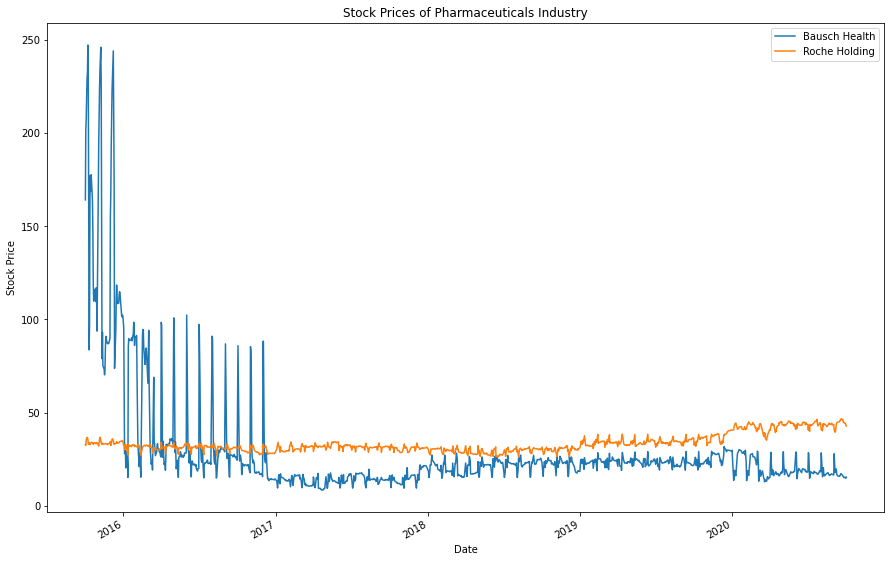

In [44]:
#2.6 Visual Plot for Pharmaceuticals Industry stocks

df_stockmkt['df_BHC_Close'].plot(label= "Bausch Health", figsize=(15,10))
df_stockmkt['df_RHHBY_Close'].plot(label= "Roche Holding")
plt.ylabel('Stock Price')
plt.title('Stock Prices of Pharmaceuticals Industry')
plt.legend()

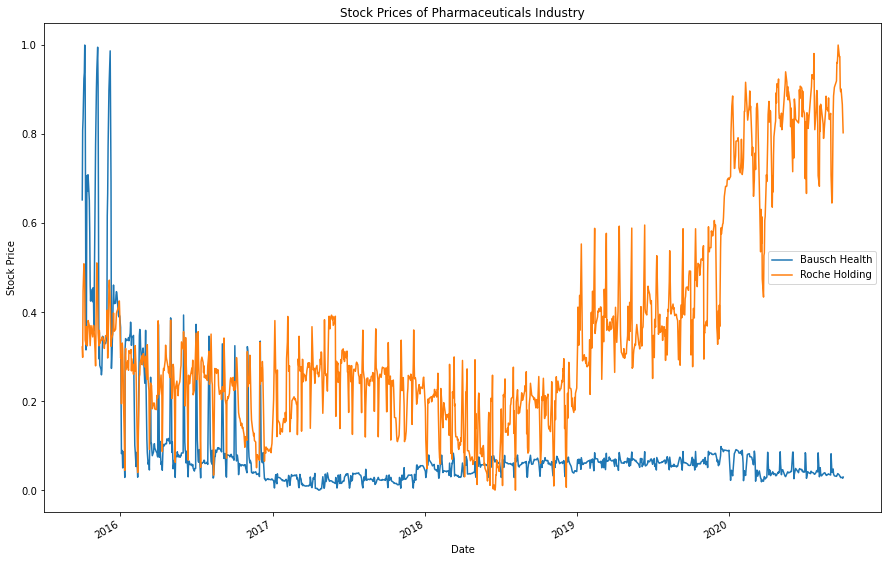

In [46]:
#2.6 Visual Plot for Pharmaceuticals Industry stocks [Normalized]

df_stockmkt_Norm['df_BHC_Close'].plot(label= "Bausch Health", figsize=(15,10))
df_stockmkt_Norm['df_RHHBY_Close'].plot(label= "Roche Holding")
plt.ylabel('Stock Price')
plt.title('Stock Prices of Pharmaceuticals Industry')
plt.legend()

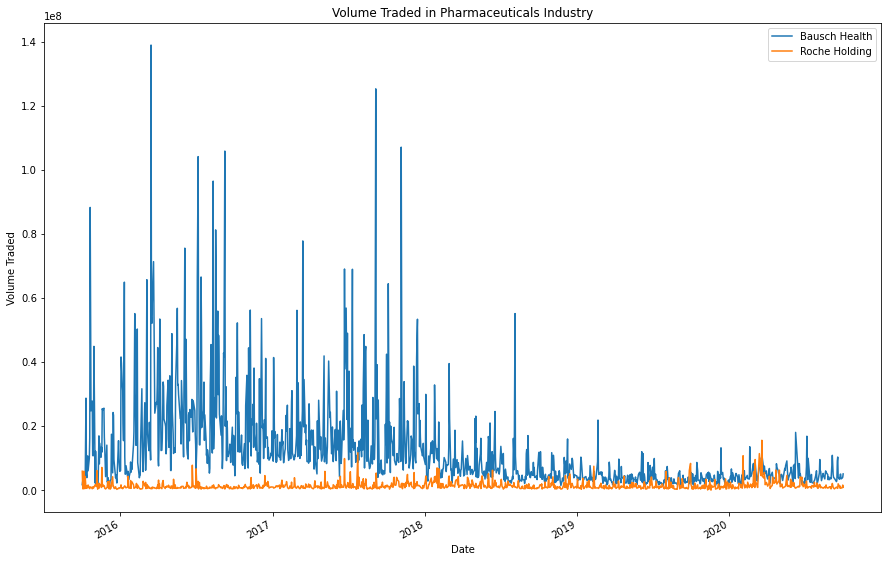

In [49]:
#2.7 Visual Plot for Pharmaceuticals Industry volume Traded

df_stockmkt['df_BHC_Volume'].plot(label= "Bausch Health", figsize=(15,10))
df_stockmkt['df_RHHBY_Volume'].plot(label= "Roche Holding")
plt.ylabel('Volume Traded')
plt.title('Volume Traded in Pharmaceuticals Industry')
plt.legend()

### Volume Traded Interpretation

1. In above plot, we see sudden spike in volume of traded stocks of Bausch Health Companies 
2. The reason for sudden spike in stock is due to that investor dumped shares of the beleaguered Valeant Pharmaceuticals International on Tuesday, erasing more than $11 billion from its market value. 
3. Links :https://www.nytimes.com/2016/03/16/business/figuring-out-what-valeant-is-really-worth.html

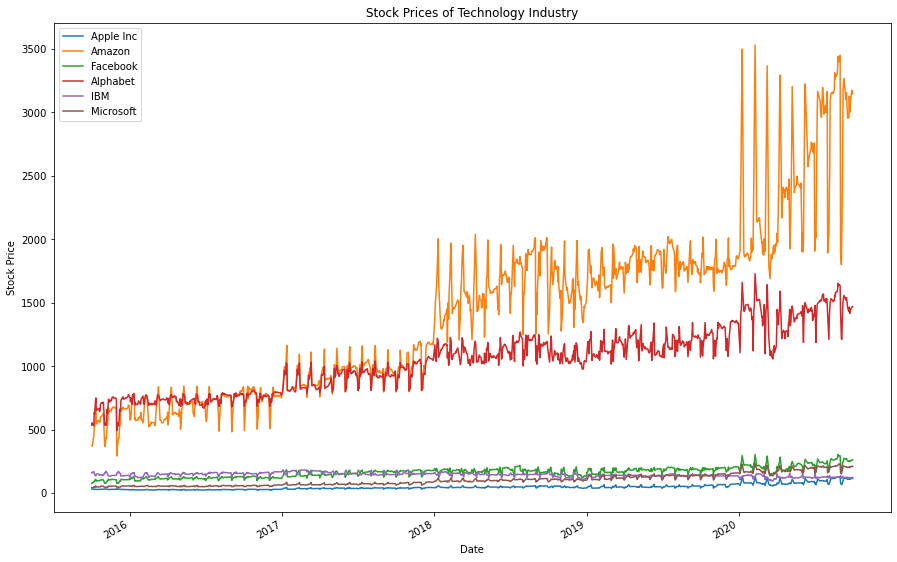

In [50]:
#2.8 Visual Plot for Technology Industry

df_stockmkt['df_AAPL_Close'].plot(label= "Apple Inc", figsize=(15,10))
df_stockmkt['df_AMZN_Close'].plot(label= "Amazon")
df_stockmkt['df_FB_Close'].plot(label= "Facebook")
df_stockmkt['df_GOOG_Close'].plot(label= "Alphabet")
df_stockmkt['df_IBM_Close'].plot(label= "IBM")
df_stockmkt['df_MSFT_Close'].plot(label= "Microsoft")
plt.ylabel('Stock Price')
plt.title('Stock Prices of Technology Industry')
plt.legend()

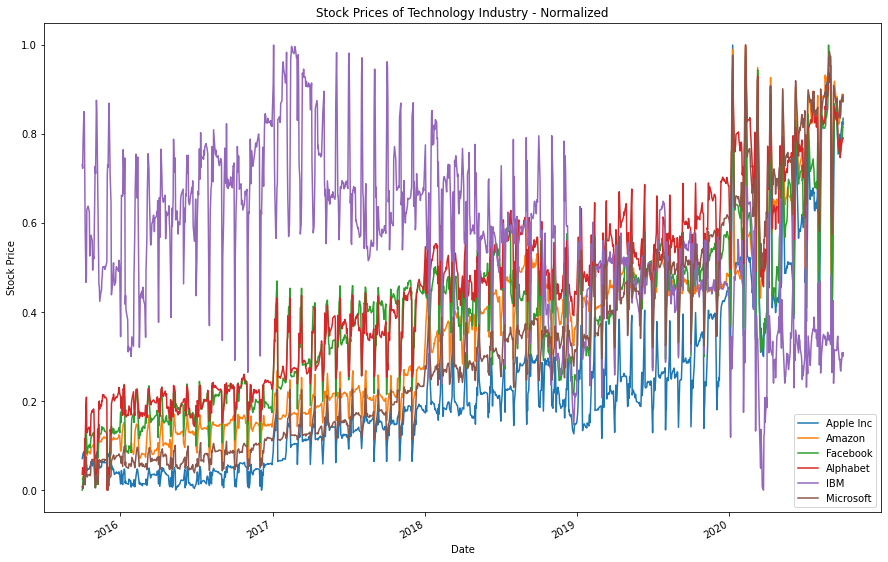

In [51]:
#2.8 Visual Plot for Technology Industry - [Normalized]

df_stockmkt_Norm['df_AAPL_Close'].plot(label= "Apple Inc", figsize=(15,10))
df_stockmkt_Norm['df_AMZN_Close'].plot(label= "Amazon")
df_stockmkt_Norm['df_FB_Close'].plot(label= "Facebook")
df_stockmkt_Norm['df_GOOG_Close'].plot(label= "Alphabet")
df_stockmkt_Norm['df_IBM_Close'].plot(label= "IBM")
df_stockmkt_Norm['df_MSFT_Close'].plot(label= "Microsoft")
plt.ylabel('Stock Price')
plt.title('Stock Prices of Technology Industry - Normalized')
plt.legend()

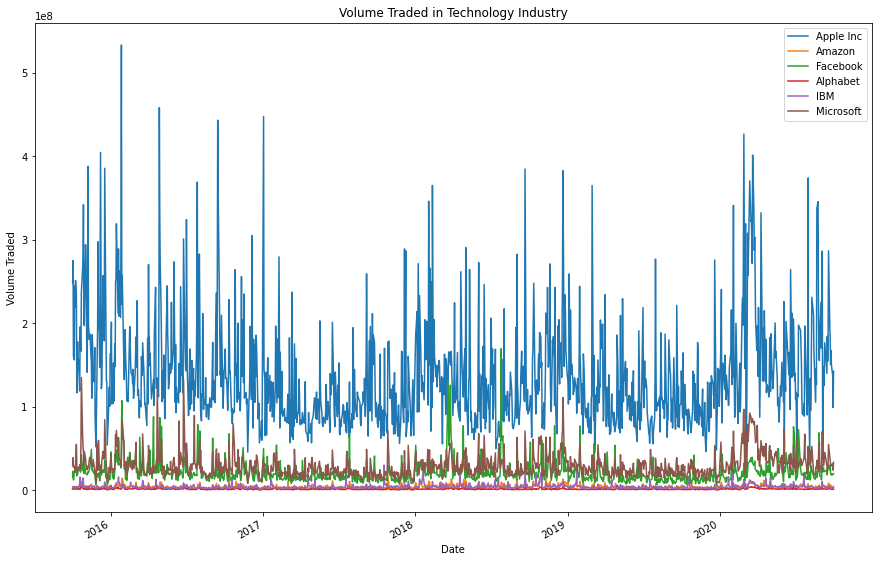

In [52]:
#2.9 Visual Plot for Technology Industry volume Traded

df_stockmkt['df_AAPL_Volume'].plot(label= "Apple Inc", figsize=(15,10))
df_stockmkt['df_AMZN_Volume'].plot(label= "Amazon")
df_stockmkt['df_FB_Volume'].plot(label= "Facebook")
df_stockmkt['df_GOOG_Volume'].plot(label= "Alphabet")
df_stockmkt['ddf_IBM_Volume'].plot(label= "IBM")
df_stockmkt['df_MSFT_Volume'].plot(label= "Microsoft")
plt.ylabel('Volume Traded')
plt.title('Volume Traded in Technology Industry')
plt.legend()

## 3.  Stock analysis of Aviation Industry 

### 1.0 Calculating Daily Return Metrics for Aviation Industry

In [53]:
#1.0 Calculating Daily Return Metrics for Aviation Industry

df_stockmkt['Daily_Return_AAL'] = df_stockmkt['df_AAL_Close'].pct_change()
df_stockmkt['Daily_Return_ALGT'] = df_stockmkt['df_ALGT_Close'].pct_change()
df_stockmkt['Daily_Return_ALK'] = df_stockmkt['df_ALK_Close'].pct_change()
df_stockmkt['Daily_Return_DAL'] = df_stockmkt['df_DAL_Close'].pct_change()
df_stockmkt['Daily_Return_HA'] = df_stockmkt['df_HA_Close'].pct_change()
df_stockmkt['Daily_Return_LUV'] = df_stockmkt['df_LUV_Close'].pct_change()
df_stockmkt['Daily_Return_SP500'] = df_stockmkt['df_SP500_Close'].pct_change()

### 1.1 Visualizing Daily Return Metrics using Subplots for Aviation Industry

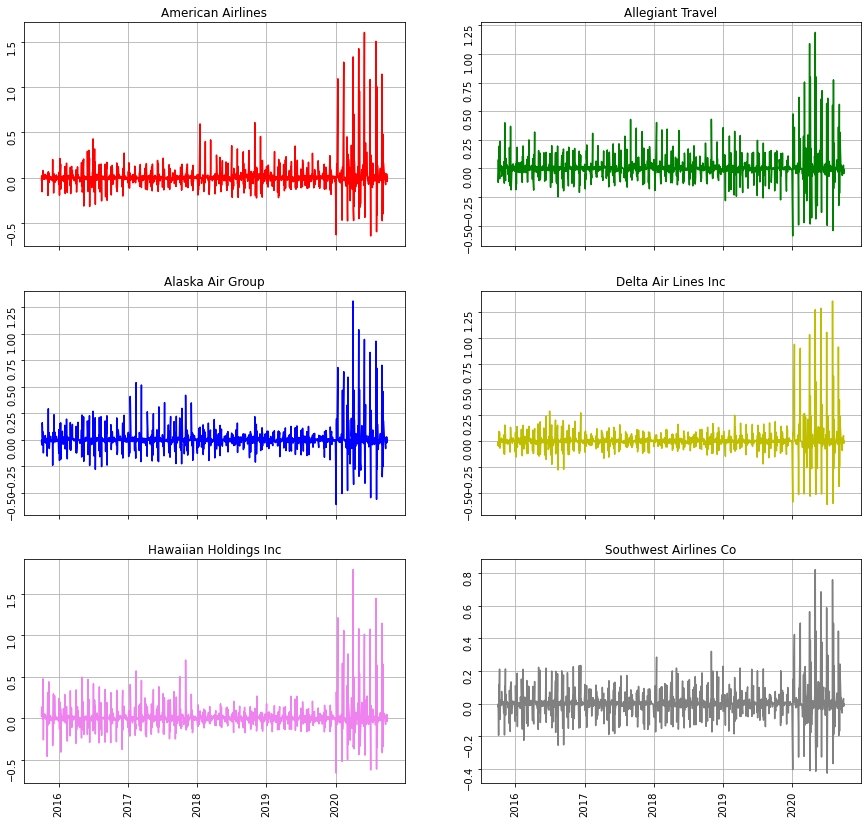

In [54]:
#1.1 Subplots on daily Return Metrics for Aviation Industry

f, ax = plt.subplots(3, 2, figsize=(15,14), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_AAL'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('American Airlines');

ax[0,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_ALGT'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Allegiant Travel');

ax[1,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_ALK'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Alaska Air Group');

ax[1,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_DAL'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Delta Air Lines Inc');

ax[2,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_HA'], color='violet')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('Hawaiian Holdings Inc');

ax[2,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_LUV'], color='grey')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Southwest Airlines Co');

## Interpretation of Subplots

1. The worst daily return in all aviation stock market was starting of early 2020, wherein the drop fell beyond -0.5%.
2. The best daily return in mostly all aviation stocks noticed in 1st quater of 2020. Specifically, American Airline and       Hawaiian breached maximum daily return more than 1.5% and Alaska airlines and delta airlines had 1.25% daily return. Furthermore, Allegiant Travels and Southwest airlines had 1.23% and 0.8% max. daily return respectively. 
3. Delta Airlines had least volatility compared its peer groups


#### 1.2 Merge Daily Return Df [Aviation Industry]

In [56]:
##1.2 Merging daily_return stocks into Dataframe for visualizing Boxplot 

df_stockmkt_Aviation_R = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.Daily_Return_AAL,df_stockmkt.Daily_Return_ALGT,df_stockmkt.Daily_Return_ALK,
                     df_stockmkt.Daily_Return_DAL,df_stockmkt.Daily_Return_HA,df_stockmkt.Daily_Return_LUV])

df_stockmkt_Aviation_R.dropna(inplace=True)
print(df_stockmkt_Aviation_R.head(2))

            Daily_Return_AAL  Daily_Return_ALGT  Daily_Return_ALK  \
Date                                                                
2015-10-03         -0.027263           0.070986         -0.018357   
2015-10-04          0.021181          -0.122758         -0.003584   

            Daily_Return_DAL  Daily_Return_HA  Daily_Return_LUV  
Date                                                             
2015-10-03         -0.041924         0.025627         -0.019187  
2015-10-04         -0.004376         0.135566         -0.002795  


#### 1.3 Visualizing Daily Return via Boxplot 
Boxplot helps to understand the distribution of daily returns (Skewed/not, Outliers)

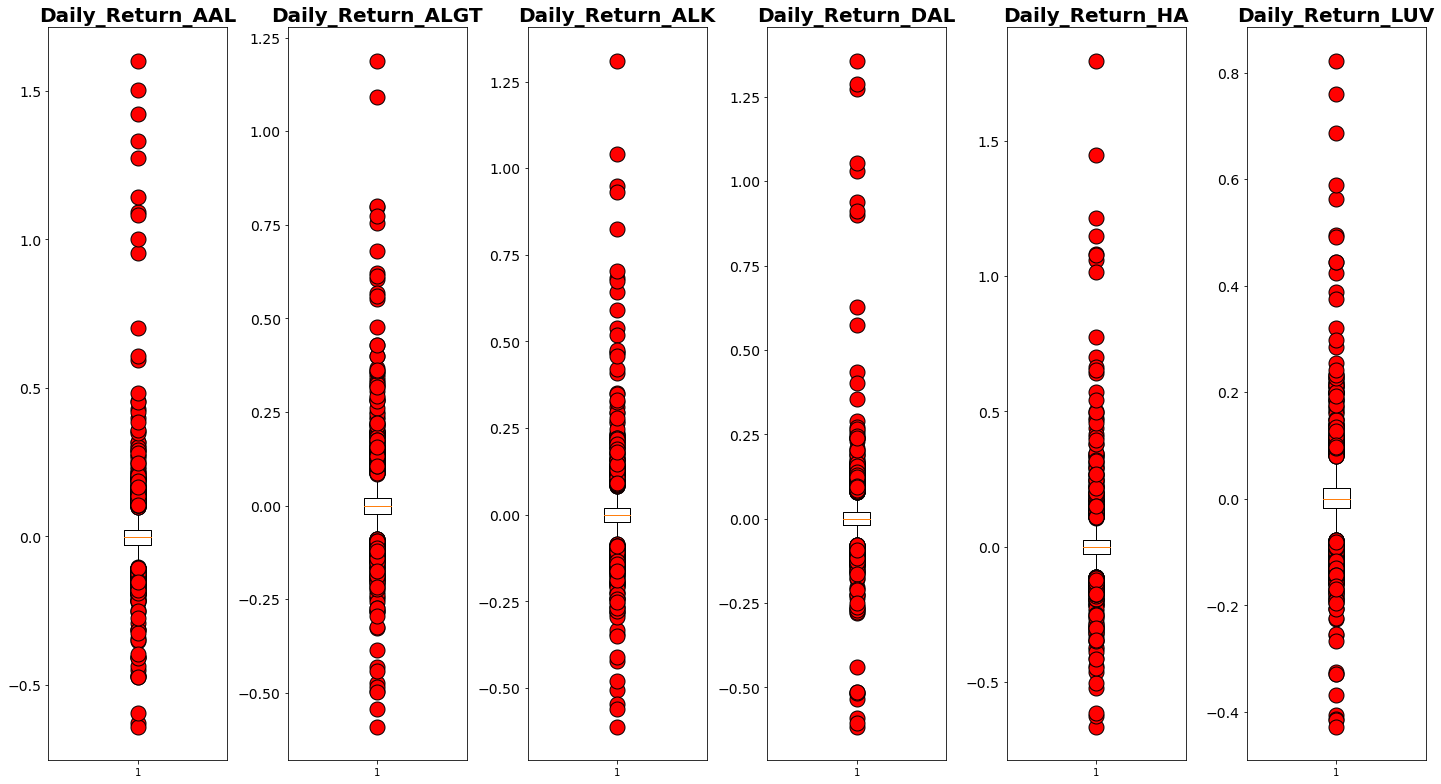

In [57]:
#1.3 Boxplot for daily return for aviation stock

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='black', markersize=15,
                  linestyle='none')

fig, axs = plt.subplots(1, len(df_stockmkt_Aviation_R.columns), figsize=(20,11))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_stockmkt_Aviation_R.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_stockmkt_Aviation_R.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### Boxplot Interpretation 

1. Datapoints in 'AAL'and 'LUV' mostly concentrated between -0.5% to 0.5% and contains some outliers towards Tail(Third Quatile Q3) of Boxplot
2. Daily Returns in 'ALK' has widely dispersed from -0.5% to 0.72% . Similarly, daily returns for 'LUV' also spread widely from -0.4% till 0.4%. 
3. Daily Returns in 'DAL' range between -0.25 to 0.25. It shows less daily returns.

#### 1.4 Visualizing Daily Return via Distribution Plot

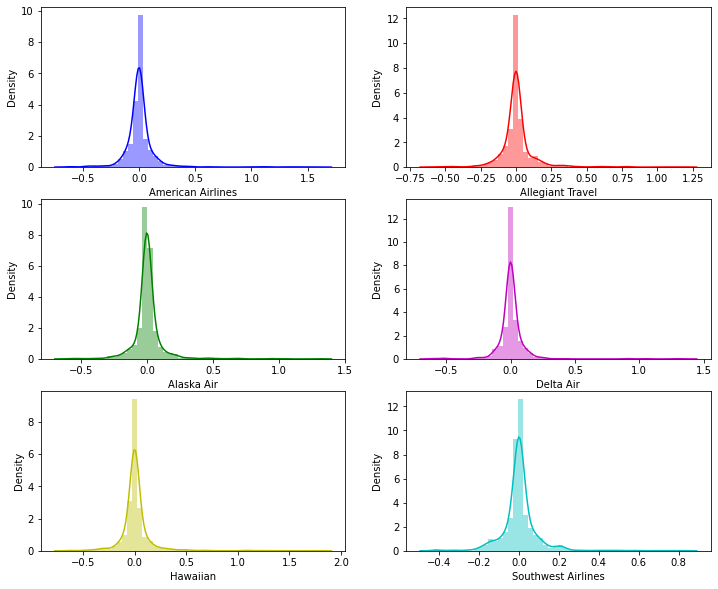

In [58]:
#1.4 Distribution Plot 
f, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.distplot(df_stockmkt_Aviation_R['Daily_Return_AAL'], color="b", ax=axes[0, 0], axlabel='American Airlines');
sns.distplot(df_stockmkt_Aviation_R['Daily_Return_ALGT'], color="r", ax=axes[0, 1], axlabel='Allegiant Travel');
sns.distplot(df_stockmkt_Aviation_R['Daily_Return_ALK'], color="g", ax=axes[1, 0], axlabel='Alaska Air');
sns.distplot(df_stockmkt_Aviation_R['Daily_Return_DAL'], color="m", ax=axes[1, 1], axlabel='Delta Air');
sns.distplot(df_stockmkt_Aviation_R['Daily_Return_HA'], color="y", ax=axes[2, 0], axlabel='Hawaiian');
sns.distplot(df_stockmkt_Aviation_R['Daily_Return_LUV'], color="c", ax=axes[2, 1], axlabel='Southwest Airlines');

### 1.5 Min. Value of Daily Return in aviation stocks

In [77]:
# 1.5 Minimum value of daily return in Aviation stock along with Dates
Min_Value = df_stockmkt_Aviation_R.iloc[:,:6].min()
print(Min_Value)

Daily_Return_AAL    -0.639887
Daily_Return_ALGT   -0.590381
Daily_Return_ALK    -0.611070
Daily_Return_DAL    -0.615849
Daily_Return_HA     -0.664049
Daily_Return_LUV    -0.427698
dtype: float64


In [75]:
## Dates of Min. return of Daily return 
Min_Value_Dates = df_stockmkt_Aviation_R.iloc[:,:6].idxmin()
print(Min_Value_Dates)

Daily_Return_AAL    2020-07-04
Daily_Return_ALGT   2020-01-04
Daily_Return_ALK    2020-01-04
Daily_Return_DAL    2020-07-04
Daily_Return_HA     2020-01-04
Daily_Return_LUV    2020-07-04
dtype: datetime64[ns]


### 1.6 Max. Value of Daily Return in aviation stocks 

In [78]:
##1.6 Maximum value of daily return in Aviation stock along with Dates
Max_Value = df_stockmkt_Aviation_R.iloc[:,:6].max()
print(Max_Value)


Daily_Return_AAL     1.601905
Daily_Return_ALGT    1.188328
Daily_Return_ALK     1.310151
Daily_Return_DAL     1.356828
Daily_Return_HA      1.795977
Daily_Return_LUV     0.822400
dtype: float64


In [79]:
## Dates of Max. return of Daily return 
Max_Value_Dates = df_stockmkt_Aviation_R.iloc[:,:6].idxmax()
print(Max_Value_Dates)

Daily_Return_AAL    2020-06-01
Daily_Return_ALGT   2020-05-02
Daily_Return_ALK    2020-04-02
Daily_Return_DAL    2020-08-01
Daily_Return_HA     2020-04-02
Daily_Return_LUV    2020-05-02
dtype: datetime64[ns]


### 1.7 scatter_matrix for checking volatility in Aviation Stock
###### Each scatter plot in the matrix helps us understand the correlation between the corresponding pair of attributes


array([[<AxesSubplot:xlabel='Daily_Return_AAL', ylabel='Daily_Return_AAL'>,
        <AxesSubplot:xlabel='Daily_Return_ALGT', ylabel='Daily_Return_AAL'>,
        <AxesSubplot:xlabel='Daily_Return_ALK', ylabel='Daily_Return_AAL'>,
        <AxesSubplot:xlabel='Daily_Return_DAL', ylabel='Daily_Return_AAL'>,
        <AxesSubplot:xlabel='Daily_Return_HA', ylabel='Daily_Return_AAL'>,
        <AxesSubplot:xlabel='Daily_Return_LUV', ylabel='Daily_Return_AAL'>],
       [<AxesSubplot:xlabel='Daily_Return_AAL', ylabel='Daily_Return_ALGT'>,
        <AxesSubplot:xlabel='Daily_Return_ALGT', ylabel='Daily_Return_ALGT'>,
        <AxesSubplot:xlabel='Daily_Return_ALK', ylabel='Daily_Return_ALGT'>,
        <AxesSubplot:xlabel='Daily_Return_DAL', ylabel='Daily_Return_ALGT'>,
        <AxesSubplot:xlabel='Daily_Return_HA', ylabel='Daily_Return_ALGT'>,
        <AxesSubplot:xlabel='Daily_Return_LUV', ylabel='Daily_Return_ALGT'>],
       [<AxesSubplot:xlabel='Daily_Return_AAL', ylabel='Daily_Return_ALK'>,
    

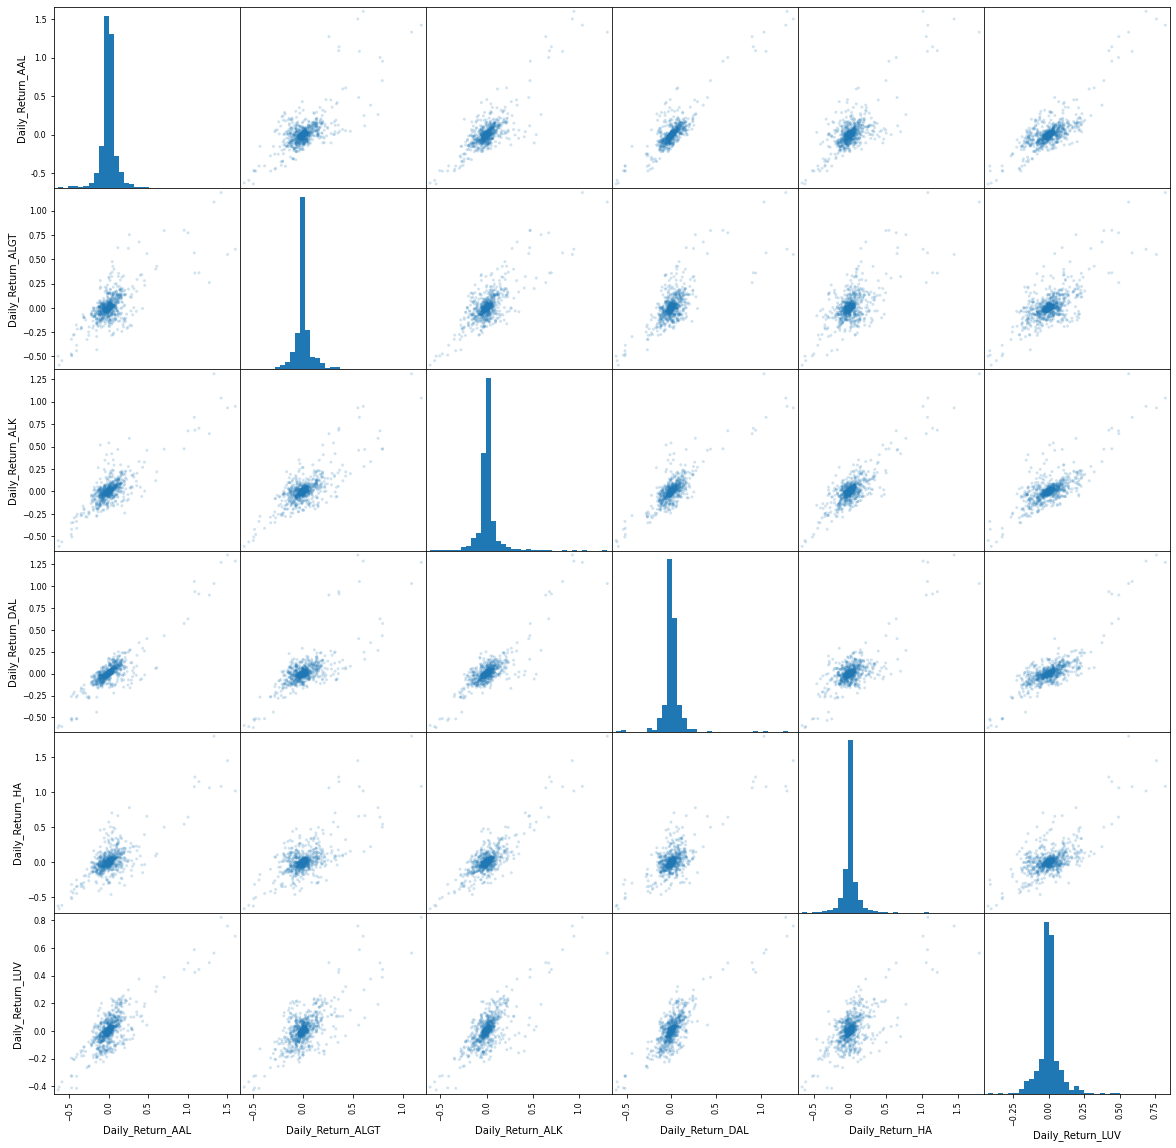

In [80]:
pd.plotting.scatter_matrix(df_stockmkt_Aviation_R.iloc[:,:6], alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(20,20))

##### Note that the correlation analysis is performed on the daily percentage change(daily returns) of the stock price and not on the stock price


### 1.8 Correlation Analysis

In [81]:
## Correlation analysis using 'Pearson' method
corr_df_Avi = df_stockmkt_Aviation_R.iloc[:,:6].corr(method='pearson')
corr_df_Avi

Daily_Return_AAL  Daily_Return_ALGT  Daily_Return_ALK  \
Daily_Return_AAL           1.000000           0.695636          0.799967   
Daily_Return_ALGT          0.695636           1.000000          0.753777   
Daily_Return_ALK           0.799967           0.753777          1.000000   
Daily_Return_DAL           0.872760           0.721066          0.829901   
Daily_Return_HA            0.743654           0.643170          0.829518   
Daily_Return_LUV           0.784983           0.699194          0.756518   

                   Daily_Return_DAL  Daily_Return_HA  Daily_Return_LUV  
Daily_Return_AAL           0.872760         0.743654          0.784983  
Daily_Return_ALGT          0.721066         0.643170          0.699194  
Daily_Return_ALK           0.829901         0.829518          0.756518  
Daily_Return_DAL           1.000000         0.746580          0.813072  
Daily_Return_HA            0.746580         1.000000          0.662151  
Daily_Return_LUV           0.813072         0.662151          1.000000

#### Correlation Interpretation 
1. 'AAL' 'American Airlines Group' has correlation value of 1.0 which signifies that it is positive correlation between two   stocks.   
2. It's also noted that stocks 'HA', 'LUV' have correlation value greater than 0.7 (70%) is considered a good correlation.
3. It is observed that 'ALK' and 'DAL' have correlation coefficient > 8.0 (80%). We can assume that both aforementioned stocks has postive correlation along other stocks.

#### 1.9 Heatmap for visualizing correlation Matrix

<Figure size 432x288 with 0 Axes>

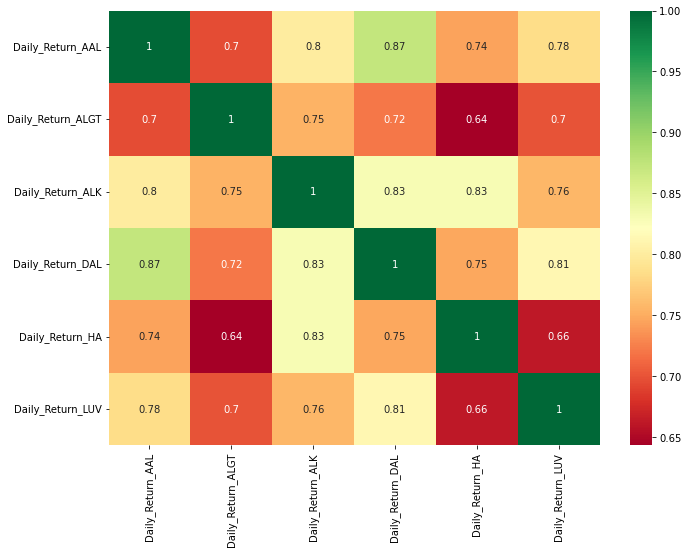

<Figure size 432x288 with 0 Axes>

In [82]:
##1.9 Visualizing Correlation Matrix using Heatmap
plt.figure(figsize = (11,8))
sns.heatmap(corr_df_Avi, annot=True, cmap="RdYlGn")
plt.figure()

### 1.10 Scatter Plot for Expected Return Visualization

Quantify risk via comparision the mean of expected return with standard deviation of expected return 

In [83]:
risk_Avi = corr_df_Avi.dropna()

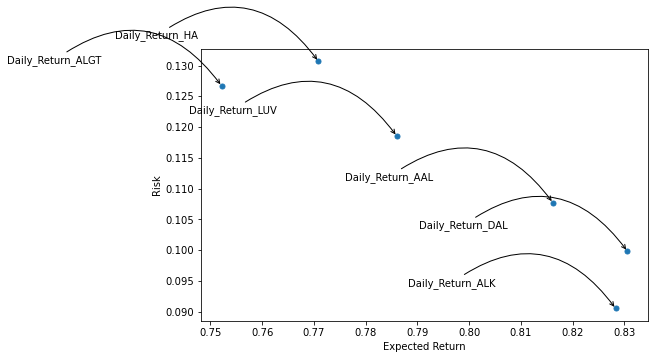

In [84]:
#1.10 Scatter Plot for Expected Return Visualization
plt.figure(figsize=(8,5))

plt.scatter(risk_Avi.mean(),risk_Avi.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(risk_Avi.columns,risk_Avi.mean(),risk_Avi.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

#### Interpretation of Scatter Plot


1. HA :- High Risk Low Return 
2. ALGT :- High Risk Low Return 
3. LUV :-  High Risk Medium Return 
4. AAL :-  Medium Risk Medium Return 
5. DAL :- Low Risk High Return 
6. ALK :- Low Risk High Return 

### 1.11 Standard Deviation in Aviation Stocks 

In [85]:
# 1.11 Standard deviation
df_stockmkt_Aviation_R.std()

Daily_Return_AAL     0.154292
Daily_Return_ALGT    0.123749
Daily_Return_ALK     0.121014
Daily_Return_DAL     0.123339
Daily_Return_HA      0.155907
Daily_Return_LUV     0.093959
dtype: float64

### Interpretation of Standard Deviation
1.  It was noticed that Southwest Airlines Co 'LUV' Stock had lowest standard deviation of 0.09 and highest being 0.155 of Hawaiian Holdings Inc 'Ha' etc.  
2. We can conclude from above that, Southwest Airlines Co 'LUV' has low volatile fund returns and it is expected to give predictable performance among it's peers.

### 1.12 Sharpe ratio

Sharpe ratio indicates how much risk was taken to generate the returns. Higher the value means, fund has been able to give better returns for the amount of risk taken

In [86]:
#1.13 Sharpe Ratio
df_stockmkt_Aviation_R['SR_AAL']  = df_stockmkt_Aviation_R['Daily_Return_AAL'].mean() / df_stockmkt_Aviation_R['Daily_Return_AAL'].std() * (252**0.5) 
df_stockmkt_Aviation_R['SR_ALGT']  = df_stockmkt_Aviation_R['Daily_Return_ALGT'].mean() / df_stockmkt_Aviation_R['Daily_Return_ALGT'].std() * (252**0.5) 
df_stockmkt_Aviation_R['SR_ALK']  = df_stockmkt_Aviation_R['Daily_Return_ALK'].mean() / df_stockmkt_Aviation_R['Daily_Return_ALK'].std() * (252**0.5) 
df_stockmkt_Aviation_R['SR_DAL']  = df_stockmkt_Aviation_R['Daily_Return_DAL'].mean() / df_stockmkt_Aviation_R['Daily_Return_DAL'].std()* (252**0.5) 
df_stockmkt_Aviation_R['SR_HA']  = df_stockmkt_Aviation_R['Daily_Return_HA'].mean() / df_stockmkt_Aviation_R['Daily_Return_HA'].std()* (252**0.5) 
df_stockmkt_Aviation_R['SR_LUV'] = df_stockmkt_Aviation_R['Daily_Return_LUV'].mean() / df_stockmkt_Aviation_R['Daily_Return_LUV'].std()* (252**0.5) 

####  Sharpe ratio is calculated by deriving mean of the daily returns, divided by the standard deviation of the daily returns. Also, we needs to annualize the Sharpe ratio. This can be done by 252 tradings day in year and multiply Sharpe ratio by the square root of 252 i.e. 252**0.5

In [87]:
df1 = df_stockmkt_Aviation_R.iloc[0,6:]
print(df1)

SR_AAL     0.873697
SR_ALGT    0.853494
SR_ALK     0.801458
SR_DAL     0.804403
SR_HA      1.009414
SR_LUV     0.682400
Name: 2015-10-03 00:00:00, dtype: float64


### Interpretation
1.Any Sharpe Ratio above 1.00 generally means the portfolio or stock is acceptable to hold because you are receiving an excess return per unit of risk. Anything above 2.00 or 3.00 is considered very good

2.HA stock has acceptable sharpe ratio of 1.00 & rest majority are in range of 0.8 closer to 1.0 and lowest being 0.68.'LUV'

### 1.13 Cumulative Return from Closing Prices [Aviation Stocks]

The Closing stock prices are readily available to us, therefore using closing stock prices to compute cumulative returns

In [88]:
##1.13 Creating Dataframe for Cumulative Returns from Closing Prices of Stocks

df_cum_avi = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.df_AAL_Close,df_stockmkt.df_ALGT_Close,df_stockmkt.df_ALK_Close,
                     df_stockmkt.df_DAL_Close,df_stockmkt.df_HA_Close,df_stockmkt.df_LUV_Close,df_stockmkt.df_SP500_Close])

df_cum_avi.dropna(inplace=True)

In [89]:
df_cum_avi['cumu_Return_AAL'] = (df_cum_avi['df_AAL_Close'].iloc[-1] - df_cum_avi['df_AAL_Close'].iloc[0]) / df_cum_avi['df_AAL_Close'].iloc[0]
df_cum_avi['cumu_Return_ALGT'] = (df_cum_avi['df_ALGT_Close'].iloc[-1] - df_cum_avi['df_ALGT_Close'].iloc[0]) / df_cum_avi['df_ALGT_Close'].iloc[0]
df_cum_avi['cumu_Return_ALK'] = (df_cum_avi['df_ALK_Close'].iloc[-1] - df_cum_avi['df_ALK_Close'].iloc[0]) / df_cum_avi['df_ALK_Close'].iloc[0]
df_cum_avi['cumu_Return_DAL'] = (df_cum_avi['df_DAL_Close'].iloc[-1] - df_cum_avi['df_DAL_Close'].iloc[0]) / df_cum_avi['df_DAL_Close'].iloc[0]
df_cum_avi['cumu_Return_HA'] = (df_cum_avi['df_HA_Close'].iloc[-1] - df_cum_avi['df_HA_Close'].iloc[0]) / df_cum_avi['df_HA_Close'].iloc[0]
df_cum_avi['cumu_Return_LUV'] = (df_cum_avi['df_LUV_Close'].iloc[-1] - df_cum_avi['df_LUV_Close'].iloc[0]) / df_cum_avi['df_LUV_Close'].iloc[0]
df_cum_avi['cumu_Return_SP500'] = (df_cum_avi['df_SP500_Close'].iloc[-1] - df_cum_avi['df_SP500_Close'].iloc[0]) / df_cum_avi['df_SP500_Close'].iloc[0]
print(df_cum_avi.iloc[:,7:].head(1))

            cumu_Return_AAL  cumu_Return_ALGT  cumu_Return_ALK  \
Date                                                             
2015-10-02        -0.744225         -0.330913        -0.439651   

            cumu_Return_DAL  cumu_Return_HA  cumu_Return_LUV  \
Date                                                           
2015-10-02        -0.325243       -0.297165        -0.143444   

            cumu_Return_SP500  
Date                           
2015-10-02           0.625745  


In [90]:
## We will multiple by 100 to get the numbers as percentage change.
df_cum_avi.iloc[:,7:].max() * 100

cumu_Return_AAL     -74.422476
cumu_Return_ALGT    -33.091315
cumu_Return_ALK     -43.965123
cumu_Return_DAL     -32.524272
cumu_Return_HA      -29.716467
cumu_Return_LUV     -14.344448
cumu_Return_SP500    62.574500
dtype: float64

#### We observe here, mostly all the aviation stock prices has incurred loss and In comparision,  the benchmark s&p500 indices we see, it has increased by 63% during the entire 5 Year period.

### 1.14 Cumulative Returns From  Daily Returns [Aviation Industry]

 Calculating Cumulative returns from Daily returns of stocks


In [91]:
##1.14 Calculate the cumulative daily returns

df_stockmkt_Aviation_R['cumu_ret_AAL'] = (1 + df_stockmkt_Aviation_R['Daily_Return_AAL']).cumprod()-1
df_stockmkt_Aviation_R['cumu_ret_ALGT'] =  (1 + df_stockmkt_Aviation_R['Daily_Return_ALGT']).cumprod()-1
df_stockmkt_Aviation_R['cumu_ret_ALK'] =  (1 + df_stockmkt_Aviation_R['Daily_Return_ALK']).cumprod()-1
df_stockmkt_Aviation_R['cumu_ret_DAL'] =  (1 + df_stockmkt_Aviation_R['Daily_Return_DAL']).cumprod()-1
df_stockmkt_Aviation_R['cumu_ret_HA'] =  (1 + df_stockmkt_Aviation_R['Daily_Return_HA']).cumprod()-1
df_stockmkt_Aviation_R['cumu_ret_LUV'] =  (1 + df_stockmkt_Aviation_R['Daily_Return_LUV']).cumprod()-1

In [92]:
##1.14 Creating Dataframe to store cumulative returns(derived from daily returns) of aviation stocks

df_stockmkt_Avi_CR = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt_Aviation_R.cumu_ret_AAL,df_stockmkt_Aviation_R.cumu_ret_ALGT,df_stockmkt_Aviation_R.cumu_ret_ALK,
                     df_stockmkt_Aviation_R.cumu_ret_DAL,df_stockmkt_Aviation_R.cumu_ret_HA,df_stockmkt_Aviation_R.cumu_ret_LUV])
df_stockmkt_Avi_CR.reset_index()
df_stockmkt_Avi_CR.dropna(inplace=True)
print(df_stockmkt_Avi_CR.head(2))

            cumu_ret_AAL  cumu_ret_ALGT  cumu_ret_ALK  cumu_ret_DAL  \
Date                                                                  
2015-10-03     -0.027263       0.070986     -0.018357     -0.041924   
2015-10-04     -0.006660      -0.060486     -0.021876     -0.046117   

            cumu_ret_HA  cumu_ret_LUV  
Date                                   
2015-10-03     0.025627     -0.019187  
2015-10-04     0.164667     -0.021928  


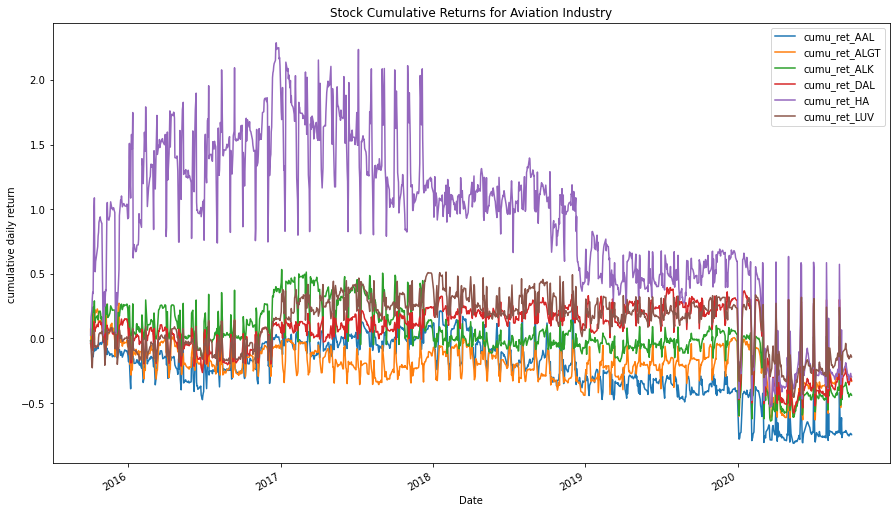

In [93]:
#1.14 Visualizing Stock Cumulative returns (derived from daily returns)
%matplotlib inline
fig = plt.figure(figsize=(15, 9))
ax1 = fig.add_subplot(1, 1, 1)
df_stockmkt_Avi_CR.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('cumulative daily return ')
ax1.set_title('Stock Cumulative Returns for Aviation Industry')
plt.show()

### 1.15 Treynor's Ratio
Treynor's ratio indicates how much excess return was generated for each unit of risk taken. Higher the value means, fund has been able to give better returns for the amount of risk taken.

#### Treynor ratio is calculated using below formula
#### Treynor ratio = return - risk free rate / Beta


In [94]:
#1.15 Calculating Beta, Alpha, R_value, p_value, Std_error for aviation stock 
df_stockmkt_Aviation_R['beta_AAL'], df_stockmkt_Aviation_R['alpha_AAL'], df_stockmkt_Aviation_R['r_value_AAL'], df_stockmkt_Aviation_R['p_value_AAL'], df_stockmkt_Aviation_R['stderror_AAL']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_AAL'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Aviation_R['beta_ALGT'], df_stockmkt_Aviation_R['alpha_ALGT'], df_stockmkt_Aviation_R['r_value_ALGT'], df_stockmkt_Aviation_R['p_value_ALGT'], df_stockmkt_Aviation_R['stderror_ALGT']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_ALGT'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Aviation_R['beta_ALK'], df_stockmkt_Aviation_R['alpha_ALK'], df_stockmkt_Aviation_R['r_value_ALK'], df_stockmkt_Aviation_R['p_value_ALK'], df_stockmkt_Aviation_R['stderror_ALK']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_ALK'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Aviation_R['beta_DAL'], df_stockmkt_Aviation_R['alpha_DAL'], df_stockmkt_Aviation_R['r_value_DAL'], df_stockmkt_Aviation_R['p_value_DAL'], df_stockmkt_Aviation_R['stderror_DAL']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_DAL'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Aviation_R['beta_HA'], df_stockmkt_Aviation_R['alpha_HA'], df_stockmkt_Aviation_R['r_value_HA'], df_stockmkt_Aviation_R['p_value_HA'], df_stockmkt_Aviation_R['stderror_HA']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_HA'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Aviation_R['beta_LUV'], df_stockmkt_Aviation_R['alpha_LUV'], df_stockmkt_Aviation_R['r_value_LUV'], df_stockmkt_Aviation_R['p_value_LUV'], df_stockmkt_Aviation_R['stderror_LUV']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_LUV'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Aviation_R['beta_LUV'], df_stockmkt_Aviation_R['alpha_LUV'], df_stockmkt_Aviation_R['r_value_LUV'], df_stockmkt_Aviation_R['p_value_LUV'], df_stockmkt_Aviation_R['stderror_LUV']   = stats.linregress(df_stockmkt_Aviation_R['Daily_Return_LUV'],df_stockmkt['Daily_Return_SP500'].dropna())

In [95]:
#1.15 Treynor ratio for aviation stock
#rfr (Risk Free Rate) = 2
df_stockmkt_Aviation_R['t_ratio_AAL'] = (df_cum_avi['cumu_Return_AAL'] - 2/100) / df_stockmkt_Aviation_R['beta_AAL']
df_stockmkt_Aviation_R['t_ratio_ALGT'] = (df_cum_avi['cumu_Return_ALGT'] - 2/100) / df_stockmkt_Aviation_R['beta_ALGT']
df_stockmkt_Aviation_R['t_ratio_ALK'] = (df_cum_avi['cumu_Return_ALK'] - 2/100) / df_stockmkt_Aviation_R['beta_ALK']
df_stockmkt_Aviation_R['t_ratio_DAL'] = (df_cum_avi['cumu_Return_DAL'] - 2/100) / df_stockmkt_Aviation_R['beta_DAL']
df_stockmkt_Aviation_R['t_ratio_HA'] = (df_cum_avi['cumu_Return_HA'] - 2/100) / df_stockmkt_Aviation_R['beta_HA']
df_stockmkt_Aviation_R['t_ratio_LUV'] = (df_cum_avi['cumu_Return_LUV'] - 2/100) / df_stockmkt_Aviation_R['beta_LUV']

In [96]:
df2 = df_stockmkt_Aviation_R.iloc[0,48:]
print(df2)

t_ratio_AAL    -9.140590
t_ratio_ALGT   -2.311458
t_ratio_ALK    -3.727735
t_ratio_DAL    -2.622654
t_ratio_HA     -3.499639
t_ratio_LUV    -0.752067
Name: 2015-10-03 00:00:00, dtype: float64


### 1.16 Beta for Aviation Stocks 
Beta value gives idea about how volatile fund performance has been compared to similar funds in the market. Lower beta implies the fund gives more predictable performance compared to similar funds in the market.

In [97]:
#1.16 Beta of aviation stock

print("Beta for AAL is :",np.round(df_stockmkt_Aviation_R['beta_AAL'],2).iloc[0])
print("Beta for ALGT is",np.round(df_stockmkt_Aviation_R['beta_ALGT'],2).iloc[0])
print("Beta for ALK is",np.round(df_stockmkt_Aviation_R['beta_ALK'],2).iloc[0])
print("Beta for DAL is",np.round(df_stockmkt_Aviation_R['beta_DAL'],2).iloc[0])
print("Beta for HA is",np.round(df_stockmkt_Aviation_R['beta_HA'],2).iloc[0])
print("Beta for LUV is",np.round(df_stockmkt_Aviation_R['beta_LUV'],2).iloc[0])

Beta for AAL is : 0.08
Beta for ALGT is 0.15
Beta for ALK is 0.12
Beta for DAL is 0.13
Beta for HA is 0.09
Beta for LUV is 0.22


### 1.17 Alpha for Aviation Stock

In [98]:
#1.17 alpha of aviation stock

print("Alpha for AAL:",np.round(df_stockmkt_Aviation_R['alpha_AAL'],5).iloc[0])
print("Alpha for ALGT:",np.round(df_stockmkt_Aviation_R['alpha_ALGT'],5).iloc[0])
print("Alpha for ALK:",np.round(df_stockmkt_Aviation_R['alpha_ALK'],5).iloc[0])
print("Alpha for DAL:",np.round(df_stockmkt_Aviation_R['alpha_DAL'],5).iloc[0])
print("Alpha for HA:",np.round(df_stockmkt_Aviation_R['alpha_HA'],5).iloc[0])
print("Alpha for LUV:",np.round(df_stockmkt_Aviation_R['alpha_LUV'],5).iloc[0])

Alpha for AAL: 0.00048
Alpha for ALGT: 0.00018
Alpha for ALK: 0.00044
Alpha for DAL: 0.00037
Alpha for HA: 0.00029
Alpha for LUV: 0.00031


### 1.18 Daily Return Mean visual using Stacked Histogram 

In [99]:
##1.18 Calculating Mean of Daily Return in Aviation Stocks
df_stockmkt_Aviation_R['AAL_Mean'] = df_stockmkt_Aviation_R['Daily_Return_AAL'].mean()
df_stockmkt_Aviation_R['ALGT_Mean'] = df_stockmkt_Aviation_R['Daily_Return_ALGT'].mean()
df_stockmkt_Aviation_R['ALK_Mean'] =  df_stockmkt_Aviation_R['Daily_Return_ALK'].mean()
df_stockmkt_Aviation_R['DAL_Mean'] =  df_stockmkt_Aviation_R['Daily_Return_DAL'].mean()
df_stockmkt_Aviation_R['HA_Mean'] =  df_stockmkt_Aviation_R['Daily_Return_HA'].mean()
df_stockmkt_Aviation_R['LUV_Mean'] =  df_stockmkt_Aviation_R['Daily_Return_LUV'].mean()

Text(0.5, 1.0, 'Daily Returns Mean in Aviation Industry')

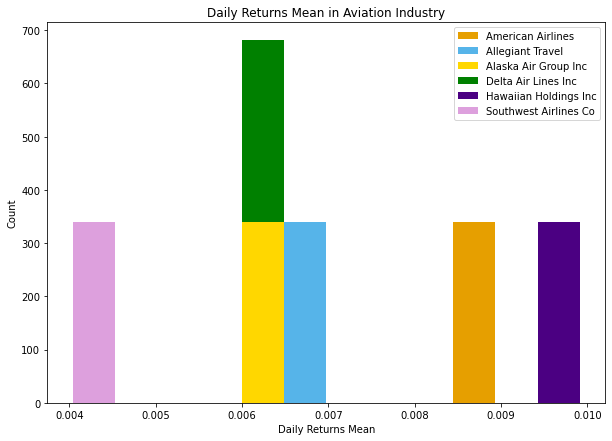

In [100]:
##1.18 Visualizing daily return mean in Stacked Histogram 
plt.figure(figsize=(10,7))

x1 = list(df_stockmkt_Aviation_R['AAL_Mean'].dropna())
x2 = list(df_stockmkt_Aviation_R['ALGT_Mean'].dropna())
x3 = list(df_stockmkt_Aviation_R['ALK_Mean'].dropna())
x4 = list(df_stockmkt_Aviation_R['DAL_Mean'].dropna())
x5 = list(df_stockmkt_Aviation_R['HA_Mean'].dropna())
x6 = list(df_stockmkt_Aviation_R['LUV_Mean'].dropna())

colors = ['#E69F00','#56B4E9','gold','green','indigo','plum']
names = ['American Airlines','Allegiant Travel','Alaska Air Group Inc','Delta Air Lines Inc','Hawaiian Holdings Inc','Southwest Airlines Co']


plt.hist([x1,x2,x3,x4,x5,x6], bins = int(180/15), density=True, stacked=True,
         color = colors, label=names)

# Plot formatting
plt.legend(loc='best')
plt.xlabel('Daily Returns Mean')
plt.ylabel('Count')
plt.title('Daily Returns Mean in Aviation Industry')

## Stock Analysis of Financial Stocks

### 2.1 Calculating Daily Return Metrics for Finance Industry

In [101]:
#2.1 Calculating Daily Return Metrics for Finance Industry

df_stockmkt['Daily_Return_BCS'] = df_stockmkt['df_BCS_Close'].pct_change()
df_stockmkt['Daily_Return_CS'] = df_stockmkt['df_CS_Close'].pct_change()
df_stockmkt['Daily_Return_DB'] = df_stockmkt['df_DB_Close'].pct_change()
df_stockmkt['Daily_Return_GS'] = df_stockmkt['df_GS_Close'].pct_change()
df_stockmkt['Daily_Return_MS'] = df_stockmkt['df_MS_Close'].pct_change()
df_stockmkt['Daily_Return_WFC'] = df_stockmkt['df_WFC_Close'].pct_change()

### 2.2 Visualizing Daily Return Metrics Using Subplots [Finance Industry]

Text(0.5, 1.0, 'Wells Fargo')

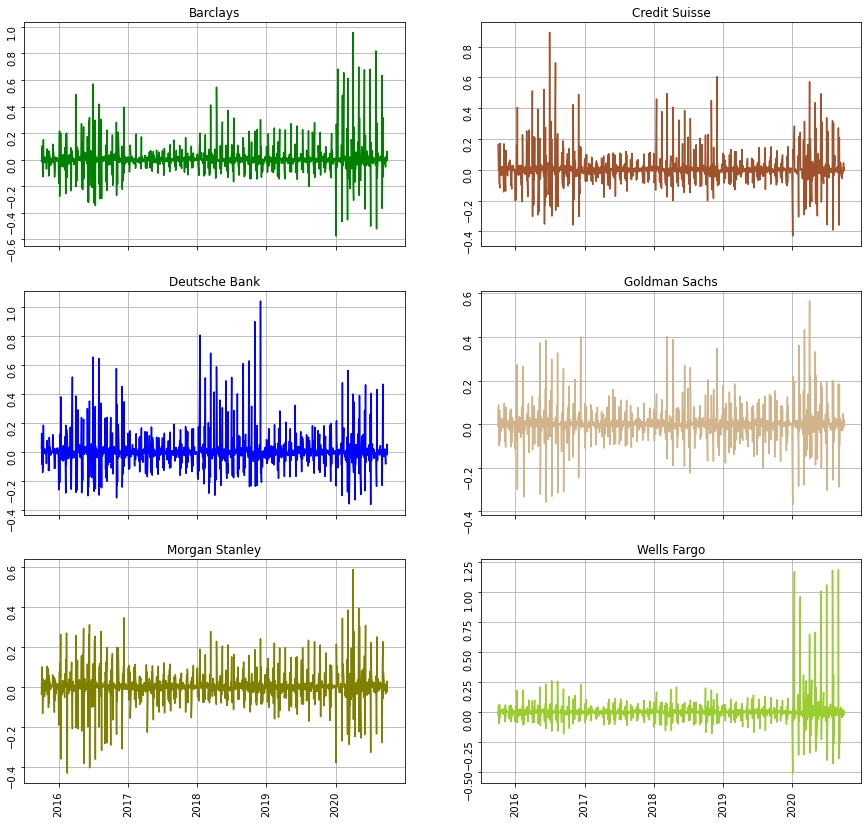

In [102]:
#2.13 Subplots on daily Return Metrics for Finance Industry
f, ax = plt.subplots(3, 2, figsize=(15,14), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_BCS'], color='green')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('Barclays');

ax[0,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_CS'], color='sienna')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Credit Suisse');

ax[1,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_DB'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Deutsche Bank');

ax[1,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_GS'], color='tan')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Goldman Sachs');

ax[2,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_MS'], color='olive')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('Morgan Stanley');

ax[2,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_WFC'], color='yellowgreen')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Wells Fargo')

### Interpretation of Subplots
 
1. Barclays best daily returns 0.9 was in 1st Qtr of 2020 and Worst daily return of -0.5 starting of 2020. 
2. Credit Suisse performed good in mid of 2016 (0.9) and Worst (-0.5) in 2020.
3. Deutshe Bank stocks performed well in Qtr4 of 2018 (1.1) and worst (-0.3) in mid of 2020.
4. Goldman Stocks performed well in mid of 2020 (0.5) and worst being (-0.3) starting of 2020
5. Morgan stanley performed well in mid of 2020 (0.6) and worst being (-0.4) at start of 2016
6. Wells-fargo stocks remained less volatile from 2016 till 2019 and had highest daily return among its peers in 2020 (1.23).

### 2.3 Merging Daily Return Df [Finance Stocks]

In [103]:
## Merge Daily Return Df [Finance Stocks]

df_stockmkt_Finance_R = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.Daily_Return_BCS,df_stockmkt.Daily_Return_CS,df_stockmkt.Daily_Return_DB,
                     df_stockmkt.Daily_Return_GS,df_stockmkt.Daily_Return_MS,df_stockmkt.Daily_Return_WFC])

df_stockmkt_Finance_R.dropna(inplace=True)
print(df_stockmkt_Finance_R.head(2))

            Daily_Return_BCS  Daily_Return_CS  Daily_Return_DB  \
Date                                                             
2015-10-03         -0.010982         0.164117         0.024663   
2015-10-04         -0.011104         0.103146         0.128370   

            Daily_Return_GS  Daily_Return_MS  Daily_Return_WFC  
Date                                                            
2015-10-03        -0.010024        -0.035398         -0.023456  
2015-10-04         0.070768         0.038991          0.019328  


### 2.4  Visualizing daily_return stocks in Boxplot  [ Finance Stocks]

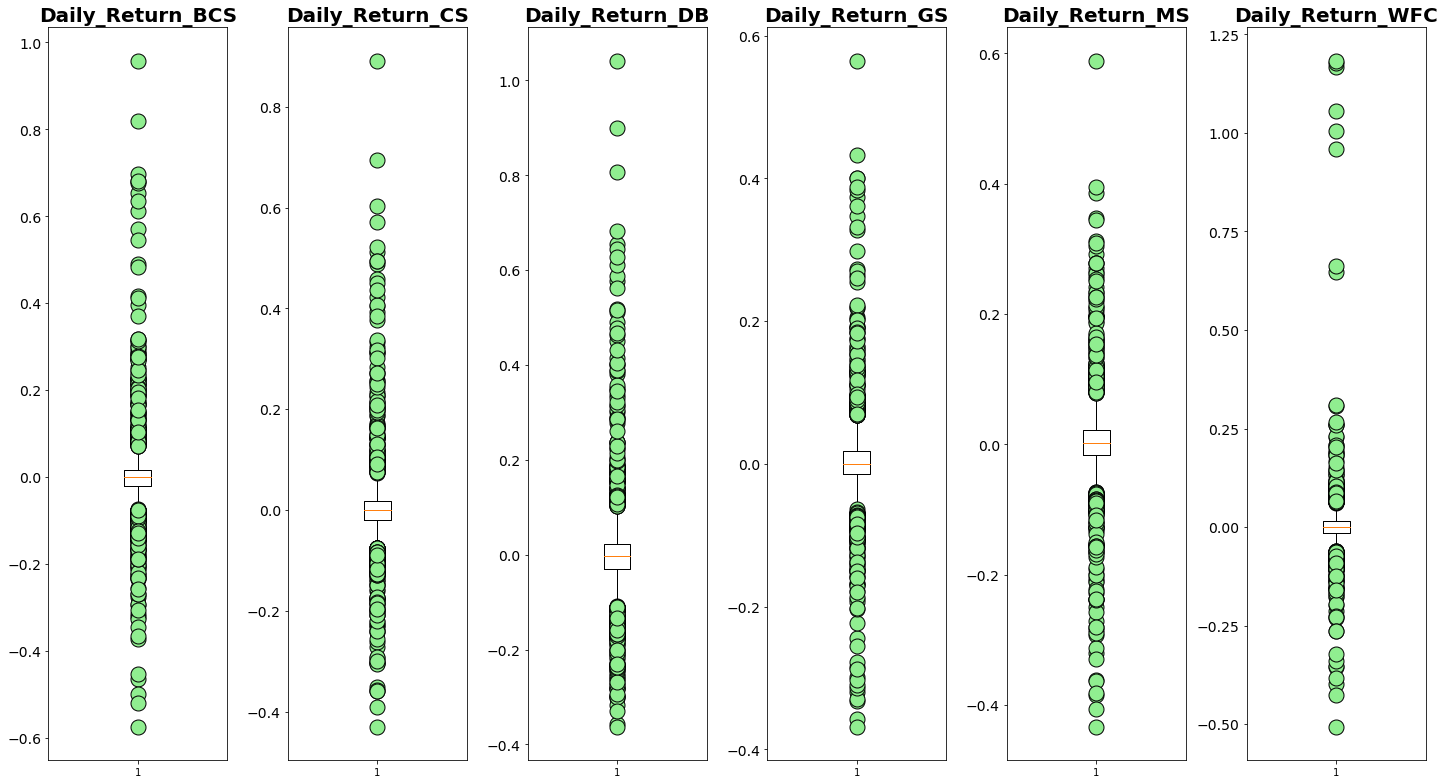

In [104]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='lightgreen', marker='o', markeredgecolor='black', markersize=15,
                  linestyle='none')

fig, axs = plt.subplots(1, len(df_stockmkt_Finance_R.columns), figsize=(20,11))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_stockmkt_Finance_R.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_stockmkt_Finance_R.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### Boxplot Interpretation 

1. Datapoints in Barclays concentrated mostly between -0.4% to 0.3% and had outliers from -0.4 onwards and some outliers 0.4 onwards till 1.0. We see that consistent daily return mostly gained 30% and lossed 40% in stock rally in period of 5 Years. 

2. Datapoints in Credit Suisse held distribution of min of -0.3% and Maximum of 0.38% and Datapoints started to show outliers from -0.36% and 0.39%. We see that consistent daily return mostly gained 38% and lost 30% in stock rally in period of 5 Years. 

3. Datapoints in Deutsche Bank held distribution of minimum -0.38% and maximum of 0.55%.Apart from this Deutsche Bank doesn't have outlier in Lower Quartile and in Upper Quartile it has outliers from 0.56%. We noticed that stock projected consistent daily return of gain 55% and Losses around 38% in stock rally for 5 Years. 

4. Datapoints in Goldman Sachs held distribution of minimum -0.39% in lower Quartile  and maximum of 0.23% in Upper Quartile. Furthermore, Goldman Sachs has rare outliers in Lower Quartile and in Upper Quartile it has outliers from 0.24%. We assume here that stock projected consistent daily return Gain of 23% and losses around 39% in stock rally for 5 Years\

5. Datapoints in Morgan Stanley held distribution of minimum -0.33% in lower Quartile  and maximum of 0.34% in Upper Quartile.Apart from this, Morgan Stanley had less outliers in Lower Quartile and in Upper Quartile it has outliers from 0.35%.We assume here that stock projected consistent daily return Gain of 34% and losses around 33% in stock rally for 5 Years.

6. Datapoints in Wells Fargo held distribution of minimum -0.25% in lower Quartile  and maximum of 0.27% in Upper Quartile.Furthermore, Wells Fargo had outliers in Lower Quartile from -0.26% and in Upper Quartile it has outliers from 0.65%.We assume here that stock projected consistent daily return Gain of 27% and losses around 25% in stock rally for 5 Years


### 2.5 Min. Value of Daily Return in Finance stocks

In [105]:
# Minimum value of daily return in Finance stock 
Min_Value_Fin = df_stockmkt_Finance_R.iloc[:,:6].min()
print(Min_Value_Fin)

Daily_Return_BCS   -0.574580
Daily_Return_CS    -0.429740
Daily_Return_DB    -0.362152
Daily_Return_GS    -0.368112
Daily_Return_MS    -0.432943
Daily_Return_WFC   -0.506134
dtype: float64


In [106]:
## Dates of Min. return of Daily return 
Min_Fin_Dates = df_stockmkt_Finance_R.iloc[:,:6].idxmin()
print(Min_Fin_Dates)

Daily_Return_BCS   2020-01-04
Daily_Return_CS    2020-01-04
Daily_Return_DB    2020-07-04
Daily_Return_GS    2020-01-04
Daily_Return_MS    2016-02-16
Daily_Return_WFC   2020-01-04
dtype: datetime64[ns]


### 2.6 Max. Value of Daily Return in Finance stock

In [ ]:
# Maximum value of daily return in Finance stock 
Max_Value_Fin = df_stockmkt_Finance_R.iloc[:,:6].max()
print(Max_Value_Fin)

In [107]:
## Dates of Min. return of Daily return 
max_Fin_Dates = df_stockmkt_Finance_R.iloc[:,:6].idxmax()
print(max_Fin_Dates)

Daily_Return_BCS   2020-04-02
Daily_Return_CS    2016-07-01
Daily_Return_DB    2018-12-01
Daily_Return_GS    2020-04-02
Daily_Return_MS    2020-04-02
Daily_Return_WFC   2020-09-01
dtype: datetime64[ns]


### 2.7 scatter_matrix for checking volatility in Finance Stock

array([[<AxesSubplot:xlabel='Daily_Return_BCS', ylabel='Daily_Return_BCS'>,
        <AxesSubplot:xlabel='Daily_Return_CS', ylabel='Daily_Return_BCS'>,
        <AxesSubplot:xlabel='Daily_Return_DB', ylabel='Daily_Return_BCS'>,
        <AxesSubplot:xlabel='Daily_Return_GS', ylabel='Daily_Return_BCS'>,
        <AxesSubplot:xlabel='Daily_Return_MS', ylabel='Daily_Return_BCS'>,
        <AxesSubplot:xlabel='Daily_Return_WFC', ylabel='Daily_Return_BCS'>],
       [<AxesSubplot:xlabel='Daily_Return_BCS', ylabel='Daily_Return_CS'>,
        <AxesSubplot:xlabel='Daily_Return_CS', ylabel='Daily_Return_CS'>,
        <AxesSubplot:xlabel='Daily_Return_DB', ylabel='Daily_Return_CS'>,
        <AxesSubplot:xlabel='Daily_Return_GS', ylabel='Daily_Return_CS'>,
        <AxesSubplot:xlabel='Daily_Return_MS', ylabel='Daily_Return_CS'>,
        <AxesSubplot:xlabel='Daily_Return_WFC', ylabel='Daily_Return_CS'>],
       [<AxesSubplot:xlabel='Daily_Return_BCS', ylabel='Daily_Return_DB'>,
        <AxesSubplot:xlab

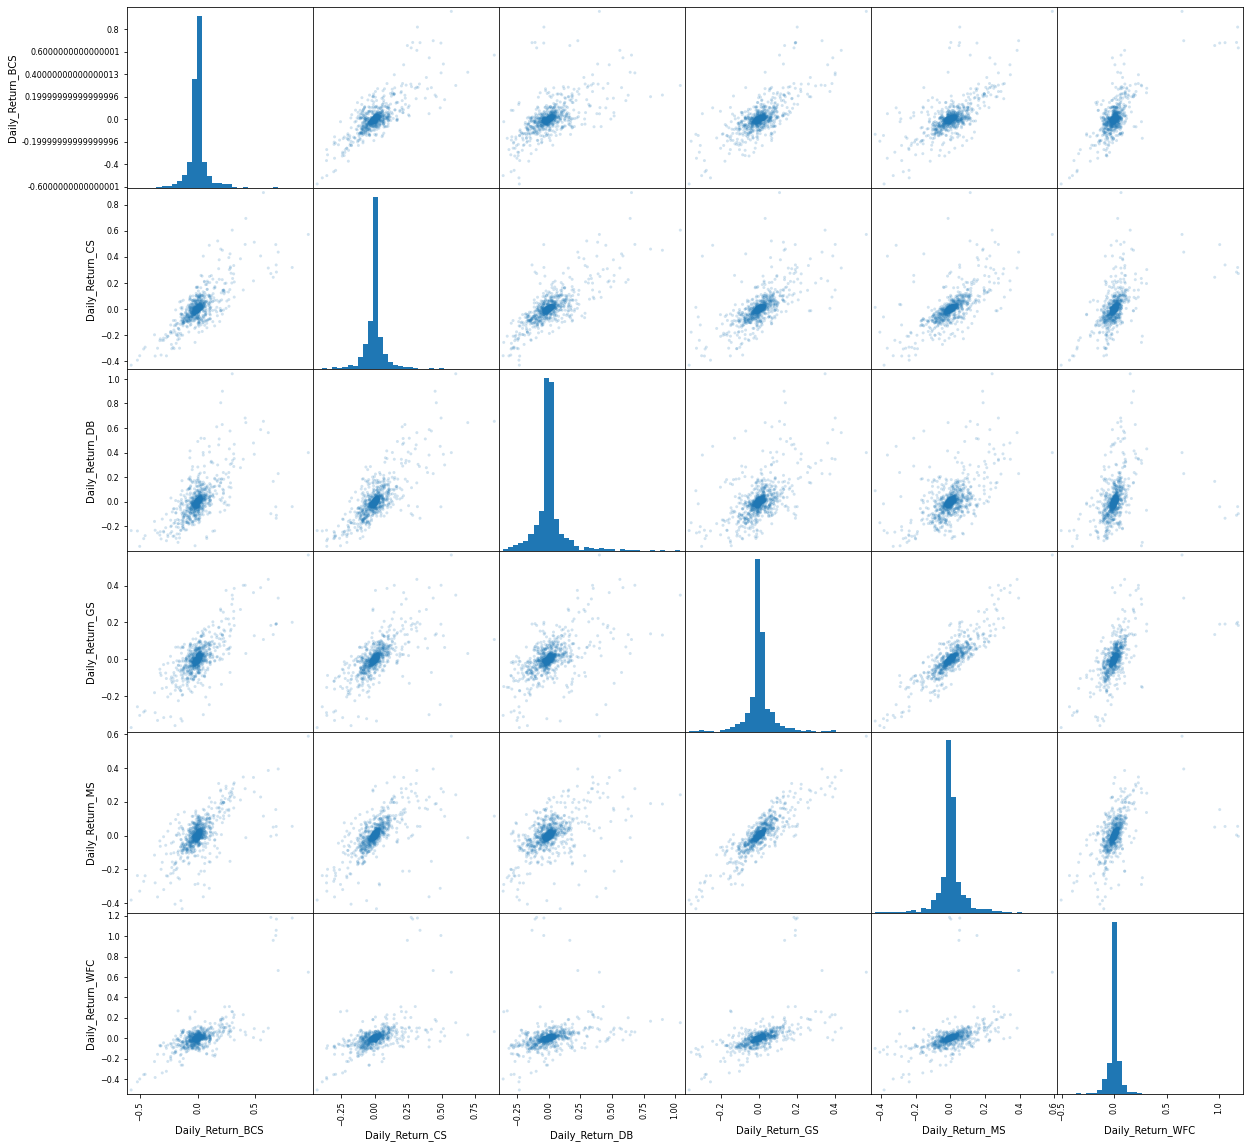

In [108]:
pd.plotting.scatter_matrix(df_stockmkt_Finance_R.iloc[:,:6], alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(20,20))

### 2.8 Correlation Analysis

In [109]:
corr_df_Fin = df_stockmkt_Finance_R.iloc[:,:6].corr(method='pearson')
corr_df_Fin

Daily_Return_BCS  Daily_Return_CS  Daily_Return_DB  \
Daily_Return_BCS          1.000000         0.769126         0.585457   
Daily_Return_CS           0.769126         1.000000         0.769781   
Daily_Return_DB           0.585457         0.769781         1.000000   
Daily_Return_GS           0.724670         0.647774         0.550385   
Daily_Return_MS           0.658671         0.629659         0.506447   
Daily_Return_WFC          0.718581         0.528975         0.292214   

                  Daily_Return_GS  Daily_Return_MS  Daily_Return_WFC  
Daily_Return_BCS         0.724670         0.658671          0.718581  
Daily_Return_CS          0.647774         0.629659          0.528975  
Daily_Return_DB          0.550385         0.506447          0.292214  
Daily_Return_GS          1.000000         0.874638          0.570658  
Daily_Return_MS          0.874638         1.000000          0.444501  
Daily_Return_WFC         0.570658         0.444501          1.000000

<Figure size 432x288 with 0 Axes>

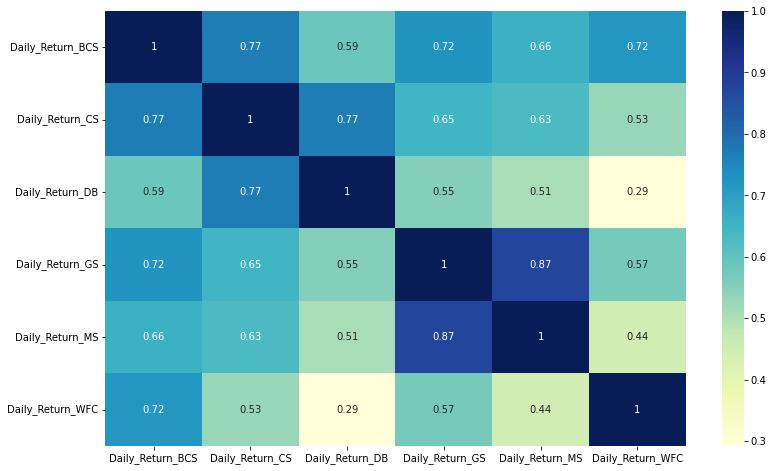

<Figure size 432x288 with 0 Axes>

In [110]:
#2.8 Plotting Heatmap 
plt.figure(figsize = (13,8))
sns.heatmap(corr_df_Fin, annot=True, cmap="YlGnBu")
plt.figure()

### Heatmap Interpretation 

1. Barclays has correlation co-effient of 1.0 which implies it strongly correlation to other stocks. we assume here that any small/big changes will shuffle change in daily return of Barclays. 
2. Credit Suisse,Goldman Sachs,Deutsche Bank, Morgan and WellsFargo also have positive correlation co-effieient whichis  considered significant. It implies medium strong relationship between stocks. 
3. Above Heatmap, also implies that when the daily returns of Barclays increase, Credit Suisse,Goldman Sachs,Deutsche Bank, Morgan and WellsFargo are also likely to increase. The reverse is also true.
4. A good investment portfolio contains diversified assets. In this context, this means we should select stocks that are not strongly correlated with each other.

### 2.9  Scatter Plot to understand Risk Return 
Quantify risk via comparision the mean of expected return with standard deviation of expected return

In [111]:
#2.9 Dropping Na
df_stockmkt_Finance_R_1 =df_stockmkt_Finance_R.dropna()

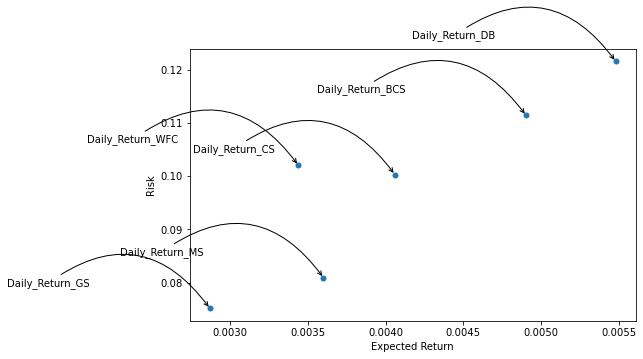

In [112]:
plt.figure(figsize=(8,5))

plt.scatter(df_stockmkt_Finance_R_1.mean(),df_stockmkt_Finance_R_1.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(df_stockmkt_Finance_R_1.columns,df_stockmkt_Finance_R_1.mean(),df_stockmkt_Finance_R_1.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))


### Interpretation of Scatter Plot

1. WFC  :- High Risk Low Return
2. DB   :- High Risk High Return
3. MS   :- Low Risk Medium Return 
4. GS   :- Low Risk Low Return 
5. CS   :- High Risk Medium Return 
6. BCS  :- High Risk High Return 

### 2.10 Standard Deviation 

In [113]:
#Standard deviation
df_stockmkt_Finance_R.std()

Daily_Return_BCS    0.111444
Daily_Return_CS     0.100321
Daily_Return_DB     0.121586
Daily_Return_GS     0.075158
Daily_Return_MS     0.080937
Daily_Return_WFC    0.102076
dtype: float64

### Interpretation of Standard Deviation (Finance Industry)

1. It was noticed that Goldman Sachs 'GS' stock has lowest standard deviation of 0.07, followed by
   Morgan Stanley 'MS' Stock 0.08 and Highest standard deviation is projected by Deutsche Bank 'DS' of 0.12 etc.
   
2. Lower the standard deviation of stock of 'GS' and 'MS' gives more predictable performance. 


### 2.11 Sharpe ratio

Sharpe ratio indicates how much risk was taken to generate the returns. Higher the value means, fund has been able to give better returns for the amount of risk taken

In [114]:
df_stockmkt_Finance_R['SR_BCS']  = df_stockmkt_Finance_R['Daily_Return_BCS'].mean() / df_stockmkt_Finance_R['Daily_Return_BCS'].std() * (252**0.5) 
df_stockmkt_Finance_R['SR_CS']  = df_stockmkt_Finance_R['Daily_Return_CS'].mean() / df_stockmkt_Finance_R['Daily_Return_CS'].std() * (252**0.5) 
df_stockmkt_Finance_R['SR_DB']  = df_stockmkt_Finance_R['Daily_Return_DB'].mean() / df_stockmkt_Finance_R['Daily_Return_DB'].std() * (252**0.5) 
df_stockmkt_Finance_R['SR_GS']  = df_stockmkt_Finance_R['Daily_Return_GS'].mean() / df_stockmkt_Finance_R['Daily_Return_GS'].std()* (252**0.5) 
df_stockmkt_Finance_R['SR_MS']  = df_stockmkt_Finance_R['Daily_Return_MS'].mean() / df_stockmkt_Finance_R['Daily_Return_MS'].std()* (252**0.5) 
df_stockmkt_Finance_R['SR_WFC'] = df_stockmkt_Finance_R['Daily_Return_WFC'].mean() / df_stockmkt_Finance_R['Daily_Return_WFC'].std()* (252**0.5) 

#####  Sharpe ratio is calculated by deriving mean of the daily returns, divided by the standard deviation of the daily returns. Also, we needs to annualize the Sharpe ratio. This can be done by 252 tradings day in year and multiply Sharpe ratio by the square root of 252 i.e. 252**0.5


In [115]:
df_F = df_stockmkt_Finance_R.iloc[0,6:]
print(df_F)

SR_BCS    0.698467
SR_CS     0.642296
SR_DB     0.715619
SR_GS     0.605848
SR_MS     0.706081
SR_WFC    0.534615
Name: 2015-10-03 00:00:00, dtype: float64


### Interpretation of Sharpe Ratio
1. Sharpe Ratio of Morgan Stanley and Deutsche Bank is 0.70 and 0.71 Respectively, which is closer to 1.Expect those, others has in range of 0.6 and least sharpe ratio is of wells Fargo 0.53. 

2. Any Sharpe Ratio above 1.00 generally means the portfolio or stock is acceptable to hold because you are receiving an excess return per unit of risk. Anything above 2.00 or 3.00 is considered very good

## Cumulative Return 
The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change. 
t is calculated using below formula
Cumulative Return = ( Pcurrent – Pinitial ) / Pinitial
 




### 2.12 Cumulative Return from Closing Prices [Finance Stocks]
The Closing stock prices are readily available to us, therefore using closing stock prices to compute cumulative returns

In [116]:
##1.13 Creating Dataframe for Cumulative Returns from Closing Prices of Stocks

df_cum_fin = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.df_BCS_Close,df_stockmkt.df_CS_Close,df_stockmkt.df_DB_Close,
                     df_stockmkt.df_GS_Close,df_stockmkt.df_MS_Close,df_stockmkt.df_WFC_Close,df_stockmkt.df_SP500_Close])

df_cum_fin.dropna(inplace=True)

In [117]:
df_cum_fin['cumu_Return_BCS'] = (df_cum_fin['df_BCS_Close'].iloc[-1] - df_cum_fin['df_BCS_Close'].iloc[0]) / df_cum_fin['df_BCS_Close'].iloc[0]
df_cum_fin['cumu_Return_CS'] = (df_cum_fin['df_CS_Close'].iloc[-1] - df_cum_fin['df_CS_Close'].iloc[0]) / df_cum_fin['df_CS_Close'].iloc[0]
df_cum_fin['cumu_Return_DB'] = (df_cum_fin['df_DB_Close'].iloc[-1] - df_cum_fin['df_DB_Close'].iloc[0]) / df_cum_fin['df_DB_Close'].iloc[0]
df_cum_fin['cumu_Return_GS'] = (df_cum_fin['df_GS_Close'].iloc[-1] - df_cum_fin['df_GS_Close'].iloc[0]) / df_cum_fin['df_GS_Close'].iloc[0]
df_cum_fin['cumu_Return_MS'] = (df_cum_fin['df_MS_Close'].iloc[-1] - df_cum_fin['df_MS_Close'].iloc[0]) / df_cum_fin['df_MS_Close'].iloc[0]
df_cum_fin['cumu_Return_WFC'] = (df_cum_fin['df_WFC_Close'].iloc[-1] - df_cum_fin['df_WFC_Close'].iloc[0]) / df_cum_fin['df_WFC_Close'].iloc[0]
df_cum_fin['cumu_Return_SP500'] = (df_stockmkt['df_SP500_Close'].iloc[-1] - df_stockmkt['df_SP500_Close'].iloc[0]) / df_stockmkt['df_SP500_Close'].iloc[0]
print(df_cum_fin.iloc[:,7:].head(2))

            cumu_Return_BCS  cumu_Return_CS  cumu_Return_DB  cumu_Return_GS  \
Date                                                                          
2015-10-02        -0.676357       -0.537784       -0.723775        0.088914   
2015-10-03        -0.676357       -0.537784       -0.723775        0.088914   

            cumu_Return_MS  cumu_Return_WFC  cumu_Return_SP500  
Date                                                            
2015-10-02        0.337113        -0.569177           0.625745  
2015-10-03        0.337113        -0.569177           0.625745  


In [118]:
## We will multiple by 100 to get the numbers as percentage change.
df_cum_fin.iloc[:,7:].max() * 100

cumu_Return_BCS     -67.635659
cumu_Return_CS      -53.778396
cumu_Return_DB      -72.377507
cumu_Return_GS        8.891419
cumu_Return_MS       33.711278
cumu_Return_WFC     -56.917720
cumu_Return_SP500    62.574500
dtype: float64

#### We observe here, Morgan stanley prices have rose 34% and  Goldman Sach prices have soared 9% in 5 year stock rally . the benchmark s&p500 indices we see, it has increased by 62% during the entire 5 Year period.

### 2.13 Cumulative Returns From  Daily Returns [Finance Stocks]
Calculating Cumulative returns from Daily returns of stocks

In [119]:
df_stockmkt_Finance_R['cumu_ret_BCS'] = ( 1 + df_stockmkt_Finance_R['Daily_Return_BCS']).cumprod() -1 
df_stockmkt_Finance_R['cumu_ret_CS'] =  (1 + df_stockmkt_Finance_R['Daily_Return_CS']).cumprod() -1
df_stockmkt_Finance_R['cumu_ret_DB'] =  (1 + df_stockmkt_Finance_R['Daily_Return_DB']).cumprod() -1
df_stockmkt_Finance_R['cumu_ret_GS'] =  (1 + df_stockmkt_Finance_R['Daily_Return_GS']).cumprod()-1
df_stockmkt_Finance_R['cumu_ret_MS'] =  (1 + df_stockmkt_Finance_R['Daily_Return_MS']).cumprod() -1 
df_stockmkt_Finance_R['cumu_ret_WFC'] =  (1 + df_stockmkt_Finance_R['Daily_Return_WFC']).cumprod() -1

In [120]:
## Duplicate Dataframe for creating the Boxplot 

df_stockmkt_Fin_CR = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt_Finance_R.cumu_ret_BCS,df_stockmkt_Finance_R.cumu_ret_CS,df_stockmkt_Finance_R.cumu_ret_DB,
                     df_stockmkt_Finance_R.cumu_ret_GS,df_stockmkt_Finance_R.cumu_ret_MS,df_stockmkt_Finance_R.cumu_ret_WFC])

df_stockmkt_Fin_CR.dropna(inplace=True)
print(df_stockmkt_Fin_CR.head(2))

            cumu_ret_BCS  cumu_ret_CS  cumu_ret_DB  cumu_ret_GS  cumu_ret_MS  \
Date                                                                           
2015-10-03     -0.010982     0.164117     0.024663    -0.010024    -0.035398   
2015-10-04     -0.021964     0.284191     0.156199     0.060035     0.002212   

            cumu_ret_WFC  
Date                      
2015-10-03     -0.023456  
2015-10-04     -0.004581  


### 2.14 Treynor's Ratio
Treynor's ratio indicates how much excess return was generated for each unit of risk taken. Higher the value means, fund has been able to give better returns for the amount of risk taken.

#### Treynor ratio = return - risk free rate / Beta

In [122]:
# Calculating Beta, Alpha, R_value, p_value, Std_error for finance stock 
df_stockmkt_Finance_R['beta_BCS'], df_stockmkt_Finance_R['alpha_BCS'], df_stockmkt_Finance_R['r_value_BCS'], df_stockmkt_Finance_R['p_value_BCS'], df_stockmkt_Finance_R['stderror_BCS']   = stats.linregress(df_stockmkt_Finance_R['Daily_Return_BCS'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Finance_R['beta_CS'], df_stockmkt_Finance_R['alpha_CS'], df_stockmkt_Finance_R['r_value_CS'], df_stockmkt_Finance_R['p_value_CS'], df_stockmkt_Finance_R['stderror_CS']   = stats.linregress(df_stockmkt_Finance_R['Daily_Return_CS'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Finance_R['beta_DB'], df_stockmkt_Finance_R['alpha_DB'], df_stockmkt_Finance_R['r_value_DB'], df_stockmkt_Finance_R['p_value_DB'], df_stockmkt_Finance_R['stderror_DB']   = stats.linregress(df_stockmkt_Finance_R['Daily_Return_DB'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Finance_R['beta_GS'], df_stockmkt_Finance_R['alpha_GS'], df_stockmkt_Finance_R['r_value_GS'], df_stockmkt_Finance_R['p_value_GS'], df_stockmkt_Finance_R['stderror_GS']   = stats.linregress(df_stockmkt_Finance_R['Daily_Return_GS'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Finance_R['beta_MS'], df_stockmkt_Finance_R['alpha_MS'], df_stockmkt_Finance_R['r_value_MS'], df_stockmkt_Finance_R['p_value_MS'], df_stockmkt_Finance_R['stderror_MS']   = stats.linregress(df_stockmkt_Finance_R['Daily_Return_MS'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Finance_R['beta_WFC'], df_stockmkt_Finance_R['alpha_WFC'], df_stockmkt_Finance_R['r_value_WFC'], df_stockmkt_Finance_R['p_value_WFC'], df_stockmkt_Finance_R['stderror_WFC']   = stats.linregress(df_stockmkt_Finance_R['Daily_Return_WFC'],df_stockmkt['Daily_Return_SP500'].dropna())

In [123]:
# Treynor ratio for finance stock
#rfr = 2
df_stockmkt_Finance_R['t_ratio_BCS'] = (df_cum_fin['cumu_Return_BCS'] - 0/100) / df_stockmkt_Finance_R['beta_BCS']
df_stockmkt_Finance_R['t_ratio_CS'] = (df_cum_fin['cumu_Return_CS'] - 0/100) / df_stockmkt_Finance_R['beta_CS']
df_stockmkt_Finance_R['t_ratio_DB'] = (df_cum_fin['cumu_Return_DB'] - 0/100) / df_stockmkt_Finance_R['beta_DB']
df_stockmkt_Finance_R['t_ratio_GS'] = (df_cum_fin['cumu_Return_GS'] - 0/100) / df_stockmkt_Finance_R['beta_GS']
df_stockmkt_Finance_R['t_ratio_MS'] = (df_cum_fin['cumu_Return_MS'] - 0/100) / df_stockmkt_Finance_R['beta_MS']
df_stockmkt_Finance_R['t_ratio_WFC'] = (df_cum_fin['cumu_Return_WFC'] - 0/100) / df_stockmkt_Finance_R['beta_WFC']

df_Fin = df_stockmkt_Finance_R.iloc[0,48:]
print(df_Fin)

### 2.15 Beta

In [125]:
#Beta of Finance stock
print("Beta for BCS is :", np.round(df_stockmkt_Finance_R['beta_BCS'],2).iloc[0])
print("Beta for CS is :", np.round(df_stockmkt_Finance_R['beta_CS'],2).iloc[0])
print("Beta for DB is :", np.round(df_stockmkt_Finance_R['beta_DB'],2).iloc[0])
print("Beta for GS is :", np.round(df_stockmkt_Finance_R['beta_GS'],2).iloc[0])
print("Beta for MS is :", np.round(df_stockmkt_Finance_R['beta_MS'],2).iloc[0])
print("Beta for WFC is :", np.round(df_stockmkt_Finance_R['beta_WFC'],2).iloc[0])

Beta for BCS is : 0.12
Beta for CS is : 0.14
Beta for DB is : 0.07
Beta for GS is : 0.34
Beta for MS is : 0.34
Beta for WFC is : 0.12


1. Beta value gives idea about how volatile fund performance has been compared to similar funds in the market. 
2. Lower beta implies the fund gives more predictable performance compared to similar funds in the market.

###  2.16 Alpha for Financial Industry Stocks
alpha helps reveal how a stock or fund might perform in relation to its peers or to the market as a whole.



#### 1.An alpha of 1.0 means the investment outperformed its benchmark index by 1%.
#### 2.An alpha of -1.0 means the investment underperformed its benchmark index by 1%. If the alpha is zero, its return matched the benchmark.

In [126]:
#alpha of Finance stock

print("Alpha for BCS is :", np.round(df_stockmkt_Finance_R['alpha_BCS'],5).iloc[0])
print("Alpha for CS is :", np.round(df_stockmkt_Finance_R['alpha_CS'],5).iloc[0])
print("Alpha for DB is :", np.round(df_stockmkt_Finance_R['alpha_DB'],5).iloc[0])
print("Alpha for GS is :", np.round(df_stockmkt_Finance_R['alpha_GS'],5).iloc[0])
print("Alpha for MS is :", np.round(df_stockmkt_Finance_R['alpha_MS'],9).iloc[0])
print("Alpha for WFC is :", np.round(df_stockmkt_Finance_R['alpha_WFC'],5).iloc[0])


Alpha for BCS is : 0.00061
Alpha for CS is : 0.00061
Alpha for DB is : 0.00082
Alpha for GS is : 0.00022
Alpha for MS is : -4.5736e-05
Alpha for WFC is : 0.00079


### 1.17 Daily Return Mean visual using Stacked Histogram 

In [127]:
##1.17 Calculating Mean of Daily Return in Finance Stocks
df_stockmkt_Finance_R['BCS_Mean'] = df_stockmkt_Finance_R['Daily_Return_BCS'].mean()
df_stockmkt_Finance_R['CS_Mean'] =  df_stockmkt_Finance_R['Daily_Return_CS'].mean()
df_stockmkt_Finance_R['DB_Mean'] =  df_stockmkt_Finance_R['Daily_Return_DB'].mean()
df_stockmkt_Finance_R['GS_Mean'] =  df_stockmkt_Finance_R['Daily_Return_GS'].mean()
df_stockmkt_Finance_R['MS_Mean'] =  df_stockmkt_Finance_R['Daily_Return_MS'].mean()
df_stockmkt_Finance_R['WFC_Mean'] =  df_stockmkt_Finance_R['Daily_Return_WFC'].mean()

Text(0.5, 1.0, 'Daily Returns Mean in Financial Industry')

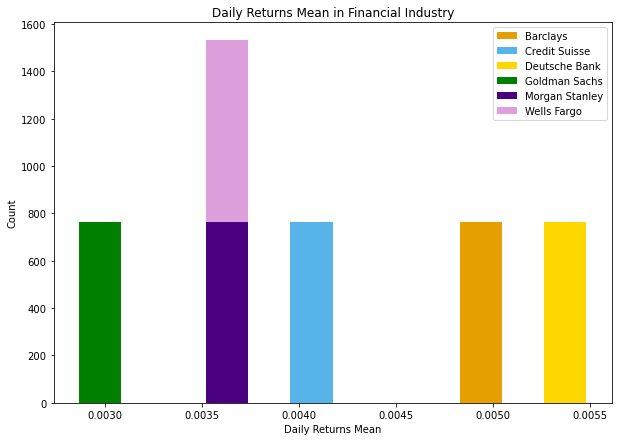

In [128]:
##1.17 Visualizing daily return mean in Stacked Histogram 
plt.figure(figsize=(10,7))

x1 = list(df_stockmkt_Finance_R['BCS_Mean'].dropna())
x2 = list(df_stockmkt_Finance_R['CS_Mean'].dropna())
x3 = list(df_stockmkt_Finance_R['DB_Mean'].dropna())
x4 = list(df_stockmkt_Finance_R['GS_Mean'].dropna())
x5 = list(df_stockmkt_Finance_R['MS_Mean'].dropna())
x6 = list(df_stockmkt_Finance_R['MS_Mean'].dropna())

colors = ['#E69F00','#56B4E9','gold','green','indigo','plum']
names = ['Barclays','Credit Suisse','Deutsche Bank','Goldman Sachs','Morgan Stanley','Wells Fargo' ]


plt.hist([x1,x2,x3,x4,x5,x6], bins = int(180/15), density=True, stacked=True,
         color = colors, label=names)

# Plot formatting
plt.legend(loc='best')
plt.xlabel('Daily Returns Mean')
plt.ylabel('Count')
plt.title('Daily Returns Mean in Financial Industry')


## Stock Analysis of  Healthcare & Pharmaceuticals Stocks 

### Tickers 
1. JNJ  -Johnson & Johnson
2. MRK  - Merck and CO inc.
3. PFE  - Pfizer inc
4. UNH  - UnitedHealthGroup Inc
5. BHC  - Bausch Health Companies inc
6. RHHBY - Roche Holding AG


### 3.1 Calculating Daily Return Metrics for Health & Pharma Industry

In [129]:
#3.1 Calculating Daily Return Metrics for Healthcare Industry
df_stockmkt['Daily_Return_JNJ'] = df_stockmkt['df_JNJ_Close'].pct_change()
df_stockmkt['Daily_Return_MRK'] = df_stockmkt['df_MRK_Close'].pct_change()
df_stockmkt['Daily_Return_PFE'] = df_stockmkt['df_PFE_Close'].pct_change()
df_stockmkt['Daily_Return_UNH'] = df_stockmkt['df_UNH_Close'].pct_change()
df_stockmkt['Daily_Return_BHC'] = df_stockmkt['df_BHC_Close'].pct_change()
df_stockmkt['Daily_Return_RHHBY'] = df_stockmkt['df_RHHBY_Close'].pct_change()

### 3.2 Visualizing Daily Return Metrics using Subplots for HealthCare & Pharmaceuticals Stocks

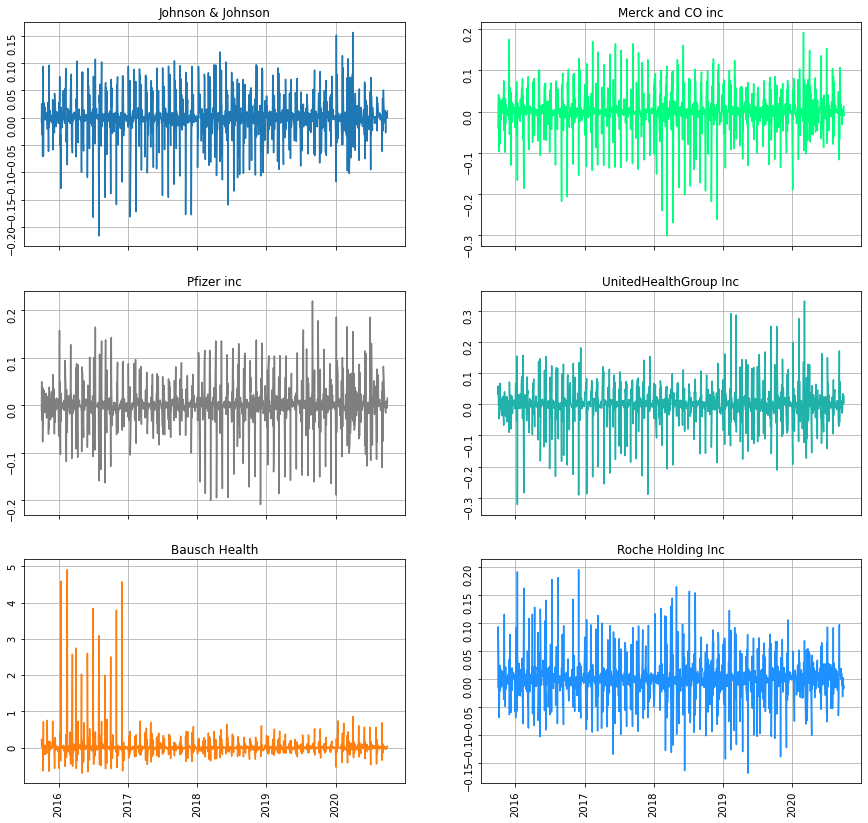

In [130]:
#3.2 Subplots on daily Return Metrics for Healthcare Industry
f, ax = plt.subplots(3, 2, figsize=(15,14), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_JNJ'], color='tab:blue')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('Johnson & Johnson');

ax[0,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_MRK'], color='springgreen')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Merck and CO inc');

ax[1,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_PFE'], color='tab:grey')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Pfizer inc');

ax[1,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_UNH'], color='lightseagreen')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('UnitedHealthGroup Inc');

ax[2,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_BHC'], color='tab:orange')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('Bausch Health');

ax[2,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_RHHBY'], color='dodgerblue')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Roche Holding Inc');

### Interpretation of Subplots
 
1. Johnson best daily returns 0.16 was in 1st Qtr of 2020 and Worst daily return of -0.22 in mid of 2016
2. Merck performed good in starting of 2020 (0.2) and Worst (-0.3) in 2018.
3. Pfizer stocks best performed  in Qtr4 in mid of 2019 (0.2) and worst (-0.2) in the end of 2019. 
4. UnitedHealthGroup best performed daily return in (1st Qtr) 2020 (0.3) and worst being (-0.3) in 2016.
5. Bausch Health best daily return performed in 2016 (4.8) and Worst daily return fetched by stock in mid of 2016 (0.7).
6. Roche Holding best daily return performed in 2017 (4th Qtr) (0.20) and worst daily return experienced in 2019 mid (-0.16)

### 3.3 Merging Daily Return Df [Heathcare & Pharmaceuticals Stocks]

In [131]:
## Merge Daily Return Df [Healthcare Stocks]

df_stockmkt_Heathcare_R = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.Daily_Return_JNJ,df_stockmkt.Daily_Return_MRK,df_stockmkt.Daily_Return_PFE,
                     df_stockmkt.Daily_Return_UNH, df_stockmkt.Daily_Return_BHC,df_stockmkt.Daily_Return_RHHBY,df_stockmkt.Daily_Return_SP500])

df_stockmkt_Heathcare_R.dropna(inplace=True)
print(df_stockmkt_Heathcare_R.head(2))

            Daily_Return_JNJ  Daily_Return_MRK  Daily_Return_PFE  \
Date                                                               
2015-10-03         -0.008171         -0.038573         -0.010835   
2015-10-04          0.025419          0.011842          0.049142   

            Daily_Return_UNH  Daily_Return_BHC  Daily_Return_RHHBY  \
Date                                                                 
2015-10-03          0.032027          0.227563           -0.014559   
2015-10-04          0.058154          0.029879            0.093259   

            Daily_Return_SP500  
Date                            
2015-10-03           -0.011810  
2015-10-04            0.028325  


### 3.4 Visualizing daily_return stocks in Boxplot  [ Healthcare & Pharmaceuticals Stocks]

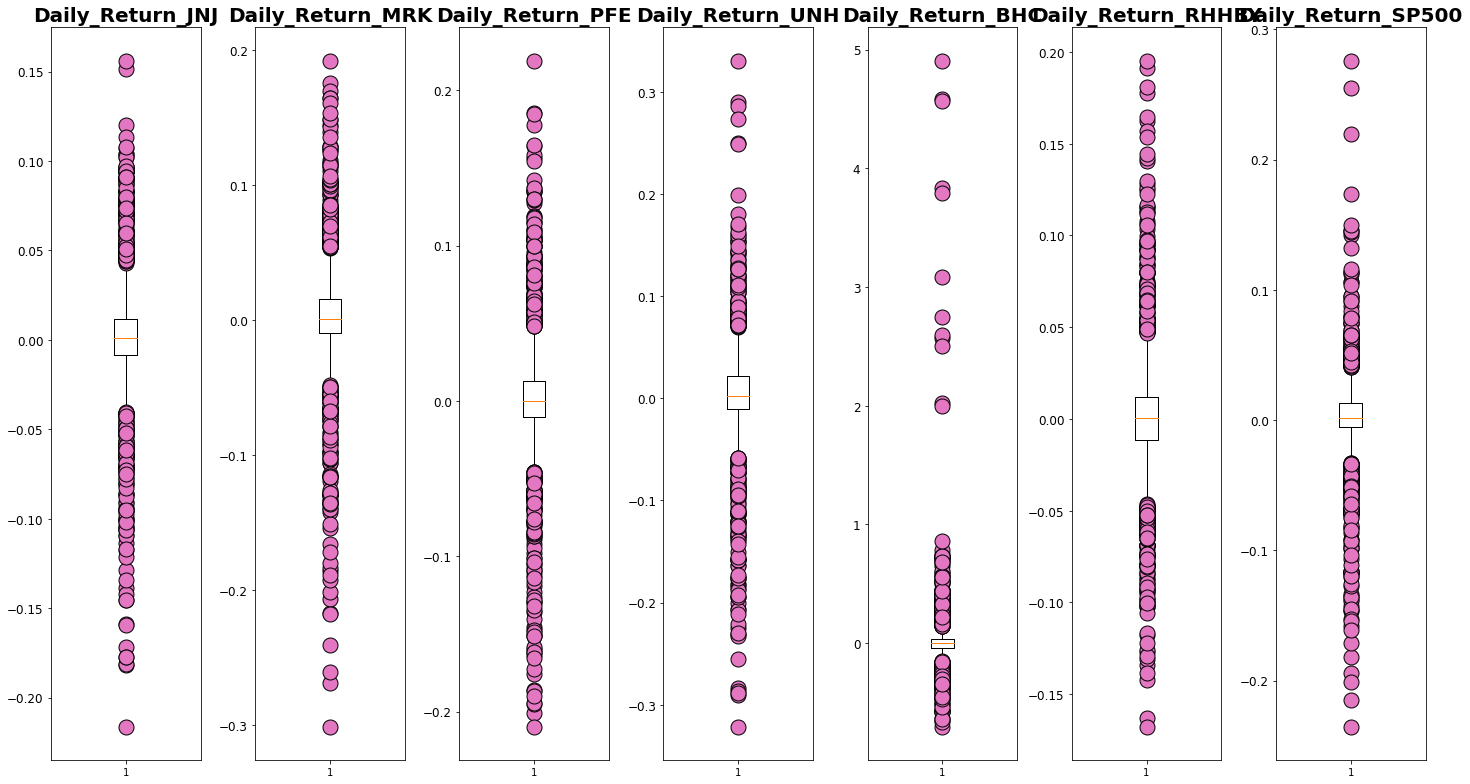

In [132]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='tab:pink', marker='o', markeredgecolor='black', markersize=15,
                  linestyle='none')

fig, axs = plt.subplots(1, len(df_stockmkt_Heathcare_R.columns), figsize=(20,11))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_stockmkt_Heathcare_R.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_stockmkt_Heathcare_R.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

#### Boxplot Interpretation 

1. Datapoints in Johnson held distribution of minimum -0.14% and maximum of 0.13%.Apart from this Johnson  have outlier in Lower Quartile from -0.16% and in Upper Quartile it has outliers from 0.14%. We noticed that stock projected consistent daily return of gain 13% and Losses around 14% in stock rally for 5 Years.

2. Datapoints in Merck held distribution of minimum -0.23% in lower Quartile  and maximum of 0.17% in Upper Quartile. Furthermore, Merck Sachs has outliers in Lower Quartile and in Upper Quartile it has rare outliers from 0.18%. We assume here that stock projected consistent daily return Gain of 17% and losses around 23% in stock rally for 5 Years.

3. Datapoints in Pfizer held distribution of minimum -0.2% in lower Quartile  and maximum of 0.17% in Upper Quartile.Apart from this, Pfizer had no outliers in Lower Quartile and in Upper Quartile it has outliers from 0.15%.

4. Datapoints in United health held distribution of minimum -0.23% in lower Quartile  and maximum of 0.2% in Upper Quartile.

5. Datapoints in Bausch Health held distribution of minimum -0% in lower Quartile and maximum of 1% in Upper Quartile. Furthermore, Bausch Health has no outliers in Lower Quartile and in Upper Quartile it has spreaded out outliers from 2 till 5.We assume here that stock projected consistent daily return Gain of 1% and losses around 1% in stock rally for 5 Years.

6. Datapoints in Roche Holding held distribution of minimum -0.11% in lower Quartile and maximum of 0.13% in Upper Quartile.Apart from this, Roche Holding  has outliers from -0.12% in Lower Quartile and in Upper Quartile it has  outliers from 0.14%. We assume here that stock projected consistent daily return Gain of 13% and accumulated losses around 11% in stock rally for 5 Years. 

### 3.5  Min. Value of Daily Return in Healthcare & Pharmaceuticals Stocks

In [133]:
# Minimum value of daily return in Healthcare stock 
Min_Value_Health = df_stockmkt_Heathcare_R.iloc[:,:8].min()
print(Min_Value_Health)

Daily_Return_JNJ     -0.216162
Daily_Return_MRK     -0.301060
Daily_Return_PFE     -0.209604
Daily_Return_UNH     -0.321300
Daily_Return_BHC     -0.702557
Daily_Return_RHHBY   -0.167577
Daily_Return_SP500   -0.235324
dtype: float64


In [134]:
## Dates of Min. return of Daily return 
Min_Health_Dates = df_stockmkt_Heathcare_R.iloc[:,:8].idxmin()
print(Min_Health_Dates)

Daily_Return_JNJ     2016-08-01
Daily_Return_MRK     2018-03-13
Daily_Return_PFE     2018-12-01
Daily_Return_UNH     2016-01-13
Daily_Return_BHC     2016-05-04
Daily_Return_RHHBY   2019-05-13
Daily_Return_SP500   2020-01-04
dtype: datetime64[ns]


### 3.6 Max. Value of Daily Return in Healthcare & Pharmaceuticals Stocks

In [136]:
# Minimum value of daily return in Healthcare stock 
Max_Value_Health = df_stockmkt_Heathcare_R.iloc[:,:8].max()
print(Max_Value_Health)

Daily_Return_JNJ      0.156105
Daily_Return_MRK      0.191876
Daily_Return_PFE      0.219128
Daily_Return_UNH      0.330559
Daily_Return_BHC      4.906796
Daily_Return_RHHBY    0.195245
Daily_Return_SP500    0.275866
dtype: float64


In [135]:
## Dates of Max. return of Daily return 
Max_Health_Dates = df_stockmkt_Heathcare_R.iloc[:,:8].idxmax()
print(Max_Health_Dates)

Daily_Return_JNJ     2020-04-02
Daily_Return_MRK     2020-03-01
Daily_Return_PFE     2019-09-01
Daily_Return_UNH     2020-03-06
Daily_Return_BHC     2016-02-16
Daily_Return_RHHBY   2016-12-01
Daily_Return_SP500   2020-04-02
dtype: datetime64[ns]


### 3.7 scatter_matrix for checking volatility in Healthcare & Pharmaceuticals Stocks

array([[<AxesSubplot:xlabel='Daily_Return_JNJ', ylabel='Daily_Return_JNJ'>,
        <AxesSubplot:xlabel='Daily_Return_MRK', ylabel='Daily_Return_JNJ'>,
        <AxesSubplot:xlabel='Daily_Return_PFE', ylabel='Daily_Return_JNJ'>,
        <AxesSubplot:xlabel='Daily_Return_UNH', ylabel='Daily_Return_JNJ'>,
        <AxesSubplot:xlabel='Daily_Return_BHC', ylabel='Daily_Return_JNJ'>,
        <AxesSubplot:xlabel='Daily_Return_RHHBY', ylabel='Daily_Return_JNJ'>,
        <AxesSubplot:xlabel='Daily_Return_SP500', ylabel='Daily_Return_JNJ'>],
       [<AxesSubplot:xlabel='Daily_Return_JNJ', ylabel='Daily_Return_MRK'>,
        <AxesSubplot:xlabel='Daily_Return_MRK', ylabel='Daily_Return_MRK'>,
        <AxesSubplot:xlabel='Daily_Return_PFE', ylabel='Daily_Return_MRK'>,
        <AxesSubplot:xlabel='Daily_Return_UNH', ylabel='Daily_Return_MRK'>,
        <AxesSubplot:xlabel='Daily_Return_BHC', ylabel='Daily_Return_MRK'>,
        <AxesSubplot:xlabel='Daily_Return_RHHBY', ylabel='Daily_Return_MRK'>,
     

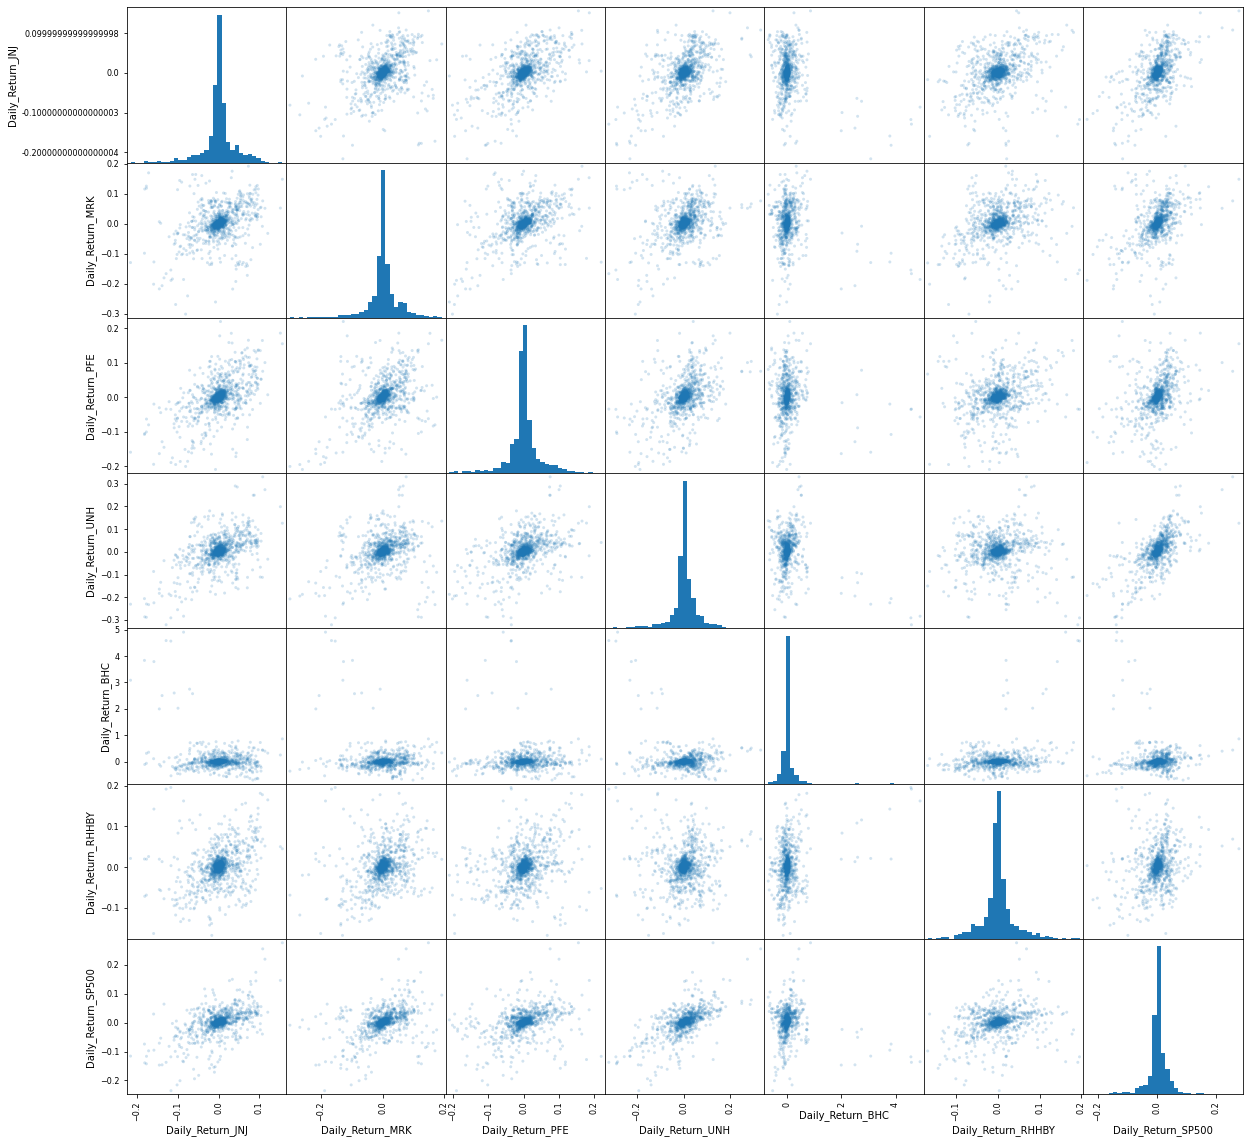

In [137]:
pd.plotting.scatter_matrix(df_stockmkt_Heathcare_R.iloc[:,:8], alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(20,20))

### 3.8 Correlation Analysis

In [138]:
corr_df_Health = df_stockmkt_Heathcare_R.iloc[:,:8].corr(method='pearson')
corr_df_Health

Daily_Return_JNJ  Daily_Return_MRK  Daily_Return_PFE  \
Daily_Return_JNJ            1.000000          0.335146          0.554972   
Daily_Return_MRK            0.335146          1.000000          0.417147   
Daily_Return_PFE            0.554972          0.417147          1.000000   
Daily_Return_UNH            0.529502          0.318809          0.455084   
Daily_Return_BHC           -0.250179         -0.154616         -0.033131   
Daily_Return_RHHBY          0.346560          0.303086          0.263544   
Daily_Return_SP500          0.555796          0.417787          0.355986   

                    Daily_Return_UNH  Daily_Return_BHC  Daily_Return_RHHBY  \
Daily_Return_JNJ            0.529502         -0.250179            0.346560   
Daily_Return_MRK            0.318809         -0.154616            0.303086   
Daily_Return_PFE            0.455084         -0.033131            0.263544   
Daily_Return_UNH            1.000000         -0.247893            0.047722   
Daily_Return_BHC           -0.247893          1.000000            0.282416   
Daily_Return_RHHBY          0.047722          0.282416            1.000000   
Daily_Return_SP500          0.654213         -0.120557            0.251172   

                    Daily_Return_SP500  
Daily_Return_JNJ              0.555796  
Daily_Return_MRK              0.417787  
Daily_Return_PFE              0.355986  
Daily_Return_UNH              0.654213  
Daily_Return_BHC             -0.120557  
Daily_Return_RHHBY            0.251172  
Daily_Return_SP500            1.000000

<Figure size 432x288 with 0 Axes>

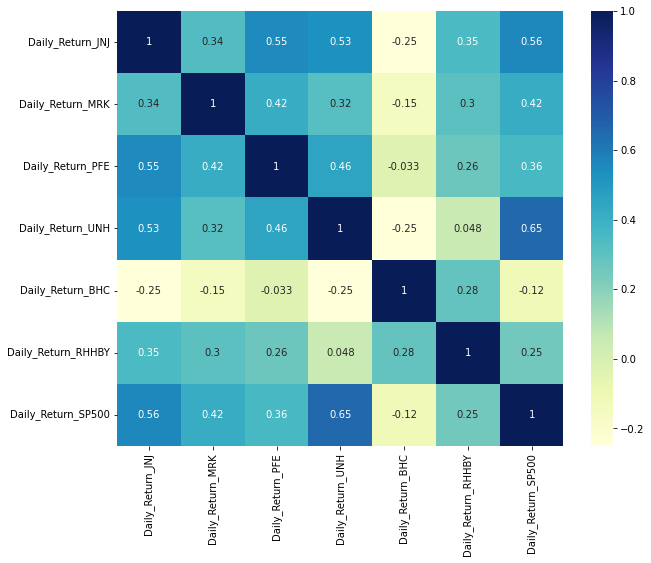

<Figure size 432x288 with 0 Axes>

In [139]:
#3.8 Plotting Heatmap 
plt.figure(figsize = (10,8))
sns.heatmap(corr_df_Health, annot=True, cmap="YlGnBu")
plt.figure()

### Heatmap Interpretation 

1. Pfizer and UnitedHealthGroup has correlation co-effient of 0.55 and 0.53 respectively, which implies it slightly correlated  to Johnson & Johnson stocks. we assume here that any minute changes will shuffle change in daily return of Pfizer and UnitedHealthGroup.

2. Merck has coefficient of correlation 0.34 which implies No correlation to Johnson, Pfizer and UnitedHealthGroup. It tells us that any positive & negative changes will not impact Merck daily returns earnings/losses. 

3. Bausch Health Companies has coefficient of correlation -0.25 which implies negative correlation to all stocks. We can assume that Bausch Health will have no impact when any of listed stocks moves up & down.

### 3.9  Scatter Plot to understand Risk Return 
Quantify risk via comparision the mean of expected return with standard deviation of expected return

In [140]:
#3.9 Dropping Na
df_stockmkt_Heathcare_R_1 =df_stockmkt_Heathcare_R.dropna()

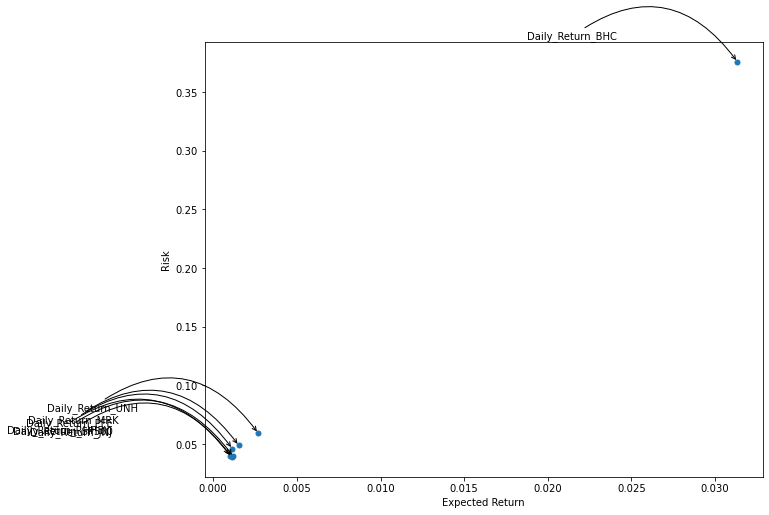

In [141]:
plt.figure(figsize=(10,8))

plt.scatter(df_stockmkt_Heathcare_R_1.mean(),df_stockmkt_Heathcare_R_1.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(df_stockmkt_Heathcare_R_1.columns,df_stockmkt_Heathcare_R_1.mean(),df_stockmkt_Heathcare_R_1.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

### Interpretation of Scatter Plot

1. UNH  :- Low Risk Low Return
2. MRK  :- Low Risk Low Return
3. PFE  :- Low Risk Low Return
4. JNJ  :- Low Risk Low Return 
5. RHHBY : Low Risk Low Return
6. BHC : High Risk High Return


### 3.10 Standard Deviation 

In [142]:
#Standard deviation
df_stockmkt_Heathcare_R.std()

Daily_Return_JNJ      0.038996
Daily_Return_MRK      0.048940
Daily_Return_PFE      0.046139
Daily_Return_UNH      0.059443
Daily_Return_BHC      0.375916
Daily_Return_RHHBY    0.040064
Daily_Return_SP500    0.039606
dtype: float64

### Interpretation of Standard Deviation (HealthCare  & Pharmaceuticals Stocks)

1. It was noticed that Johnson & Johnson 'JNJ' stock has lowest standard deviation of 0.03, followed by
   Phizer 'PFE' Stock 0.04, Merck 0.04 and Highest standard deviation is projected by BHC OF 0.37, followed by  UnitedHealth 'UNH' of 0.05 etc.
   
2. Lower the standard deviation of stock, higher the chances of giving consistent return. If we are comparing 2 stocks (lets say stock A and stock B) in the same category. If Stock A and Stock B has given    (Hypothetical) 9 %  returns in last 10 years, but Stock-A standard deviation value is lower than Stock B. As a result, Stock A will give consistent return but Stock B returns may vary.


### 3.11 Sharpe ratio

Sharpe ratio indicates how much risk was taken to generate the returns. Higher the value means, fund has been able to give better returns for the amount of risk taken

In [143]:
df_stockmkt_Heathcare_R['SR_JNJ']  = df_stockmkt_Heathcare_R['Daily_Return_JNJ'].mean() / df_stockmkt_Heathcare_R['Daily_Return_JNJ'].std() * (252**0.5) 
df_stockmkt_Heathcare_R['SR_MRK']  = df_stockmkt_Heathcare_R['Daily_Return_MRK'].mean() / df_stockmkt_Heathcare_R['Daily_Return_MRK'].std() * (252**0.5) 
df_stockmkt_Heathcare_R['SR_PFE']  = df_stockmkt_Heathcare_R['Daily_Return_PFE'].mean() / df_stockmkt_Heathcare_R['Daily_Return_PFE'].std() * (252**0.5) 
df_stockmkt_Heathcare_R['SR_UNH']  = df_stockmkt_Heathcare_R['Daily_Return_UNH'].mean() / df_stockmkt_Heathcare_R['Daily_Return_UNH'].std()* (252**0.5)
df_stockmkt_Heathcare_R['SR_BHC']  = df_stockmkt_Heathcare_R['Daily_Return_BHC'].mean() / df_stockmkt_Heathcare_R['Daily_Return_BHC'].std()* (252**0.5)
df_stockmkt_Heathcare_R['SR_RHHBY']  = df_stockmkt_Heathcare_R['Daily_Return_RHHBY'].mean() / df_stockmkt_Heathcare_R['Daily_Return_RHHBY'].std()* (252**0.5)

Sharpe ratio is calculated by deriving mean of the daily returns, divided by the standard deviation of the daily returns. Also, we needs to annualize the Sharpe ratio. This can be done by 252 tradings day in year and multiply Sharpe ratio by the square root of 252 i.e. 252**0.5

In [144]:
df_H = df_stockmkt_Heathcare_R.iloc[0,7:]
print(df_H)

SR_JNJ      0.445921
SR_MRK      0.493408
SR_PFE      0.391946
SR_UNH      0.716066
SR_BHC      1.323001
SR_RHHBY    0.399160
Name: 2015-10-03 00:00:00, dtype: float64


### Interpretation of Sharpe Ratio
1. Highest Sharpe Ratio is projected by Bausch Health Companies of 1.32 which is beyond 1 and UnitedHeathgroup is 0.71 which is closer to 1. Furthermore, Phizer, Merck and Johnson & Johnson has sharpe ratio of 0.39, 0.49 and 0.44 respectively.

2. Any Sharpe Ratio above 1.00 generally means the portfolio or stock is acceptable to hold because you are receiving an excess return per unit of risk. Anything above 2.00 or 3.00 is considered very good

## Cumulative Return 
The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change. 
t is calculated using below formula
Cumulative Return = ( Pcurrent – Pinitial ) / Pinitial

### 3.12 Cumulative Return from Closing Prices [Healthcare  & Pharmaceuticals Stocks]
The Closing stock prices are readily available to us, therefore using closing stock prices to compute cumulative returns

In [145]:
##3.12 Creating Dataframe for Cumulative Returns from Closing Prices of Stocks

df_cum_Heal = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.df_JNJ_Close,df_stockmkt.df_MRK_Close,df_stockmkt.df_PFE_Close,
                     df_stockmkt.df_UNH_Close, df_stockmkt.Daily_Return_BHC, df_stockmkt.Daily_Return_RHHBY,df_stockmkt.df_SP500_Close])

df_cum_Heal.dropna(inplace=True)

In [146]:
df_cum_Heal['cumu_Return_JNJ'] = (df_cum_Heal['df_JNJ_Close'].iloc[-1] - df_cum_Heal['df_JNJ_Close'].iloc[0]) / df_cum_Heal['df_JNJ_Close'].iloc[0]
df_cum_Heal['cumu_Return_MRK'] = (df_cum_Heal['df_MRK_Close'].iloc[-1] - df_cum_Heal['df_MRK_Close'].iloc[0]) / df_cum_Heal['df_MRK_Close'].iloc[0]
df_cum_Heal['cumu_Return_PFE'] = (df_cum_Heal['df_PFE_Close'].iloc[-1] - df_cum_Heal['df_PFE_Close'].iloc[0]) / df_cum_Heal['df_PFE_Close'].iloc[0]
df_cum_Heal['cumu_Return_UNH'] = (df_cum_Heal['df_UNH_Close'].iloc[-1] - df_cum_Heal['df_UNH_Close'].iloc[0]) / df_cum_Heal['df_UNH_Close'].iloc[0]
df_cum_Heal['cumu_Return_BHC'] = (df_cum_Heal['Daily_Return_BHC'].iloc[-1] - df_cum_Heal['Daily_Return_BHC'].iloc[0]) / df_cum_Heal['Daily_Return_BHC'].iloc[0]
df_cum_Heal['cumu_Return_RHHBY'] = (df_cum_Heal['Daily_Return_RHHBY'].iloc[-1] - df_cum_Heal['Daily_Return_RHHBY'].iloc[0]) / df_cum_Heal['Daily_Return_RHHBY'].iloc[0]
df_cum_Heal['cumu_Return_SP500'] = (df_stockmkt['df_SP500_Close'].iloc[-1] - df_stockmkt['Daily_Return_SP500'].iloc[0]) / df_stockmkt['df_SP500_Close'].iloc[0]
print(df_cum_Heal.iloc[:,7:].head(2))

            cumu_Return_JNJ  cumu_Return_MRK  cumu_Return_PFE  \
Date                                                            
2015-10-03          0.49583         0.466066         0.086442   
2015-10-04          0.49583         0.466066         0.086442   

            cumu_Return_UNH  cumu_Return_BHC  cumu_Return_RHHBY  \
Date                                                              
2015-10-03         1.772275        -0.805088          -0.113098   
2015-10-04         1.772275        -0.805088          -0.113098   

            cumu_Return_SP500  
Date                           
2015-10-03                NaN  
2015-10-04                NaN  


In [147]:
## We will multiple by 100 to get the numbers as percentage change.
df_cum_Heal.iloc[:,7:].max() * 100

cumu_Return_JNJ       49.583047
cumu_Return_MRK       46.606564
cumu_Return_PFE        8.644174
cumu_Return_UNH      177.227451
cumu_Return_BHC      -80.508804
cumu_Return_RHHBY    -11.309788
cumu_Return_SP500           NaN
dtype: float64

#### We observe here, UnitedHealthGroup  prices have rose 177%. We also note here that, Johnson & Merck prices soared 49% and 46% in 5 Year stock rally, also Pfizer stock gained only 8% which is lowest among the peer stock. In comparision with  the benchmark s&p500 indices we see increase by 62% during the entire 5 Year period. 
#### On the negative side, Bausch Health & Roche Holding both Pharmaceuticals incurred losses during 5 Year stock run

### 2.13 Cumulative Returns From  Daily Returns [Healthcare Stocks]

##### Calculating Cumulative returns from Daily returns of stocks

In [148]:
df_stockmkt_Heathcare_R['cumu_ret_JNJ'] = ( 1 + df_stockmkt_Heathcare_R['Daily_Return_JNJ']).cumprod() -1 
df_stockmkt_Heathcare_R['cumu_ret_MRK'] =  (1 + df_stockmkt_Heathcare_R['Daily_Return_MRK']).cumprod() -1
df_stockmkt_Heathcare_R['cumu_ret_PFE'] =  (1 + df_stockmkt_Heathcare_R['Daily_Return_PFE']).cumprod() -1
df_stockmkt_Heathcare_R['cumu_ret_UNH'] =  (1 + df_stockmkt_Heathcare_R['Daily_Return_UNH']).cumprod()-1
df_stockmkt_Heathcare_R['cumu_ret_BHC'] =  (1 + df_stockmkt_Heathcare_R['Daily_Return_BHC']).cumprod()-1
df_stockmkt_Heathcare_R['cumu_ret_RHHBY'] =  (1 + df_stockmkt_Heathcare_R['Daily_Return_RHHBY']).cumprod()-1
df_stockmkt_Heathcare_R['cumu_ret_SP500'] =  (1 + df_stockmkt_Heathcare_R['Daily_Return_SP500']).cumprod() -1

In [149]:
## creating Dataframe for creating the Boxplot 

df_stockmkt_Health_CR = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt_Heathcare_R.cumu_ret_JNJ,df_stockmkt_Heathcare_R.cumu_ret_MRK,df_stockmkt_Heathcare_R.cumu_ret_PFE,
                     df_stockmkt_Heathcare_R.cumu_ret_UNH, df_stockmkt_Heathcare_R.cumu_ret_BHC,df_stockmkt_Heathcare_R.cumu_ret_RHHBY,df_stockmkt_Heathcare_R.cumu_ret_SP500])

df_stockmkt_Health_CR.dropna(inplace=True)
print(df_stockmkt_Health_CR.head(2))

            cumu_ret_JNJ  cumu_ret_MRK  cumu_ret_PFE  cumu_ret_UNH  \
Date                                                                 
2015-10-03     -0.008171     -0.038573     -0.010835      0.032027   
2015-10-04      0.017040     -0.027188      0.037774      0.092044   

            cumu_ret_BHC  cumu_ret_RHHBY  cumu_ret_SP500  
Date                                                      
2015-10-03      0.227563       -0.014559        -0.01181  
2015-10-04      0.264242        0.077343         0.01618  


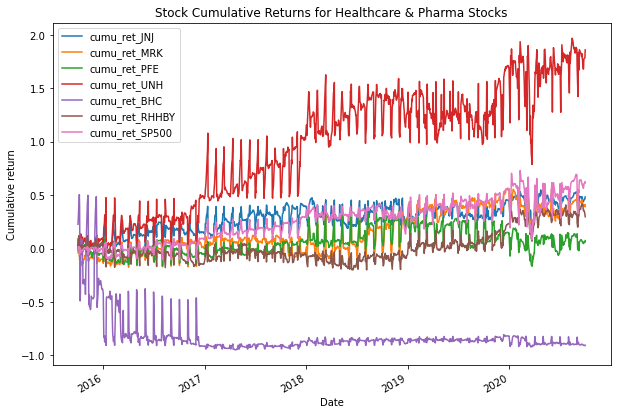

In [150]:
#3.13 Visualizing Stock Cumulative returns (derived from daily returns)
%matplotlib inline
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_stockmkt_Health_CR.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Stock Cumulative Returns for Healthcare & Pharma Stocks')
plt.show()

### 3.14 Treynor's Ratio
Treynor's ratio indicates how much excess return was generated for each unit of risk taken. Higher the value means, fund has been able to give better returns for the amount of risk taken.

#### Treynor ratio = return - risk free rate / Beta

In [151]:
# Calculating Beta, Alpha, R_value, p_value, Std_error for finance stock 
df_stockmkt_Heathcare_R['beta_JNJ'], df_stockmkt_Heathcare_R['alpha_JNJ'], df_stockmkt_Heathcare_R['r_value_JNJ'], df_stockmkt_Heathcare_R['p_value_JNJ'], df_stockmkt_Heathcare_R['stderror_JNJ']   = stats.linregress(df_stockmkt_Heathcare_R['Daily_Return_JNJ'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Heathcare_R['beta_MRK'], df_stockmkt_Heathcare_R['alpha_MRK'], df_stockmkt_Heathcare_R['r_value_MRK'], df_stockmkt_Heathcare_R['p_value_MRK'], df_stockmkt_Heathcare_R['stderror_MRK']   = stats.linregress(df_stockmkt_Heathcare_R['Daily_Return_MRK'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Heathcare_R['beta_PFE'], df_stockmkt_Heathcare_R['alpha_PFE'], df_stockmkt_Heathcare_R['r_value_PFE'], df_stockmkt_Heathcare_R['p_value_PFE'], df_stockmkt_Heathcare_R['stderror_PFE']   = stats.linregress(df_stockmkt_Heathcare_R['Daily_Return_PFE'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Heathcare_R['beta_UNH'], df_stockmkt_Heathcare_R['alpha_UNH'], df_stockmkt_Heathcare_R['r_value_UNH'], df_stockmkt_Heathcare_R['p_value_UNH'], df_stockmkt_Heathcare_R['stderror_UNH']   = stats.linregress(df_stockmkt_Heathcare_R['Daily_Return_UNH'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Heathcare_R['beta_BHC'], df_stockmkt_Heathcare_R['alpha_BHC'], df_stockmkt_Heathcare_R['r_value_BHC'], df_stockmkt_Heathcare_R['p_value_BHC'], df_stockmkt_Heathcare_R['stderror_BHC']   = stats.linregress(df_stockmkt_Heathcare_R['Daily_Return_BHC'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_Heathcare_R['beta_RHHBY'], df_stockmkt_Heathcare_R['alpha_RHHBY'], df_stockmkt_Heathcare_R['r_value_RHHBY'], df_stockmkt_Heathcare_R['p_value_RHHBY'], df_stockmkt_Heathcare_R['stderror_RHHBY']   = stats.linregress(df_stockmkt_Heathcare_R['Daily_Return_RHHBY'],df_stockmkt['Daily_Return_SP500'].dropna())

In [152]:
# Treynor ratio for finance stock
#rfr = 2
df_stockmkt_Heathcare_R['t_ratio_JNJ'] = (df_cum_Heal['cumu_Return_JNJ'] - 0/100) / df_stockmkt_Heathcare_R['beta_JNJ']
df_stockmkt_Heathcare_R['t_ratio_MRK'] = (df_cum_Heal['cumu_Return_MRK'] - 0/100) / df_stockmkt_Heathcare_R['beta_MRK']
df_stockmkt_Heathcare_R['t_ratio_PFE'] = (df_cum_Heal['cumu_Return_PFE'] - 0/100) / df_stockmkt_Heathcare_R['beta_PFE']
df_stockmkt_Heathcare_R['t_ratio_UNH'] = (df_cum_Heal['cumu_Return_UNH'] - 0/100) / df_stockmkt_Heathcare_R['beta_UNH']
df_stockmkt_Heathcare_R['t_ratio_BHC'] = (df_cum_Heal['cumu_Return_BHC'] - 0/100) / df_stockmkt_Heathcare_R['beta_BHC']
df_stockmkt_Heathcare_R['t_ratio_RHHBY'] = (df_cum_Heal['cumu_Return_RHHBY'] - 0/100) / df_stockmkt_Heathcare_R['beta_RHHBY']

In [153]:
df_HEAL = df_stockmkt_Heathcare_R.iloc[0,-6:]
print(df_HEAL)

t_ratio_JNJ       0.878370
t_ratio_MRK       1.378460
t_ratio_PFE       0.282877
t_ratio_UNH       4.065877
t_ratio_BHC      63.383883
t_ratio_RHHBY    -0.455484
Name: 2015-10-03 00:00:00, dtype: float64


### 3.15 Beta

1. Beta value gives idea about how volatile fund performance has been compared to similar funds in the market. 
2. Lower beta implies the fund gives more predictable performance compared to similar funds in the market.

In [154]:
#Beta of Healthcare stock
print("Beta for JNJ is :", np.round(df_stockmkt_Heathcare_R['beta_JNJ'],2).iloc[0])
print("Beta for MRK is :", np.round(df_stockmkt_Heathcare_R['beta_MRK'],2).iloc[0])
print("Beta for PFE is :", np.round(df_stockmkt_Heathcare_R['beta_PFE'],2).iloc[0])
print("Beta for UNH is :", np.round(df_stockmkt_Heathcare_R['beta_UNH'],2).iloc[0])
print("Beta for BHC is :", np.round(df_stockmkt_Heathcare_R['beta_BHC'],2).iloc[0])
print("Beta for RHHBY is :", np.round(df_stockmkt_Heathcare_R['beta_RHHBY'],2).iloc[0])

Beta for JNJ is : 0.56
Beta for MRK is : 0.34
Beta for PFE is : 0.31
Beta for UNH is : 0.44
Beta for BHC is : -0.01
Beta for RHHBY is : 0.25


###  3.16 Alpha for Healthcare Industry Stocks
1. alpha helps reveal how a stock or fund might perform in relation to its peers or to the market as a whole.
2. An alpha of 1.0 means the investment outperformed its benchmark index by 1%.
3. An alpha of -1.0 means the investment underperformed its benchmark index by 1%. If the alpha is zero, its return matched the benchmark.


In [155]:
#alpha of Healthcare stock
print("alpha for JNJ is :", np.round(df_stockmkt_Heathcare_R['alpha_JNJ'],5).iloc[0])
print("alpha for MRK is :", np.round(df_stockmkt_Heathcare_R['alpha_MRK'],5).iloc[0])
print("alpha for PFE is :", np.round(df_stockmkt_Heathcare_R['alpha_PFE'],5).iloc[0])
print("alpha for UNH is :", np.round(df_stockmkt_Heathcare_R['alpha_UNH'],5).iloc[0])
print("alpha for BHC is :", np.round(df_stockmkt_Heathcare_R['alpha_BHC'],5).iloc[0])
print("alpha for RHHBY is :", np.round(df_stockmkt_Heathcare_R['alpha_RHHBY'],5).iloc[0])

alpha for JNJ is : 0.00057
alpha for MRK is : 0.00068
alpha for PFE is : 0.00084
alpha for UNH is : 2e-05
alpha for BHC is : 0.00159
alpha for RHHBY is : 0.00094


### 3.17 Daily Return Mean visual using Stacked Histogram 

In [157]:
##1.17 Calculating Mean of Daily Return in Healthcare & Pharma Stocks
df_stockmkt_Heathcare_R['JNJ_Mean'] = df_stockmkt_Heathcare_R['Daily_Return_JNJ'].mean()
df_stockmkt_Heathcare_R['MRK_Mean'] =  df_stockmkt_Heathcare_R['Daily_Return_MRK'].mean()
df_stockmkt_Heathcare_R['PFE_Mean'] =  df_stockmkt_Heathcare_R['Daily_Return_PFE'].mean()
df_stockmkt_Heathcare_R['UNH_Mean'] =  df_stockmkt_Heathcare_R['Daily_Return_UNH'].mean()
df_stockmkt_Heathcare_R['BHC_Mean'] =  df_stockmkt_Heathcare_R['Daily_Return_BHC'].mean()
df_stockmkt_Heathcare_R['RHHBY_Mean'] =  df_stockmkt_Heathcare_R['Daily_Return_RHHBY'].mean()
df_stockmkt_Heathcare_R['SP500_Mean'] =  df_stockmkt_Heathcare_R['Daily_Return_SP500'].mean()

Text(0.5, 1.0, 'Daily Returns Mean in Healthcare & Pharma Industry')

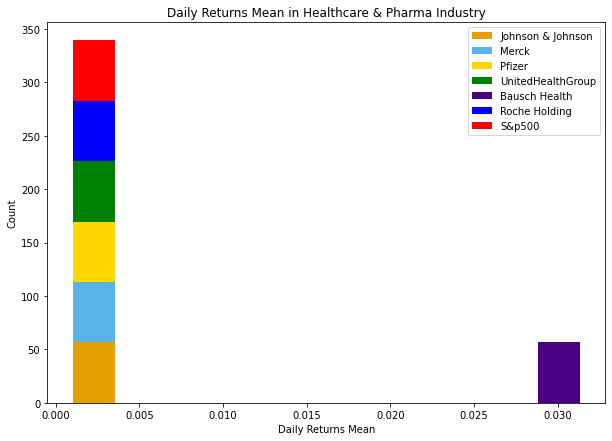

In [158]:
##1.17 Visualizing daily return mean in Stacked Histogram 
plt.figure(figsize=(10,7))

x1 = list(df_stockmkt_Heathcare_R['JNJ_Mean'].dropna())
x2 = list(df_stockmkt_Heathcare_R['MRK_Mean'].dropna())
x3 = list(df_stockmkt_Heathcare_R['PFE_Mean'].dropna())
x4 = list(df_stockmkt_Heathcare_R['UNH_Mean'].dropna())
x5 = list(df_stockmkt_Heathcare_R['BHC_Mean'].dropna())
x6 = list(df_stockmkt_Heathcare_R['RHHBY_Mean'].dropna())
x7 = list(df_stockmkt_Heathcare_R['SP500_Mean'].dropna())


colors = ['#E69F00','#56B4E9','gold','green','indigo', 'blue', 'red']
names = ['Johnson & Johnson','Merck','Pfizer ','UnitedHealthGroup','Bausch Health','Roche Holding ','S&p500']


plt.hist([x1,x2,x3,x4,x5,x6,x7], bins = int(180/15), density=True, stacked=True,
         color = colors, label=names)

# Plot formatting
plt.legend(loc='best')
plt.xlabel('Daily Returns Mean')
plt.ylabel('Count')
plt.title('Daily Returns Mean in Healthcare & Pharma Industry')

## Stock Analysis of Technology Industry

### 4.1 Calculating Daily Return Metrics for Technology Industry

In [159]:
#4.1 Calculating Daily Return Metrics for Finance Industry
df_stockmkt['Daily_Return_AAPL'] = df_stockmkt['df_AAPL_Close'].pct_change()
df_stockmkt['Daily_Return_AMZN'] = df_stockmkt['df_AMZN_Close'].pct_change()
df_stockmkt['Daily_Return_FB'] = df_stockmkt['df_FB_Close'].pct_change()
df_stockmkt['Daily_Return_GOOG'] = df_stockmkt['df_GOOG_Close'].pct_change()
df_stockmkt['Daily_Return_IBM'] = df_stockmkt['df_IBM_Close'].pct_change()
df_stockmkt['Daily_Return_MSFT'] = df_stockmkt['df_MSFT_Close'].pct_change()

### 4.2 Visualizing Daily Return Metrics Using Subplots [Technology Industry]

Text(0.5, 1.0, 'Microsoft')

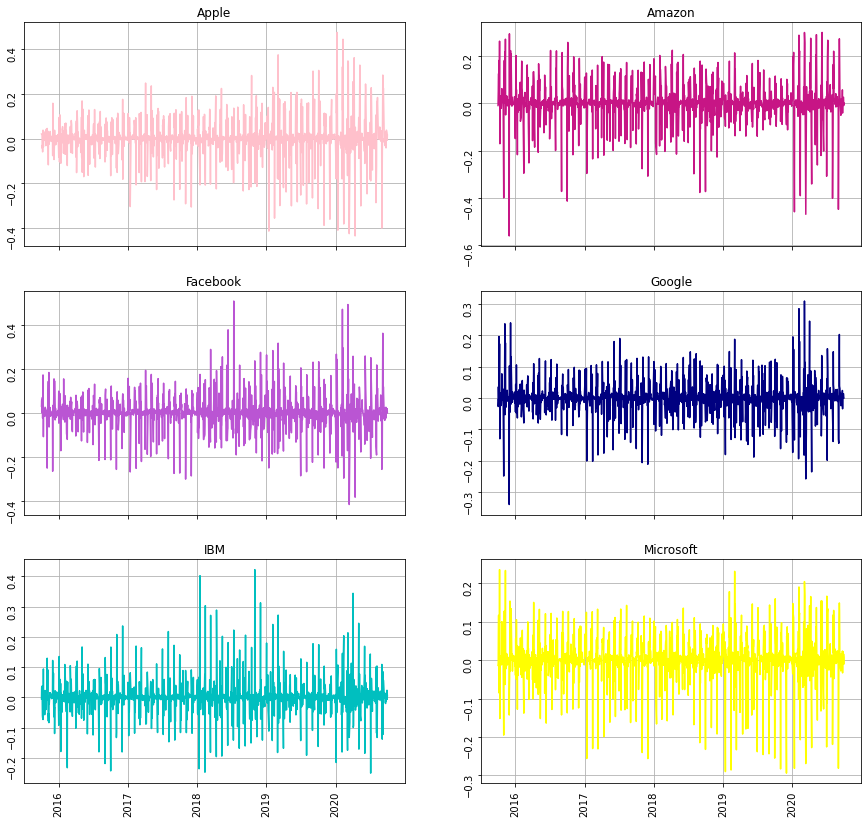

In [160]:
#2.13 Subplots on daily Return Metrics for Tech Industry
f, ax = plt.subplots(3, 2, figsize=(15,14), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_AAPL'], color='pink')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('Apple');

ax[0,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_AMZN'], color='mediumvioletred')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Amazon');

ax[1,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_FB'], color='mediumorchid')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Facebook');

ax[1,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_GOOG'], color='navy')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Google');

ax[2,0].plot(df_stockmkt.index, df_stockmkt['Daily_Return_IBM'], color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('IBM');

ax[2,1].plot(df_stockmkt.index, df_stockmkt['Daily_Return_MSFT'], color='yellow')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Microsoft')

### Interpretation of Subplots
 
1. Apple best daily returns 0.5 was in 1st Qtr of 2020 and Worst daily return of -0.4 mid of 2020. 
2. Amazon performed good in mid of 2018 (0.5) and worst (-0.6) in 2015.
3. Facebook stocks performed well in mid of 2018 (0.5) and worst (-0.4) in starting of 2020.
4. Google Stocks performed well in starting of 2020 (0.5) and worst being (-0.3) starting of end of 2015.
5. IBM stocks performed well in end of 2018 (0.4) and worst being (-0.2) in mid of 2020.

### 4.3 Merging Daily Return Df [Tech Stocks]

In [161]:
## Merge Daily Return Df [Finance Stocks]

df_stockmkt_tech_R = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.Daily_Return_AAPL,df_stockmkt.Daily_Return_AMZN,df_stockmkt.Daily_Return_FB,
                     df_stockmkt.Daily_Return_GOOG,df_stockmkt.Daily_Return_IBM,df_stockmkt.Daily_Return_MSFT,df_stockmkt.Daily_Return_SP500 ])

df_stockmkt_tech_R.dropna(inplace=True)
print(df_stockmkt_tech_R.head(2))

            Daily_Return_AAPL  Daily_Return_AMZN  Daily_Return_FB  \
Date                                                                
2015-10-03           0.020407          -0.009357         0.031387   
2015-10-04           0.020802           0.035561         0.057898   

            Daily_Return_GOOG  Daily_Return_IBM  Daily_Return_MSFT  \
Date                                                                 
2015-10-03           0.033654         -0.004730          -0.013380   
2015-10-04          -0.027027          0.032001          -0.007376   

            Daily_Return_SP500  
Date                            
2015-10-03           -0.011810  
2015-10-04            0.028325  


### 4.4  Visualizing daily_return stocks in Boxplot  [ Tech Stock]

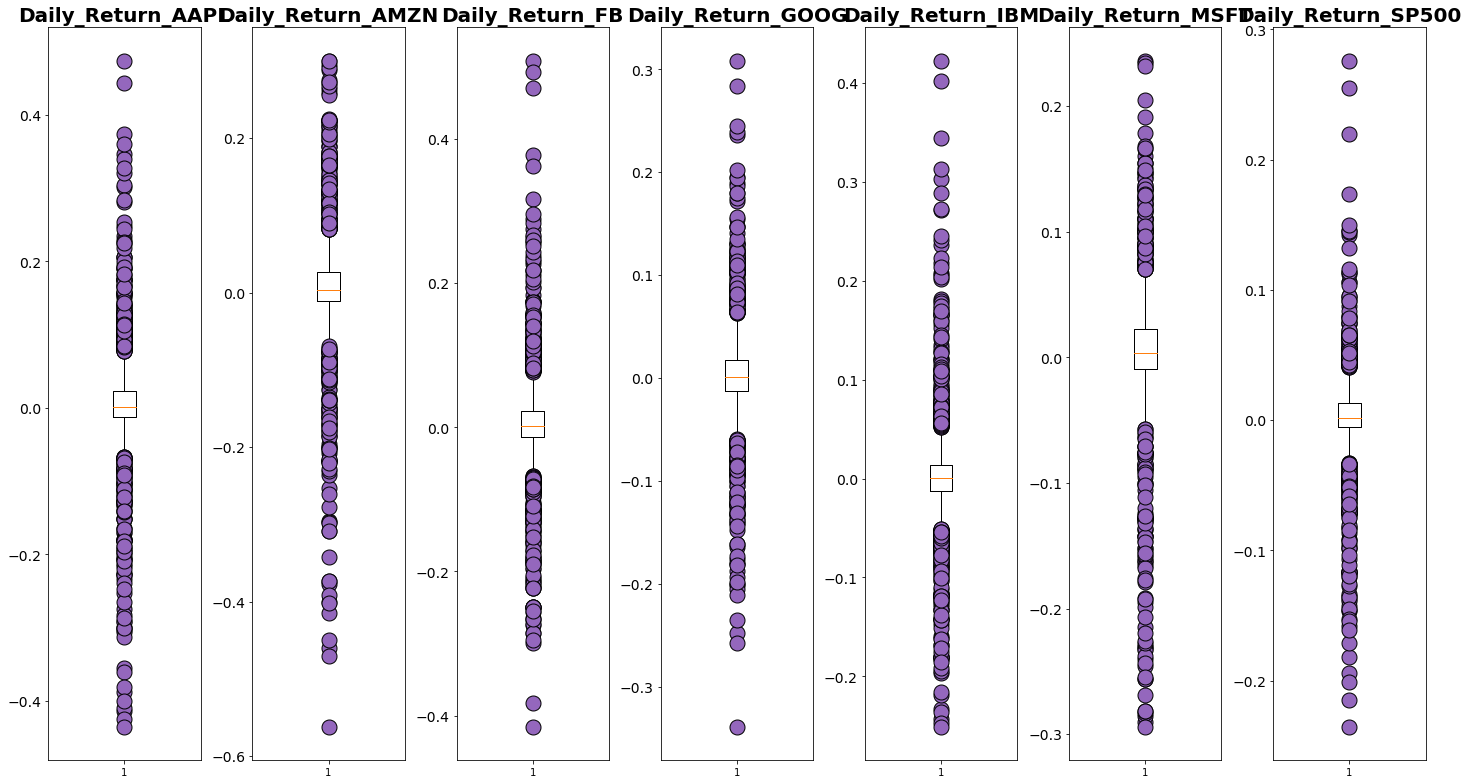

In [162]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='tab:purple', marker='o', markeredgecolor='black', markersize=15,
                  linestyle='none')

fig, axs = plt.subplots(1, len(df_stockmkt_tech_R.columns), figsize=(20,11))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_stockmkt_tech_R.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_stockmkt_tech_R.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### Boxplot Interpretation

1. Datapoints in Apple concentrated mostly between -0.3% to 0.3% and had outliers from -0.3 onwards and some outliers 0.3 onwards till 1.0. We see that consistent daily return mostly gained 30% and lossed 40% in stock rally in period of 5 Years.

2. Datapoints in Amazon held distribution of minimum of -0.2% and Maximum of 0.3%. Further to this, Amazon have outliers in  Lower Quartile from 0.2 % and in Upper Quartile it has outliers from 0.38%. We can assume that stocks projected consistent daily return of 30% and losses around 20% in stock rally for 5 Years.

3. Datapoints in Facebook held distribution of minimum of -0.2% and Maximum of 0.2%. We can see that FB has low outliers in Lower Quartile & Upper Quartile. We can assume that stocks projected consistent daily return of 20% and losses around 20% in stock rally for 5 Years.

4. Datapoints in Google held distribution of minimum of -0.2% and Maximum of 0.2%. We can see that Google has low outliers in Lower Quartile & Upper Quartile. We can assume that stocks projected consistent daily return of 20% and losses around 20% in stock rally for 5 Years.

5. Datapoints in IBM held distribution of minimum of -0.1% and Maximum of 0.2%. We can assume that stocks projected consistent daily return of 10% and losses around 20% in stock rally for 5 Years.

6. Datapoints in Microsoft held distribution of minimum of -0.3% and Maximum of 0.2%. Microsoft does not possess outlier in lower Quartile and in upper Quartile, it has outlier from 0.2%. We can assume that stocks projected consistent daily return of 30% and losses around 20% in stock rally for 5 Years.


### 4.5 Min. Value of Daily Return in tech stocks

In [163]:
# Minimum value of daily return in Tech stock 
Min_Value_tech = df_stockmkt_tech_R.iloc[:,:7].min()
print(Min_Value_tech)

Daily_Return_AAPL    -0.435247
Daily_Return_AMZN    -0.561658
Daily_Return_FB      -0.415087
Daily_Return_GOOG    -0.338538
Daily_Return_IBM     -0.250766
Daily_Return_MSFT    -0.293896
Daily_Return_SP500   -0.235324
dtype: float64


In [164]:
## Dates of Min. return of Daily return 
Min_Tech_Dates = df_stockmkt_tech_R.iloc[:,:8].idxmin()
print(Min_Tech_Dates)

Daily_Return_AAPL    2020-04-13
Daily_Return_AMZN    2015-12-01
Daily_Return_FB      2020-03-13
Daily_Return_GOOG    2015-12-01
Daily_Return_IBM     2020-07-04
Daily_Return_MSFT    2019-12-02
Daily_Return_SP500   2020-01-04
dtype: datetime64[ns]


### 4.6 Max. Value of Daily Return in Tech stock

In [165]:
# Minimum value of daily return in Finance stock 
Max_Value_tech = df_stockmkt_tech_R.iloc[:,:7].max()
print(Max_Value_tech)

Daily_Return_AAPL     0.474060
Daily_Return_AMZN     0.300171
Daily_Return_FB       0.508660
Daily_Return_GOOG     0.308321
Daily_Return_IBM      0.422507
Daily_Return_MSFT     0.236082
Daily_Return_SP500    0.275866
dtype: float64


In [166]:
## Dates of Max. return of Daily return 
Max_Tech_Dates = df_stockmkt_tech_R.iloc[:,:8].idxmax()
print(Max_Tech_Dates)

Daily_Return_AAPL    2020-01-09
Daily_Return_AMZN    2020-06-07
Daily_Return_FB      2018-07-13
Daily_Return_GOOG    2020-03-06
Daily_Return_IBM     2018-11-01
Daily_Return_MSFT    2015-10-11
Daily_Return_SP500   2020-04-02
dtype: datetime64[ns]


### 4.7 scatter_matrix for checking volatility in Tech Stock

array([[<AxesSubplot:xlabel='Daily_Return_AAPL', ylabel='Daily_Return_AAPL'>,
        <AxesSubplot:xlabel='Daily_Return_AMZN', ylabel='Daily_Return_AAPL'>,
        <AxesSubplot:xlabel='Daily_Return_FB', ylabel='Daily_Return_AAPL'>,
        <AxesSubplot:xlabel='Daily_Return_GOOG', ylabel='Daily_Return_AAPL'>,
        <AxesSubplot:xlabel='Daily_Return_IBM', ylabel='Daily_Return_AAPL'>,
        <AxesSubplot:xlabel='Daily_Return_MSFT', ylabel='Daily_Return_AAPL'>,
        <AxesSubplot:xlabel='Daily_Return_SP500', ylabel='Daily_Return_AAPL'>],
       [<AxesSubplot:xlabel='Daily_Return_AAPL', ylabel='Daily_Return_AMZN'>,
        <AxesSubplot:xlabel='Daily_Return_AMZN', ylabel='Daily_Return_AMZN'>,
        <AxesSubplot:xlabel='Daily_Return_FB', ylabel='Daily_Return_AMZN'>,
        <AxesSubplot:xlabel='Daily_Return_GOOG', ylabel='Daily_Return_AMZN'>,
        <AxesSubplot:xlabel='Daily_Return_IBM', ylabel='Daily_Return_AMZN'>,
        <AxesSubplot:xlabel='Daily_Return_MSFT', ylabel='Daily_Retur

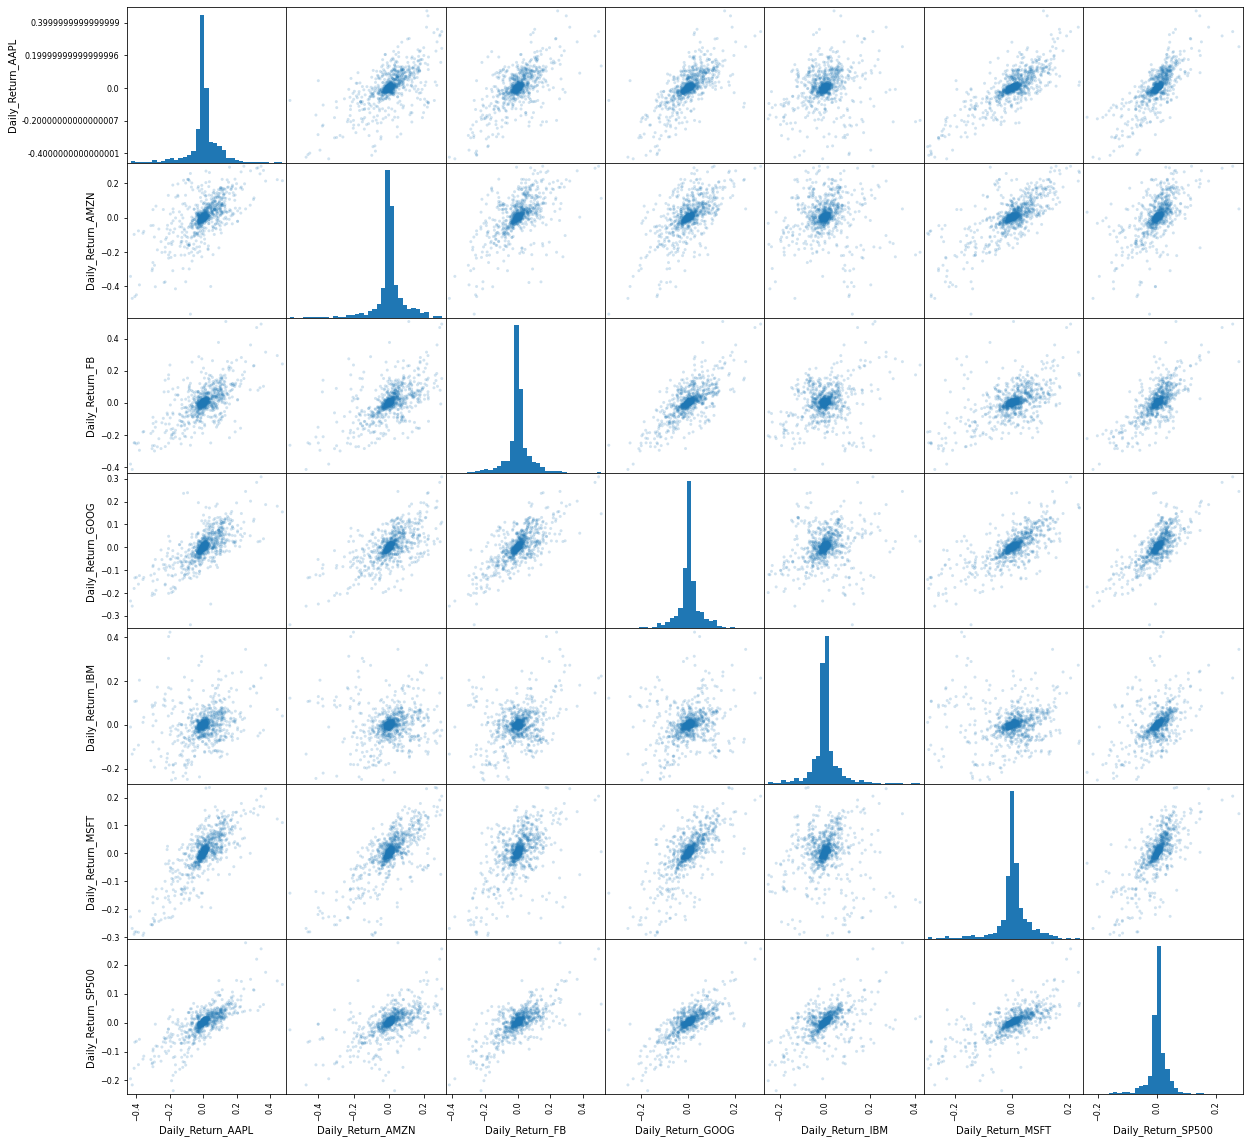

In [167]:
pd.plotting.scatter_matrix(df_stockmkt_tech_R.iloc[:,:7], alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(20,20))

### 4.8 Correlation Analysis

In [168]:
corr_df_tech = df_stockmkt_tech_R.iloc[:,:7].corr(method='pearson')
corr_df_tech

Daily_Return_AAPL  Daily_Return_AMZN  Daily_Return_FB  \
Daily_Return_AAPL            1.000000           0.616027         0.636248   
Daily_Return_AMZN            0.616027           1.000000         0.566791   
Daily_Return_FB              0.636248           0.566791         1.000000   
Daily_Return_GOOG            0.705997           0.624596         0.730343   
Daily_Return_IBM             0.216276           0.065816         0.344729   
Daily_Return_MSFT            0.790923           0.731058         0.558745   
Daily_Return_SP500           0.776811           0.575927         0.730450   

                    Daily_Return_GOOG  Daily_Return_IBM  Daily_Return_MSFT  \
Daily_Return_AAPL            0.705997          0.216276           0.790923   
Daily_Return_AMZN            0.624596          0.065816           0.731058   
Daily_Return_FB              0.730343          0.344729           0.558745   
Daily_Return_GOOG            1.000000          0.265398           0.714874   
Daily_Return_IBM             0.265398          1.000000           0.076915   
Daily_Return_MSFT            0.714874          0.076915           1.000000   
Daily_Return_SP500           0.759745          0.520172           0.710885   

                    Daily_Return_SP500  
Daily_Return_AAPL             0.776811  
Daily_Return_AMZN             0.575927  
Daily_Return_FB               0.730450  
Daily_Return_GOOG             0.759745  
Daily_Return_IBM              0.520172  
Daily_Return_MSFT             0.710885  
Daily_Return_SP500            1.000000

<Figure size 432x288 with 0 Axes>

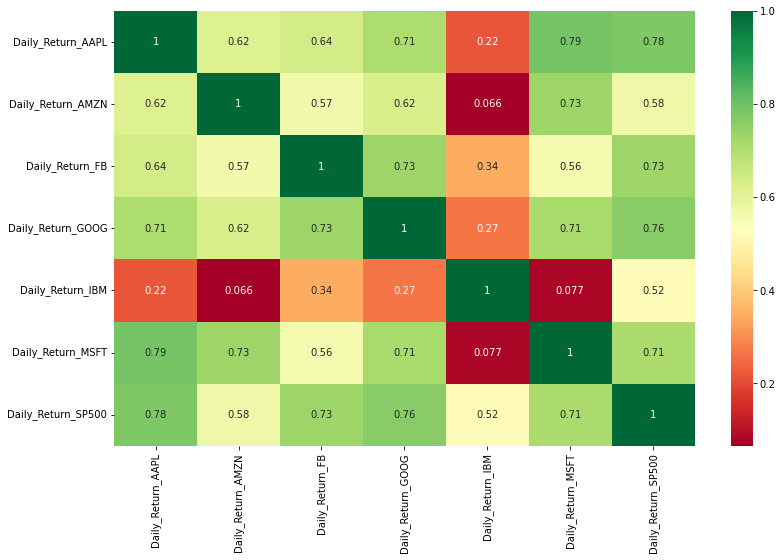

<Figure size 432x288 with 0 Axes>

In [169]:
#4.8 Plotting Heatmap 
plt.figure(figsize = (13,8))
sns.heatmap(corr_df_tech, annot=True, cmap="RdYlGn")
plt.figure()

### Heatmap Interpretation 

1. We can see that Microsoft and Google has correlation co-effient greater than 7.0 (70%) which implies it has good correlation to other stocks. we can assume that any small/big changes will have an impact in earnings. 

2. On negative side, we can observe that IBM has no correlation to the other stocks. It also implies that no changes will occur in IBM whenever there is an drop or Gain in the listed tech stocks.

3. A good investment portfolio contains diversified assets. In this context, this means we should select stocks that are not strongly correlated with each other.

### 4.9  Scatter Plot to understand Risk Return 
Quantify risk via comparision the mean of expected return with standard deviation of expected return

In [170]:
#4.9 Dropping Na
df_stockmkt_tech_R_1 =df_stockmkt_tech_R.dropna()

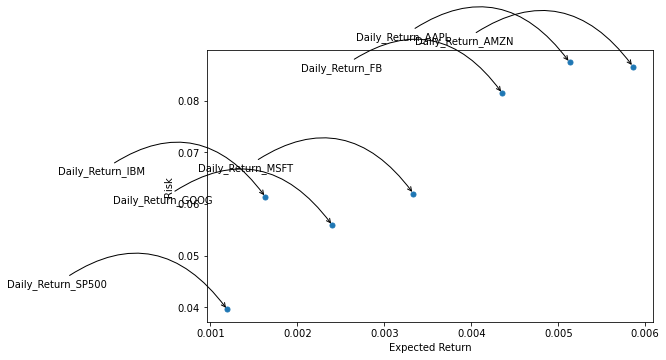

In [171]:
plt.figure(figsize=(8,5))

plt.scatter(df_stockmkt_tech_R_1.mean(),df_stockmkt_tech_R_1.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(df_stockmkt_tech_R_1.columns,df_stockmkt_tech_R_1.mean(),df_stockmkt_tech_R_1.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

### Interpretation of Scatter Plot 
1. AMZN :- High Risk High Return 
2. AAPL :- High Risk High Return
3. FB   :- High Risk Medium Return 
4. MSFT :- Medium Risk Medium Return 
5. IBM :- Medium Risk Low Return 
6. Goog :- Medium Risk Low Return 

### 4.10 Standard Deviation 

In [172]:
#Standard deviation
df_stockmkt_tech_R.std()

Daily_Return_AAPL     0.087387
Daily_Return_AMZN     0.086569
Daily_Return_FB       0.081424
Daily_Return_GOOG     0.055898
Daily_Return_IBM      0.061375
Daily_Return_MSFT     0.062025
Daily_Return_SP500    0.039606
dtype: float64

### Interpretation of Standard Deviation (Tech Industry) ( to write)

1. It was noticed that Google has lower standard deviation of 0.055 compared to benchmark Indicies sp500 which is 0.039. On higher note, Apple has highest standard deviation of 0.087. 

2. We can expect a predictable and consistent return in Google, as its standard deviation value is lower than other stocks. 

### 4.11 Sharpe ratio

Sharpe ratio indicates how much risk was taken to generate the returns. Higher the value means, fund has been able to give better returns for the amount of risk taken

In [173]:
df_stockmkt_tech_R['SR_AAPL']  = df_stockmkt_tech_R['Daily_Return_AAPL'].mean() / df_stockmkt_tech_R['Daily_Return_AAPL'].std() * (252**0.5) 
df_stockmkt_tech_R['SR_AMZN']  = df_stockmkt_tech_R['Daily_Return_AMZN'].mean() / df_stockmkt_tech_R['Daily_Return_AMZN'].std() * (252**0.5) 
df_stockmkt_tech_R['SR_FB']  = df_stockmkt_tech_R['Daily_Return_FB'].mean() / df_stockmkt_tech_R['Daily_Return_FB'].std() * (252**0.5) 
df_stockmkt_tech_R['SR_GOOG']  = df_stockmkt_tech_R['Daily_Return_GOOG'].mean() / df_stockmkt_tech_R['Daily_Return_GOOG'].std()* (252**0.5) 
df_stockmkt_tech_R['SR_IBM']  = df_stockmkt_tech_R['Daily_Return_IBM'].mean() / df_stockmkt_tech_R['Daily_Return_IBM'].std()* (252**0.5) 
df_stockmkt_tech_R['SR_MSFT'] = df_stockmkt_tech_R['Daily_Return_MSFT'].mean() / df_stockmkt_tech_R['Daily_Return_MSFT'].std()* (252**0.5)
df_stockmkt_tech_R['SR_SP500'] = df_stockmkt_tech_R['Daily_Return_SP500'].mean() / df_stockmkt_tech_R['Daily_Return_SP500'].std()* (252**0.5)

#####  Sharpe ratio is calculated by deriving mean of the daily returns, divided by the standard deviation of the daily returns. Also, we needs to annualize the Sharpe ratio. This can be done by 252 tradings day in year and multiply Sharpe ratio by the square root of 252 i.e. 252**0.5

In [174]:
df_T = df_stockmkt_tech_R.iloc[0,7:]
print(df_T)

SR_AAPL     0.931984
SR_AMZN     1.074472
SR_FB       0.849168
SR_GOOG     0.681887
SR_IBM      0.422062
SR_MSFT     0.853162
SR_SP500    0.477910
Name: 2015-10-03 00:00:00, dtype: float64


### Interpretation of Sharpe Ratio
1. Sharpe Ratio of Amazon is 1.07 which is good, apart from this, we can see that apple & Facebook and Microsoft sharpe ratio is 0.93,0.84,0.85 respectively which is closer to 1
2. On other hand, IBM has lowest harpe Ratio of 0.42 which signifies that return generating capacity will be low. 
3. Any Sharpe Ratio above 1.00 generally means the portfolio or stock is acceptable to hold because you are receiving an excess return per unit of risk. Anything above 2.00 or 3.00 is considered very good.

## Cumulative Return 
The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change. 
t is calculated using below formula
Cumulative Return = ( Pcurrent – Pinitial ) / Pinitial

### 4.12 Cumulative Return from Closing Prices [Tech Stocks]
The Closing stock prices are readily available to us, therefore using closing stock prices to compute cumulative returns

In [175]:
##4.12 Creating Dataframe for Cumulative Returns from Closing Prices of Stocks

df_cum_tech = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.df_AAPL_Close,df_stockmkt.df_AMZN_Close,df_stockmkt.df_FB_Close,
                     df_stockmkt.df_GOOG_Close,df_stockmkt.df_IBM_Close,df_stockmkt.df_MSFT_Close,df_stockmkt.df_SP500_Close])

df_cum_tech.dropna(inplace=True)

In [176]:
df_cum_tech['cumu_Return_AAPL'] = (df_cum_tech['df_AAPL_Close'].iloc[-1] - df_cum_tech['df_AAPL_Close'].iloc[0]) / df_cum_tech['df_AAPL_Close'].iloc[0]
df_cum_tech['cumu_Return_AMZN'] = (df_cum_tech['df_AMZN_Close'].iloc[-1] - df_cum_tech['df_AMZN_Close'].iloc[0]) / df_cum_tech['df_AMZN_Close'].iloc[0]
df_cum_tech['cumu_Return_FB'] = (df_cum_tech['df_FB_Close'].iloc[-1] - df_cum_tech['df_FB_Close'].iloc[0]) / df_cum_tech['df_FB_Close'].iloc[0]
df_cum_tech['cumu_Return_GOOG'] = (df_cum_tech['df_GOOG_Close'].iloc[-1] - df_cum_tech['df_GOOG_Close'].iloc[0]) / df_cum_tech['df_GOOG_Close'].iloc[0]
df_cum_tech['cumu_Return_IBM'] = (df_cum_tech['df_IBM_Close'].iloc[-1] - df_cum_tech['df_IBM_Close'].iloc[0]) / df_cum_tech['df_IBM_Close'].iloc[0]
df_cum_tech['cumu_Return_MSFT'] = (df_cum_tech['df_MSFT_Close'].iloc[-1] - df_cum_tech['df_MSFT_Close'].iloc[0]) / df_cum_tech['df_MSFT_Close'].iloc[0]
df_cum_tech['cumu_Return_SP500'] = (df_stockmkt['df_SP500_Close'].iloc[-1] - df_stockmkt['df_SP500_Close'].iloc[0]) / df_stockmkt['df_SP500_Close'].iloc[0]
print(df_cum_tech.iloc[:,7:].head(2))

            cumu_Return_AAPL  cumu_Return_AMZN  cumu_Return_FB  \
Date                                                             
2015-10-02          2.796427          7.441635        2.483176   
2015-10-03          2.796427          7.441635        2.483176   

            cumu_Return_GOOG  cumu_Return_IBM  cumu_Return_MSFT  \
Date                                                              
2015-10-02          1.744506        -0.232656          3.937324   
2015-10-03          1.744506        -0.232656          3.937324   

            cumu_Return_SP500  
Date                           
2015-10-02           0.625745  
2015-10-03           0.625745  


In [177]:
## We will multiple by 100 to get the numbers as percentage change.
df_cum_tech.iloc[:,7:].max() * 100

cumu_Return_AAPL     279.642687
cumu_Return_AMZN     744.163534
cumu_Return_FB       248.317578
cumu_Return_GOOG     174.450556
cumu_Return_IBM      -23.265641
cumu_Return_MSFT     393.732422
cumu_Return_SP500     62.574500
dtype: float64

#### We observe here, Microsoft prices have rose 394% and  amazon prices have soared 744%, Google prices have risen by 174%, Facebook and Apple prices have risen by 248% and 280% in 5 year stock rally. In comparison the benchmark s&p500 indices we see, it has increased by 62% during the entire 5 Year period.

### 4.13 Cumulative Returns From  Daily Returns [Tech Stocks]

##### Calculating Cumulative returns from Daily returns of stocks

In [178]:
df_stockmkt_tech_R['cumu_ret_AAPL'] = ( 1 + df_stockmkt_tech_R['Daily_Return_AAPL']).cumprod() -1 
df_stockmkt_tech_R['cumu_ret_AMZN'] =  (1 + df_stockmkt_tech_R['Daily_Return_AMZN']).cumprod() -1
df_stockmkt_tech_R['cumu_ret_FB'] =  (1 + df_stockmkt_tech_R['Daily_Return_FB']).cumprod() -1
df_stockmkt_tech_R['cumu_ret_GOOG'] =  (1 + df_stockmkt_tech_R['Daily_Return_GOOG']).cumprod()-1
df_stockmkt_tech_R['cumu_ret_IBM'] =  (1 + df_stockmkt_tech_R['Daily_Return_IBM']).cumprod() -1 
df_stockmkt_tech_R['cumu_ret_MSFT'] =  (1 + df_stockmkt_tech_R['Daily_Return_MSFT']).cumprod() -1
df_stockmkt_tech_R['cumu_ret_SP500'] =  (1 + df_stockmkt_tech_R['Daily_Return_SP500']).cumprod() -1

In [179]:
## Duplicate Dataframe for creating the Boxplot 

df_stockmkt_Tech_CR = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt_tech_R.cumu_ret_AAPL,df_stockmkt_tech_R.cumu_ret_AMZN,df_stockmkt_tech_R.cumu_ret_FB,
                     df_stockmkt_tech_R.cumu_ret_GOOG,df_stockmkt_tech_R.cumu_ret_IBM,df_stockmkt_tech_R.cumu_ret_MSFT,
                    df_stockmkt_tech_R.cumu_ret_SP500])

df_stockmkt_Tech_CR.dropna(inplace=True)
print(df_stockmkt_Tech_CR.head(2))

            cumu_ret_AAPL  cumu_ret_AMZN  cumu_ret_FB  cumu_ret_GOOG  \
Date                                                                   
2015-10-03       0.020407      -0.009357     0.031387       0.033654   
2015-10-04       0.041633       0.025871     0.091103       0.005718   

            cumu_ret_IBM  cumu_ret_MSFT  cumu_ret_SP500  
Date                                                     
2015-10-03     -0.004730      -0.013380        -0.01181  
2015-10-04      0.027119      -0.020657         0.01618  


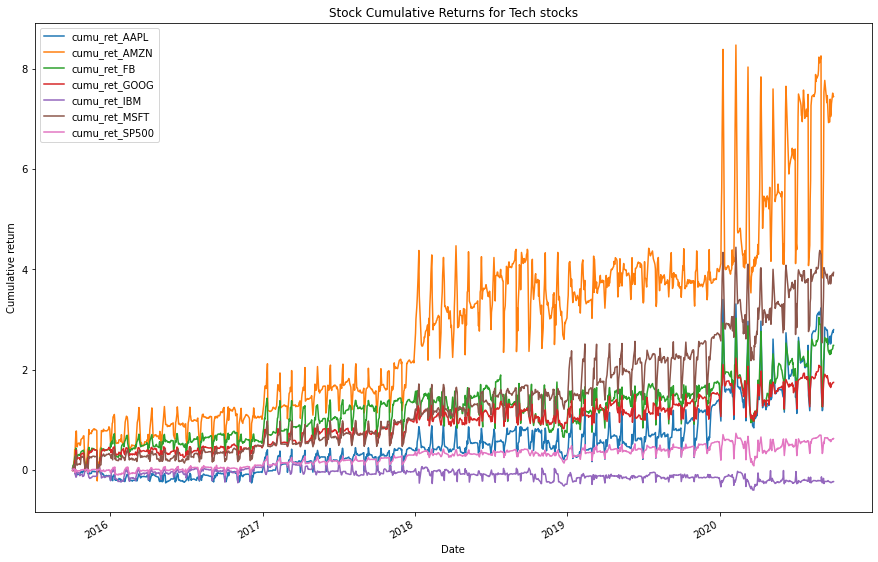

In [180]:
#4.13 Visualizing Stock Cumulative returns (derived from daily returns)
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)
df_stockmkt_Tech_CR.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Stock Cumulative Returns for Tech stocks')
plt.show()

### 4.14 Treynor's Ratio
Treynor's ratio indicates how much excess return was generated for each unit of risk taken. Higher the value means, fund has been able to give better returns for the amount of risk taken.

#### Treynor ratio = return - risk free rate / Beta

In [181]:
# Calculating Beta, Alpha, R_value, p_value, Std_error for finance stock 
df_stockmkt_tech_R['beta_AAPL'], df_stockmkt_tech_R['alpha_AAPL'], df_stockmkt_tech_R['r_value_AAPL'], df_stockmkt_tech_R['p_value_AAPL'], df_stockmkt_tech_R['stderror_AAPL']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_AAPL'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_tech_R['beta_AMZN'], df_stockmkt_tech_R['alpha_AMZN'], df_stockmkt_tech_R['r_value_AMZN'], df_stockmkt_tech_R['p_value_AMZN'], df_stockmkt_tech_R['stderror_AMZN']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_AMZN'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_tech_R['beta_FB'], df_stockmkt_tech_R['alpha_FB'], df_stockmkt_tech_R['r_value_FB'], df_stockmkt_tech_R['p_value_FB'], df_stockmkt_tech_R['stderror_FB']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_FB'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_tech_R['beta_GOOG'], df_stockmkt_tech_R['alpha_GOOG'], df_stockmkt_tech_R['r_value_GOOG'], df_stockmkt_tech_R['p_value_GOOG'], df_stockmkt_tech_R['stderror_GOOG']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_GOOG'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_tech_R['beta_MSFT'], df_stockmkt_tech_R['alpha_MSFT'], df_stockmkt_tech_R['r_value_MSFT'], df_stockmkt_tech_R['p_value_MSFT'], df_stockmkt_tech_R['stderror_MSFT']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_MSFT'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_tech_R['beta_IBM'], df_stockmkt_tech_R['alpha_IBM'], df_stockmkt_tech_R['r_value_IBM'], df_stockmkt_tech_R['p_value_IBM'], df_stockmkt_tech_R['stderror_IBM']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_IBM'],df_stockmkt['Daily_Return_SP500'].dropna())
df_stockmkt_tech_R['beta_SP500'], df_stockmkt_tech_R['alpha_SP500'], df_stockmkt_tech_R['r_value_SP500'], df_stockmkt_tech_R['p_value_SP500'], df_stockmkt_tech_R['stderror_SP500']   = stats.linregress(df_stockmkt_tech_R['Daily_Return_SP500'],df_stockmkt['Daily_Return_SP500'].dropna())

In [182]:
# Treynor ratio for finance stock
#rfr = 2
df_stockmkt_tech_R['t_ratio_AAPL'] = (df_cum_tech['cumu_Return_AAPL'] - 0/100) / df_stockmkt_tech_R['beta_AAPL']
df_stockmkt_tech_R['t_ratio_AMZN'] = (df_cum_tech['cumu_Return_AMZN'] - 0/100) / df_stockmkt_tech_R['beta_AMZN']
df_stockmkt_tech_R['t_ratio_FB'] = (df_cum_tech['cumu_Return_FB'] - 0/100) / df_stockmkt_tech_R['beta_FB']
df_stockmkt_tech_R['t_ratio_GOOG'] = (df_cum_tech['cumu_Return_GOOG'] - 0/100) / df_stockmkt_tech_R['beta_GOOG']
df_stockmkt_tech_R['t_ratio_MSFT'] = (df_cum_tech['cumu_Return_MSFT'] - 0/100) / df_stockmkt_tech_R['beta_MSFT']
df_stockmkt_tech_R['t_ratio_IBM'] = (df_cum_tech['cumu_Return_IBM'] - 0/100) / df_stockmkt_tech_R['beta_IBM']
df_stockmkt_tech_R['t_ratio_SP500'] = (df_cum_tech['cumu_Return_SP500'] - 0/100) / df_stockmkt_tech_R['beta_SP500']

In [183]:
df_Tech = df_stockmkt_tech_R.iloc[0,56:62]
print(df_Tech)

t_ratio_AAPL     7.942794
t_ratio_AMZN    28.242350
t_ratio_FB       6.988880
t_ratio_GOOG     3.240697
t_ratio_MSFT     8.673827
t_ratio_IBM     -0.693108
Name: 2015-10-03 00:00:00, dtype: float64


### 4.15 Beta

1. Beta value gives idea about how volatile fund performance has been compared to similar funds in the market. 
2. Lower beta implies the fund gives more predictable performance compared to similar funds in the market.

In [184]:
#Beta of Finance stock
print("Beta for AAPL is :", np.round(df_stockmkt_tech_R['beta_AAPL'],2).iloc[0])
print("Beta for AMZN is :", np.round(df_stockmkt_tech_R['beta_AMZN'],2).iloc[0])
print("Beta for FB is :", np.round(df_stockmkt_tech_R['beta_FB'],2).iloc[0])
print("Beta for GOOG is :", np.round(df_stockmkt_tech_R['beta_GOOG'],2).iloc[0])
print("Beta for MSFT is :", np.round(df_stockmkt_tech_R['beta_MSFT'],2).iloc[0])
print("Beta for IBM is :", np.round(df_stockmkt_tech_R['beta_IBM'],2).iloc[0])
print("Beta for SP500 is :", np.round(df_stockmkt_tech_R['beta_SP500'],2).iloc[0])

Beta for AAPL is : 0.35
Beta for AMZN is : 0.26
Beta for FB is : 0.36
Beta for GOOG is : 0.54
Beta for MSFT is : 0.45
Beta for IBM is : 0.34
Beta for SP500 is : 1.0


###  4.16 Alpha for Financial Industry Stocks
alpha helps reveal how a stock or fund might perform in relation to its peers or to the market as a whole.

#### 1.An alpha of 1.0 means the investment outperformed its benchmark index by 1%.
#### 2.An alpha of -1.0 means the investment underperformed its benchmark index by 1%. If the alpha is zero, its return matched the benchmark.

In [185]:
#alpha of Finance stock

#alpha of Finance stock
print("alpha for AAPL is :", np.round(df_stockmkt_tech_R['alpha_AAPL'],5).iloc[0])
print("alpha for AMZN is :", np.round(df_stockmkt_tech_R['alpha_AMZN'],5).iloc[0])
print("alpha for FB is :", np.round(df_stockmkt_tech_R['alpha_FB'],5).iloc[0])
print("alpha for GOOG is :", np.round(df_stockmkt_tech_R['alpha_GOOG'],5).iloc[0])
print("alpha for MSFT is :", np.round(df_stockmkt_tech_R['alpha_MSFT'],5).iloc[0])
print("alpha for IBM is :", np.round(df_stockmkt_tech_R['alpha_IBM'],5).iloc[0])
print("alpha for SP500 is :", np.round(df_stockmkt_tech_R['alpha_SP500'],5).iloc[0])

alpha for AAPL is : -0.00061
alpha for AMZN is : -0.00035
alpha for FB is : -0.00036
alpha for GOOG is : -0.0001
alpha for MSFT is : -0.00032
alpha for IBM is : 0.00064
alpha for SP500 is : 0.0


### 4.17 Daily Return Mean visual using Stacked Histogram 

In [186]:
df_stockmkt_tech_R['AAPL_Mean'] = df_cum_tech['cumu_Return_AAPL'].mean()
df_stockmkt_tech_R['AMZN_Mean'] = df_cum_tech['cumu_Return_AMZN'].mean()
df_stockmkt_tech_R['FB_Mean']   =  df_cum_tech['cumu_Return_FB'].mean()
df_stockmkt_tech_R['GOOG_Mean'] =  df_cum_tech['cumu_Return_GOOG'].mean()
df_stockmkt_tech_R['MSFT_Mean'] =  df_cum_tech['cumu_Return_MSFT'].mean()
df_stockmkt_tech_R['SP500_Mean'] = df_cum_tech['cumu_Return_SP500'].mean()

Text(0.5, 1.0, 'Daily Returns Mean in Tech Industry')

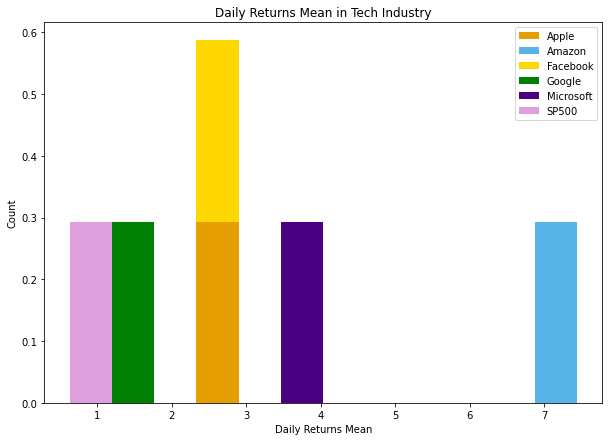

In [187]:
##1.17 Visualizing daily return mean in Stacked Histogram 
plt.figure(figsize=(10,7))

x1 = list(df_stockmkt_tech_R['AAPL_Mean'].dropna())
x2 = list(df_stockmkt_tech_R['AMZN_Mean'].dropna())
x3 = list(df_stockmkt_tech_R['FB_Mean'].dropna())
x4 = list(df_stockmkt_tech_R['GOOG_Mean'].dropna())
x5 = list(df_stockmkt_tech_R['MSFT_Mean'].dropna())
x6 = list(df_stockmkt_tech_R['SP500_Mean'].dropna())

colors = ['#E69F00','#56B4E9','gold','green','indigo','plum']
names = ['Apple','Amazon','Facebook','Google','Microsoft','SP500' ]


plt.hist([x1,x2,x3,x4,x5,x6], bins = int(180/15), density=True, stacked=True,
         color = colors, label=names)

# Plot formatting
plt.legend(loc='best')
plt.xlabel('Daily Returns Mean')
plt.ylabel('Count')
plt.title('Daily Returns Mean in Tech Industry')

## 4. Portfolio Management

#### Potential Clients
1. Mr. Peter Jyengar - 32
2. Mr. Patrick Jyengar - 55

### Stock Portfolio for Mr. Peter 

In [389]:
## Merging Close price stocks into single Dataframe for Mr. Peter Portfolio

df_PM_Peter_Port = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.df_UNH_Close,df_stockmkt.df_MRK_Close,df_stockmkt.df_AAPL_Close,df_stockmkt.df_AMZN_Close,
                     df_stockmkt.df_FB_Close,df_stockmkt.df_GOOG_Close,df_stockmkt.df_MSFT_Close])
                     

df_PM_Peter_Port.dropna(inplace=True)
print(df_PM_Peter_Port.head(2))

            df_UNH_Close  df_MRK_Close  df_AAPL_Close  df_AMZN_Close  \
Date                                                                   
2015-10-02    108.970001     58.849998      30.504999      373.00000   
2015-10-03    112.459999     56.580002      31.127501      369.51001   

            df_FB_Close  df_GOOG_Close  df_MSFT_Close  
Date                                                   
2015-10-02    75.190002     535.469849      42.599998  
2015-10-03    77.550003     553.490417      42.029999  


### Acquiring Financial Metrics using Financial Function (ffn) in Python for Mr. Peter Portfolio

In [356]:
## Financial Metric of Mr. Peter portfolio
Peter_Portfolio = ffn.core.GroupStats(df_PM_Peter_1)
Peter_Portfolio.display()

Stat                 df_UNH_Close    df_MRK_Close    df_AAPL_Close    df_AMZN_Close    df_FB_Close    df_GOOG_Close    df_MSFT_Close
-------------------  --------------  --------------  ---------------  ---------------  -------------  ---------------  ---------------
Start                2015-10-02      2015-10-02      2015-10-02       2015-10-02       2015-10-02     2015-10-02       2015-10-02
End                  2020-09-30      2020-09-30      2020-09-30       2020-09-30       2020-09-30     2020-09-30       2020-09-30
Risk-free rate       0.00%           0.00%           0.00%            0.00%            0.00%          0.00%            0.00%

Total Return         186.11%         40.95%          279.64%          744.16%          248.32%        174.45%          393.73%
Daily Sharpe         0.72            0.49            0.93             1.07             0.85           0.68             0.85
Daily Sortino        1.05            0.72            1.40             1.56             1.36    

In [357]:
# Annualised Portfolio Returns
Peter_Portfolio.display_lookback_returns()

df_UNH_Close df_MRK_Close df_AAPL_Close df_AMZN_Close df_FB_Close  \
mtd         -0.25%       -2.72%       -10.25%        -8.76%     -10.68%   
3m           5.70%        7.27%        26.98%        14.13%      15.34%   
6m          24.07%        7.80%        81.80%        60.33%      57.82%   
ytd          6.05%       -8.80%        57.75%        70.40%      27.60%   
1y          43.46%       -1.46%       106.83%        81.39%      47.07%   
3y          24.51%       11.46%        57.31%        58.21%      28.20%   
5y          23.42%        7.11%        30.60%        53.25%      28.37%   
10y           nan%         nan%          nan%          nan%        nan%   
incep       23.42%        7.11%        30.60%        53.25%      28.37%   

      df_GOOG_Close df_MSFT_Close  
mtd         -10.07%        -6.74%  
3m            3.96%         3.35%  
6m           28.15%        31.27%  
ytd           9.92%        33.37%  
1y           20.56%        51.28%  
3y           22.25%        49.80%  
5y           22.39%        37.66%  
10y            nan%          nan%  
incep        22.39%        37.66%

<AxesSubplot:title={'center':'Equity Progression'}, xlabel='Date'>

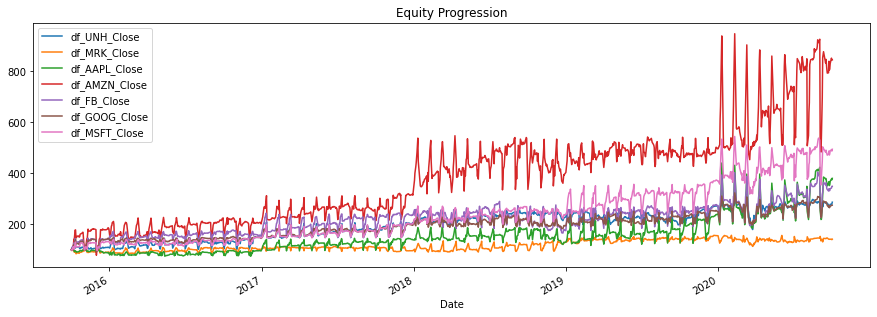

In [367]:
Peter_Portfolio.plot()

Text(0.5, 0.98, 'Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

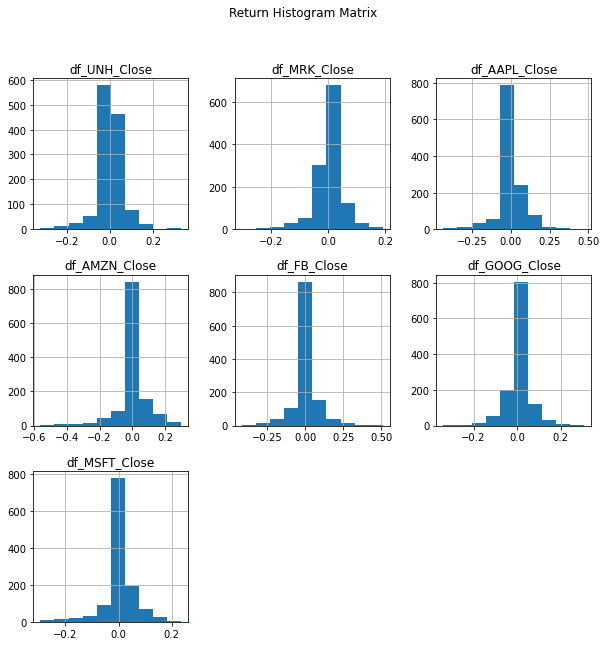

In [366]:
Peter_Portfolio.plot_histograms(freq=None, title=None, figsize=(10, 10))

<module 'matplotlib.pyplot' from 'C:\\Users\\91901\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

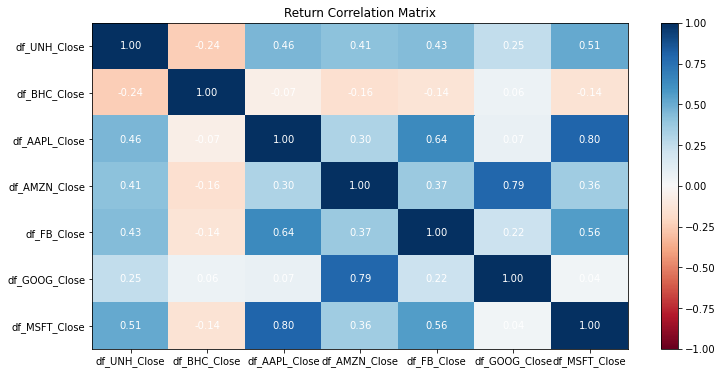

In [348]:
Peter_Portfolio.plot_correlation(freq=None, title=None, figsize=(12, 6))

### Stock Portfolio for Mr. Patrick

In [380]:
df_PM_Patrix = reduce(lambda left,right:
                    pd.merge(left,right,
                            on = ["Date"],
                     how = "inner"),
                    [df_stockmkt.df_AMZN_Close,df_stockmkt.df_JNJ_Close,df_stockmkt.df_AAPL_Close,df_stockmkt.df_PFE_Close
                     ,df_stockmkt.df_MSFT_Close])
                     

df_PM_Patrix.dropna(inplace=True)
print(df_PM_Patrix.head(2))

            df_AMZN_Close  df_JNJ_Close  df_AAPL_Close  df_PFE_Close  \
Date                                                                   
2015-10-02      373.00000    100.349998      30.504999     34.150002   
2015-10-03      369.51001     99.529999      31.127501     33.779999   

            df_MSFT_Close  
Date                       
2015-10-02      42.599998  
2015-10-03      42.029999  


In [381]:
Portfolio_Patrick = ffn.core.GroupStats(df_PM_Patrix)
Portfolio_Patrick.display()

Stat                 df_AMZN_Close    df_JNJ_Close    df_AAPL_Close    df_PFE_Close    df_MSFT_Close
-------------------  ---------------  --------------  ---------------  --------------  ---------------
Start                2015-10-02       2015-10-02      2015-10-02       2015-10-02      2015-10-02
End                  2020-09-30       2020-09-30      2020-09-30       2020-09-30      2020-09-30
Risk-free rate       0.00%            0.00%           0.00%            0.00%           0.00%

Total Return         744.16%          48.36%          279.64%          7.47%           393.73%
Daily Sharpe         1.07             0.45            0.93             0.39            0.85
Daily Sortino        1.56             0.66            1.40             0.60            1.20
CAGR                 53.25%           8.21%           30.60%           1.45%           37.66%
Max Drawdown         -57.08%          -27.75%         -58.20%          -38.37%         -41.54%
Calmar Ratio         0.93             

In [382]:
# Annualised Portfolio Returns
Portfolio_Patrick.display_lookback_returns()

df_AMZN_Close df_JNJ_Close df_AAPL_Close df_PFE_Close df_MSFT_Close
mtd          -8.76%       -2.95%       -10.25%       -2.88%        -6.74%
3m           14.13%        5.87%        26.98%       12.23%         3.35%
6m           60.33%       11.93%        81.80%       12.34%        31.27%
ytd          70.40%        2.06%        57.75%       -6.33%        33.37%
1y           81.39%       15.07%       106.83%        2.14%        51.28%
3y           58.21%        8.63%        57.31%        3.15%        49.80%
5y           53.25%        8.21%        30.60%        1.45%        37.66%
10y            nan%         nan%          nan%         nan%          nan%
incep        53.25%        8.21%        30.60%        1.45%        37.66%

<AxesSubplot:title={'center':'Equity Progression'}, xlabel='Date'>

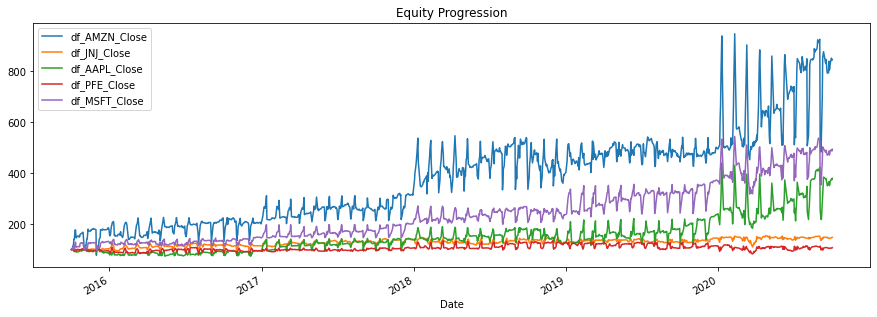

In [383]:
Portfolio_Patrick.plot()

Text(0.5, 0.98, 'Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

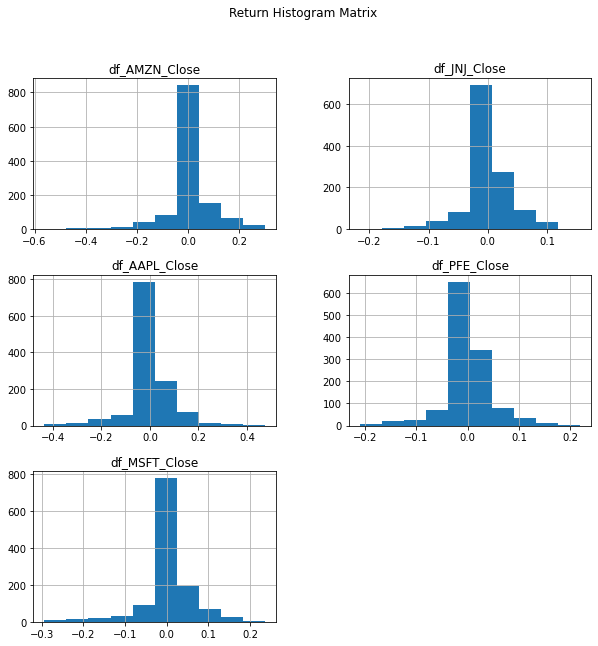

In [384]:
Portfolio_Patrick.plot_histograms(freq=None, title=None, figsize=(10, 10))

<module 'matplotlib.pyplot' from 'C:\\Users\\91901\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

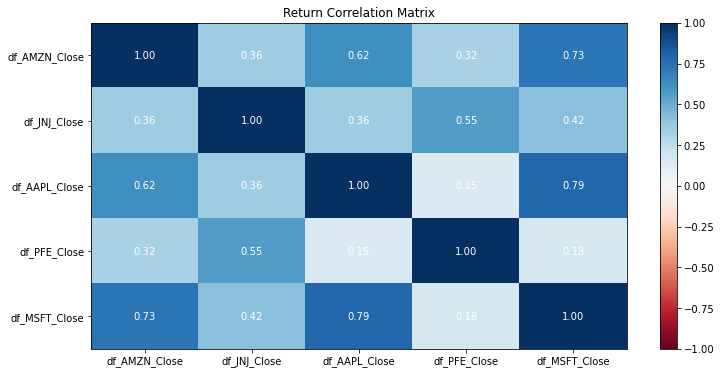

In [385]:
Portfolio_Patrick.plot_correlation(freq=None, title=None, figsize=(12, 6))